In [1]:
import pandas as pd

In [2]:
from google.colab import files

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load data from Excel file
df = pd.read_excel('/content/drive/MyDrive/Mymensingh_Full_db.xlsx')

In [6]:
df.head(10)

Year  Month  Day  Temp_max  Temp_min  Earth_Temp  Humidity   Prcp  \
0  1981      2    1     22.56     15.00       18.02     10.38  17.07   
1  1981      2    2     26.37     14.37       18.77      8.61   0.01   
2  1981      2    3     25.26     12.21       17.52      6.77   0.38   
3  1981      2    4     25.26     10.91       17.80      7.57   0.00   
4  1981      2    5     26.66     12.91       18.64      7.93   0.00   
5  1981      2    6     28.26     12.97       19.50      7.75   0.00   
6  1981      2    7     29.85     12.64       20.17      7.81   0.00   
7  1981      2    8     29.38     15.95       21.62      8.48   0.01   
8  1981      2    9     28.22     14.80       19.44      7.87   0.44   
9  1981      2   10     20.52     14.01       17.10      9.83  21.31   

   Windspeed_max  Windspeed_min  Surf_Pressure  
0           3.29           0.30         100.78  
1           4.33           1.48         100.88  
2           4.12           1.00         100.96  
3           3.02           1.12         100.84  
4           2.56           0.38         100.91  
5           3.27           0.58         100.93  
6           4.72           1.73         100.65  
7           3.50           0.32         100.55  
8           5.52           1.70         100.72  
9           3.13           0.65         100.61

In [7]:
# Combine Year, Month, and Day columns into a single date column
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Drop the original Year, Month, and Day columns
df.drop(['Year', 'Month', 'Day'], axis=1, inplace=True)

In [44]:
df

Date  Temp_max  Temp_min  Humidity   Prcp  Taverage  Month  Year  \
0     1981-02-01     22.56     15.00     10.38  17.07    18.780      2  1981   
1     1981-02-02     26.37     14.37      8.61   0.01    20.370      2  1981   
2     1981-02-03     25.26     12.21      6.77   0.38    18.735      2  1981   
3     1981-02-04     25.26     10.91      7.57   0.00    18.085      2  1981   
4     1981-02-05     26.66     12.91      7.93   0.00    19.785      2  1981   
...          ...       ...       ...       ...    ...       ...    ...   ...   
15669 2023-12-27     24.57     13.95     10.93   0.00    19.260     12  2023   
15670 2023-12-28     24.31     14.33     10.80   0.00    19.320     12  2023   
15671 2023-12-29     25.09     14.53     10.50   0.04    19.810     12  2023   
15672 2023-12-30     25.15     14.72     10.44   0.03    19.935     12  2023   
15673 2023-12-31     24.94     15.33     10.38   0.64    20.135     12  2023   

       MonthlyAvgRainFall  MonthlyStdRainFall  Monthly SPI  
0                1.458571            5.048601     3.092229  
1                1.458571            5.048601    -0.286925  
2                1.458571            5.048601    -0.213638  
3                1.458571            5.048601    -0.288906  
4                1.458571            5.048601    -0.288906  
...                   ...                 ...          ...  
15669            1.459677            5.215997    -0.279846  
15670            1.459677            5.215997    -0.279846  
15671            1.459677            5.215997    -0.272178  
15672            1.459677            5.215997    -0.274095  
15673            1.459677            5.215997    -0.157147  

[15674 rows x 11 columns]

In [9]:
# Reorganize columns to bring 'Date' column to the first position
df = df[['Date', 'Temp_max', 'Temp_min', 'Humidity', 'Prcp']]

In [ ]:
df

Date  Temp_max  Temp_min  Humidity   Prcp
0     1981-02-01     22.56     15.00     10.38  17.07
1     1981-02-02     26.37     14.37      8.61   0.01
2     1981-02-03     25.26     12.21      6.77   0.38
3     1981-02-04     25.26     10.91      7.57   0.00
4     1981-02-05     26.66     12.91      7.93   0.00
...          ...       ...       ...       ...    ...
15669 2023-12-27     24.57     13.95     10.93   0.00
15670 2023-12-28     24.31     14.33     10.80   0.00
15671 2023-12-29     25.09     14.53     10.50   0.04
15672 2023-12-30     25.15     14.72     10.44   0.03
15673 2023-12-31     24.94     15.33     10.38   0.64

[15674 rows x 5 columns]

In [10]:
print(f'length of dataset: {len(df)}')

length of dataset: 15674


In [11]:
df.isnull().sum()

Date        0
Temp_max    0
Temp_min    0
Humidity    0
Prcp        0
dtype: int64

In [12]:
df = df.apply(lambda column: column.fillna(column.mean())) # this fill null values avg value of that columns
df.isnull().sum()

Date        0
Temp_max    0
Temp_min    0
Humidity    0
Prcp        0
dtype: int64

In [13]:
df['Taverage'] = (df['Temp_max'] + df['Temp_min']) / 2
df['Date'] = pd.to_datetime(df['Date'])
df.head()

Date  Temp_max  Temp_min  Humidity   Prcp  Taverage
0 1981-02-01     22.56     15.00     10.38  17.07    18.780
1 1981-02-02     26.37     14.37      8.61   0.01    20.370
2 1981-02-03     25.26     12.21      6.77   0.38    18.735
3 1981-02-04     25.26     10.91      7.57   0.00    18.085
4 1981-02-05     26.66     12.91      7.93   0.00    19.785

# SPI CALCULATION

In [14]:
# Extract month and year columns
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [15]:
df.head()

Date  Temp_max  Temp_min  Humidity   Prcp  Taverage  Month  Year
0 1981-02-01     22.56     15.00     10.38  17.07    18.780      2  1981
1 1981-02-02     26.37     14.37      8.61   0.01    20.370      2  1981
2 1981-02-03     25.26     12.21      6.77   0.38    18.735      2  1981
3 1981-02-04     25.26     10.91      7.57   0.00    18.085      2  1981
4 1981-02-05     26.66     12.91      7.93   0.00    19.785      2  1981

In [16]:
# Calculate SPI for each month across all years
monthly_avg = df.groupby(['Year', 'Month'])['Prcp'].mean()
monthly_std = df.groupby(['Year', 'Month'])['Prcp'].std()

In [17]:
# Merge the statistics back into the DataFrame based on month and year
df = df.merge(monthly_avg.rename('MonthlyAvgRainFall'), left_on=['Year', 'Month'], right_index=True)
df = df.merge(monthly_std.rename('MonthlyStdRainFall'), left_on=['Year', 'Month'], right_index=True)

In [18]:
df

Date  Temp_max  Temp_min  Humidity   Prcp  Taverage  Month  Year  \
0     1981-02-01     22.56     15.00     10.38  17.07    18.780      2  1981   
1     1981-02-02     26.37     14.37      8.61   0.01    20.370      2  1981   
2     1981-02-03     25.26     12.21      6.77   0.38    18.735      2  1981   
3     1981-02-04     25.26     10.91      7.57   0.00    18.085      2  1981   
4     1981-02-05     26.66     12.91      7.93   0.00    19.785      2  1981   
...          ...       ...       ...       ...    ...       ...    ...   ...   
15669 2023-12-27     24.57     13.95     10.93   0.00    19.260     12  2023   
15670 2023-12-28     24.31     14.33     10.80   0.00    19.320     12  2023   
15671 2023-12-29     25.09     14.53     10.50   0.04    19.810     12  2023   
15672 2023-12-30     25.15     14.72     10.44   0.03    19.935     12  2023   
15673 2023-12-31     24.94     15.33     10.38   0.64    20.135     12  2023   

       MonthlyAvgRainFall  MonthlyStdRainFall  
0                1.458571            5.048601  
1                1.458571            5.048601  
2                1.458571            5.048601  
3                1.458571            5.048601  
4                1.458571            5.048601  
...                   ...                 ...  
15669            1.459677            5.215997  
15670            1.459677            5.215997  
15671            1.459677            5.215997  
15672            1.459677            5.215997  
15673            1.459677            5.215997  

[15674 rows x 10 columns]

In [19]:
df['Monthly SPI'] = df.apply(lambda row: (row['Prcp'] - row['MonthlyAvgRainFall']) / row['MonthlyStdRainFall'] if row['MonthlyAvgRainFall'] != 0 else -2, axis=1)

In [20]:
df.head()

Date  Temp_max  Temp_min  Humidity   Prcp  Taverage  Month  Year  \
0 1981-02-01     22.56     15.00     10.38  17.07    18.780      2  1981   
1 1981-02-02     26.37     14.37      8.61   0.01    20.370      2  1981   
2 1981-02-03     25.26     12.21      6.77   0.38    18.735      2  1981   
3 1981-02-04     25.26     10.91      7.57   0.00    18.085      2  1981   
4 1981-02-05     26.66     12.91      7.93   0.00    19.785      2  1981   

   MonthlyAvgRainFall  MonthlyStdRainFall  Monthly SPI  
0            1.458571            5.048601     3.092229  
1            1.458571            5.048601    -0.286925  
2            1.458571            5.048601    -0.213638  
3            1.458571            5.048601    -0.288906  
4            1.458571            5.048601    -0.288906

In [21]:
df2=df[['Date','Monthly SPI']]

In [22]:
df2

Date  Monthly SPI
0     1981-02-01     3.092229
1     1981-02-02    -0.286925
2     1981-02-03    -0.213638
3     1981-02-04    -0.288906
4     1981-02-05    -0.288906
...          ...          ...
15669 2023-12-27    -0.279846
15670 2023-12-28    -0.279846
15671 2023-12-29    -0.272178
15672 2023-12-30    -0.274095
15673 2023-12-31    -0.157147

[15674 rows x 2 columns]

In [23]:
#Create timestamp
df2.Timestamp = pd.to_datetime(df2.Date,format='%d-%m-%Y')
df2.index = df2.Timestamp

<ipython-input-23-c5608b668a34>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df2.Timestamp = pd.to_datetime(df2.Date,format='%d-%m-%Y')


In [24]:
df2

Date  Monthly SPI
Date                              
1981-02-01 1981-02-01     3.092229
1981-02-02 1981-02-02    -0.286925
1981-02-03 1981-02-03    -0.213638
1981-02-04 1981-02-04    -0.288906
1981-02-05 1981-02-05    -0.288906
...               ...          ...
2023-12-27 2023-12-27    -0.279846
2023-12-28 2023-12-28    -0.279846
2023-12-29 2023-12-29    -0.272178
2023-12-30 2023-12-30    -0.274095
2023-12-31 2023-12-31    -0.157147

[15674 rows x 2 columns]

In [25]:
df2  = df2.drop(['Date'], axis=1)

<Axes: xlabel='Date'>

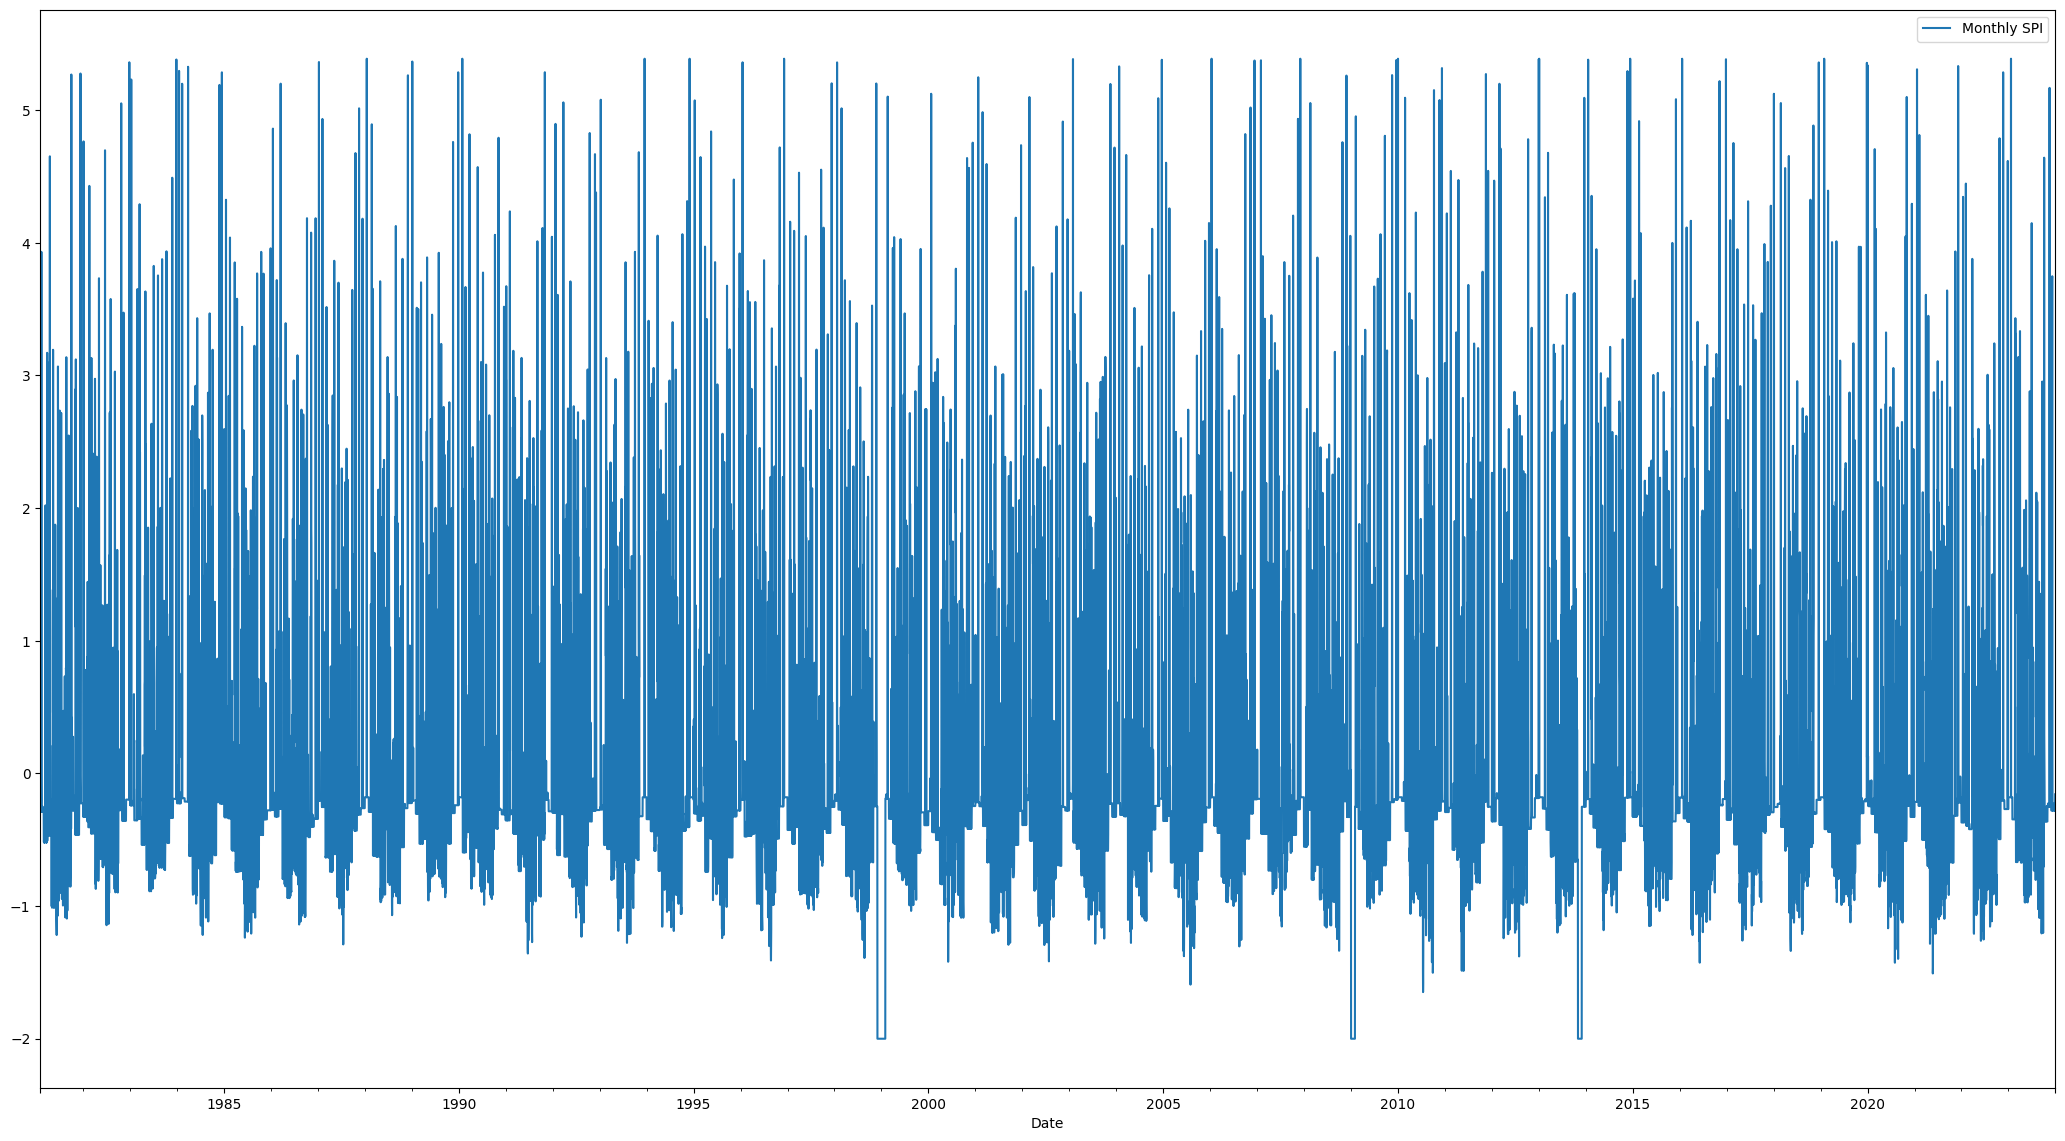

In [26]:
df2.plot(figsize=(26,14))

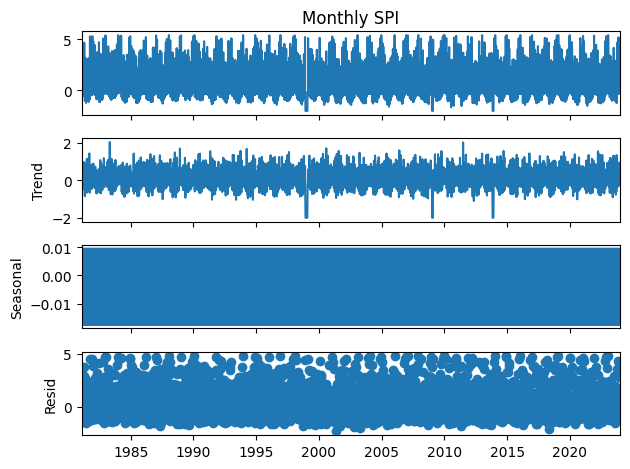

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(df2['Monthly SPI'], model='additive').plot();

In [36]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 27.2 MB/s eta 0:00:00


In [37]:
#for datetime object
from datetime import datetime

#statsmodel libraires
from statsmodels.tsa.stattools import adfuller                 #To check stationarity in Time Series
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX         #SARIMA
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.holtwinters import ExponentialSmoothing   #Holt's Winter Method

#ARIMA
from pmdarima import auto_arima

#Skit-Learn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

#Keras
#from keras.preprocessing.sequence import TimeseriesGenerator
#from keras.preprocessing import TimeseriesGenerator
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

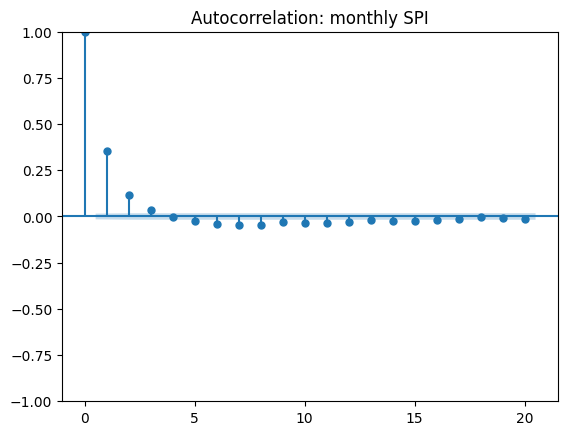

In [38]:
title = 'Autocorrelation: monthly SPI'
lags = 20
plot_acf(df2,title=title,lags=lags);

In [39]:
len(df2)

15674

In [40]:
train_a = df2.iloc[:15500]
test_a = df2.iloc[15500:]

In [ ]:
#ARIMA

In [41]:
stepwise_fit = auto_arima(df2['Monthly SPI'], start_p=0, start_q=0,
                          max_p=6, max_q=3, m=12,
                          seasonal=True,
                          d=None, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=44324.799, Time=38.78 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=44338.341, Time=2.61 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=42237.280, Time=7.85 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=42431.517, Time=10.09 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=44340.238, Time=0.37 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=42240.553, Time=1.82 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=42238.778, Time=18.49 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=42237.762, Time=45.79 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=42237.220, Time=9.27 sec
 ARIMA(1,0,0)(0,0,2)[12] intercept   : AIC=42238.706, Time=18.74 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=42239.730, Time=128.16 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=44325.297, Time=6.35 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=42237.719, Time=9.29 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=42237.736, Time=29.46 s

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                15674
Model:               SARIMAX(2, 0, 1)   Log Likelihood              -21092.405
Date:                Sun, 04 Aug 2024   AIC                          42194.810
Time:                        18:57:18   BIC                          42233.109
Sample:                    02-01-1981   HQIC                         42207.490
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0010      0.001     -1.001      0.317      -0.003       0.001
ar.L1          1.2827      0.021     62.313      0.000       1.242       1.323
ar.L2         -0.3479      0.008    -46.157      0.000      -0.363      -0.333
ma.L1         -0.9237      0.020    -45.487      0.000      -0.963      -0.884
sigma2         0.8638      0.007    130.048      0.000       0.851       0.877
===================================================================================
Ljung-Box (L1) (Q):                   0.40   Jarque-Bera (JB):             69885.83
Prob(Q):                              0.53   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                             2.49
Prob(H) (two-sided):                  1.00   Kurtosis:                        12.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [42]:
#Fitting our model on Train set

model = SARIMAX(df2['Monthly SPI'],order=(2,0,1),seasonal_order=(0,0,0,12))
results = model.fit()
results.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Monthly SPI   No. Observations:                15674
Model:               SARIMAX(2, 0, 1)   Log Likelihood              -21117.422
Date:                Sun, 04 Aug 2024   AIC                          42242.844
Time:                        18:57:21   BIC                          42273.483
Sample:                    02-01-1981   HQIC                         42252.987
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5517      0.906      0.609      0.542      -1.224       2.327
ar.L2         -0.0785      0.320     -0.245      0.806      -0.705       0.548
ma.L1         -0.1940      0.906     -0.214      0.831      -1.971       1.583
sigma2         0.8665      0.004    206.912      0.000       0.858       0.875
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             71979.00
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                             2.54
Prob(H) (two-sided):                  0.88   Kurtosis:                        12.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Obtain predicted values

start=len(train_a)
end=len(train_a)+len(test_a)-1
predicted_a = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA Predictions')

In [ ]:
# Compare predictions to expected values
for i in range(len(predicted_a)):
    print(f"predicted={predicted_a[i]}, expected={test_a['Monthly SPI'][i]}")

predicted=-0.10806815189248412, expected=0.9485356112298159
predicted=0.3431472982976242, expected=0.4243689727847681
predicted=0.14396571965764637, expected=0.8427867086264921
predicted=0.29613432791070693, expected=0.0558500697731841
predicted=0.011307697998192177, expected=-0.361194303697068
predicted=-0.1314020414084266, expected=-0.6578405759349643
predicted=-0.23249045609062474, expected=-0.6358667779914163
predicted=-0.22096685229236085, expected=-0.7329177189087528
predicted=-0.255174437569443, expected=-0.65188933899192
predicted=-0.22520923092533485, expected=-0.7141484331653056
predicted=-0.24802585910180408, expected=-0.21516010486390622
predicted=-0.0690589822052613, expected=-0.42711569752771167
predicted=-0.14931365539831104, expected=-0.6738631369354678
predicted=-0.23652534969885186, expected=-0.6990414470791164
predicted=-0.24309274785313395, expected=-0.5937503319329496
predicted=-0.20472449108377513, expected=-0.28337043598033607
predicted=-0.09450620612400726, expe

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
# Calculate MSE
mse = mean_squared_error(test_a['Monthly SPI'], predicted_a)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate RMSE
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Squared Error (MSE): 0.6917107125134652
Root Mean Squared Error (RMSE): 0.8316914767589393


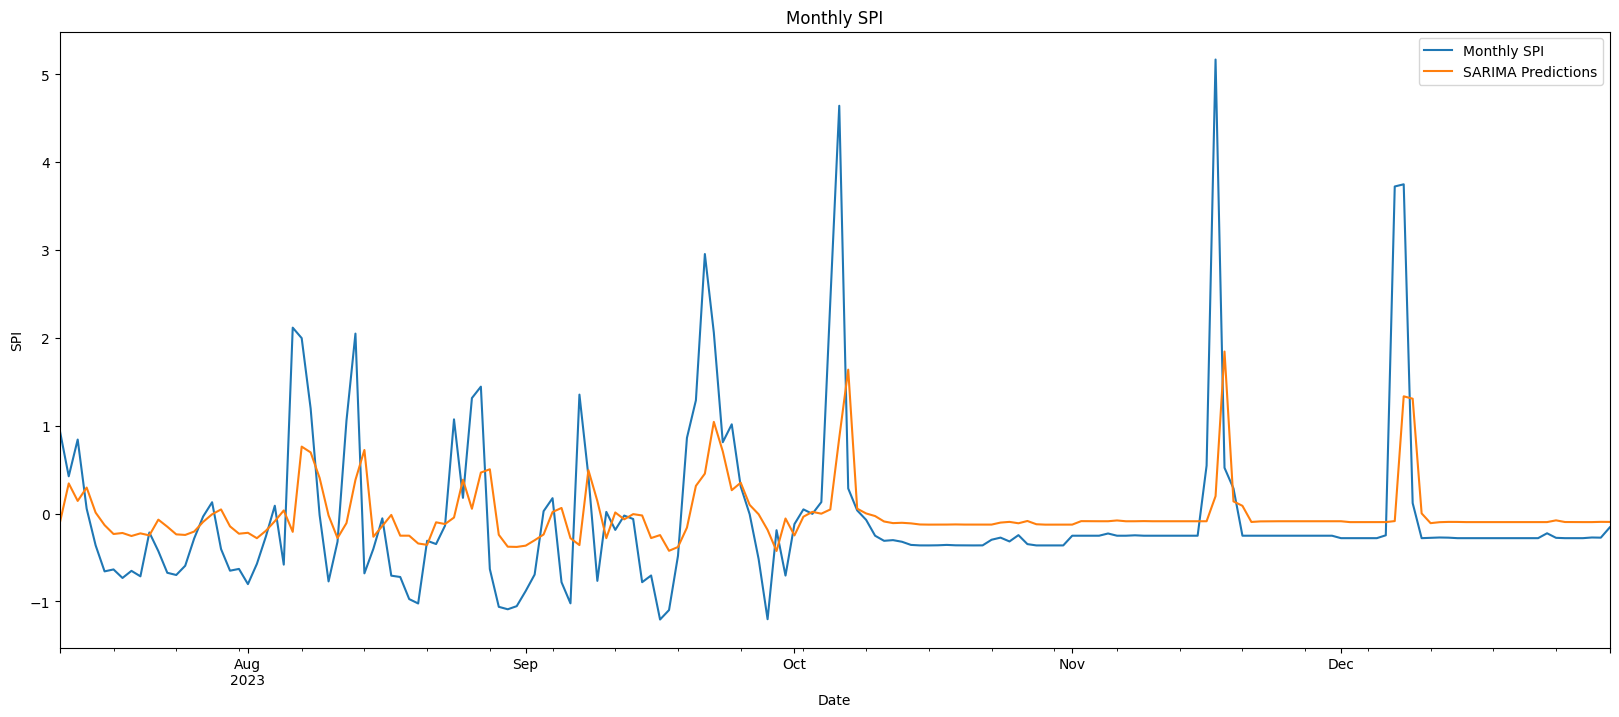

In [ ]:
# Plot predictions against known values
title = 'Monthly SPI'
ylabel='SPI'
xlabel='Date'

ax = test_a['Monthly SPI'].plot(legend=True,figsize=(20,8),title=title)
predicted_a.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [ ]:
#365 days

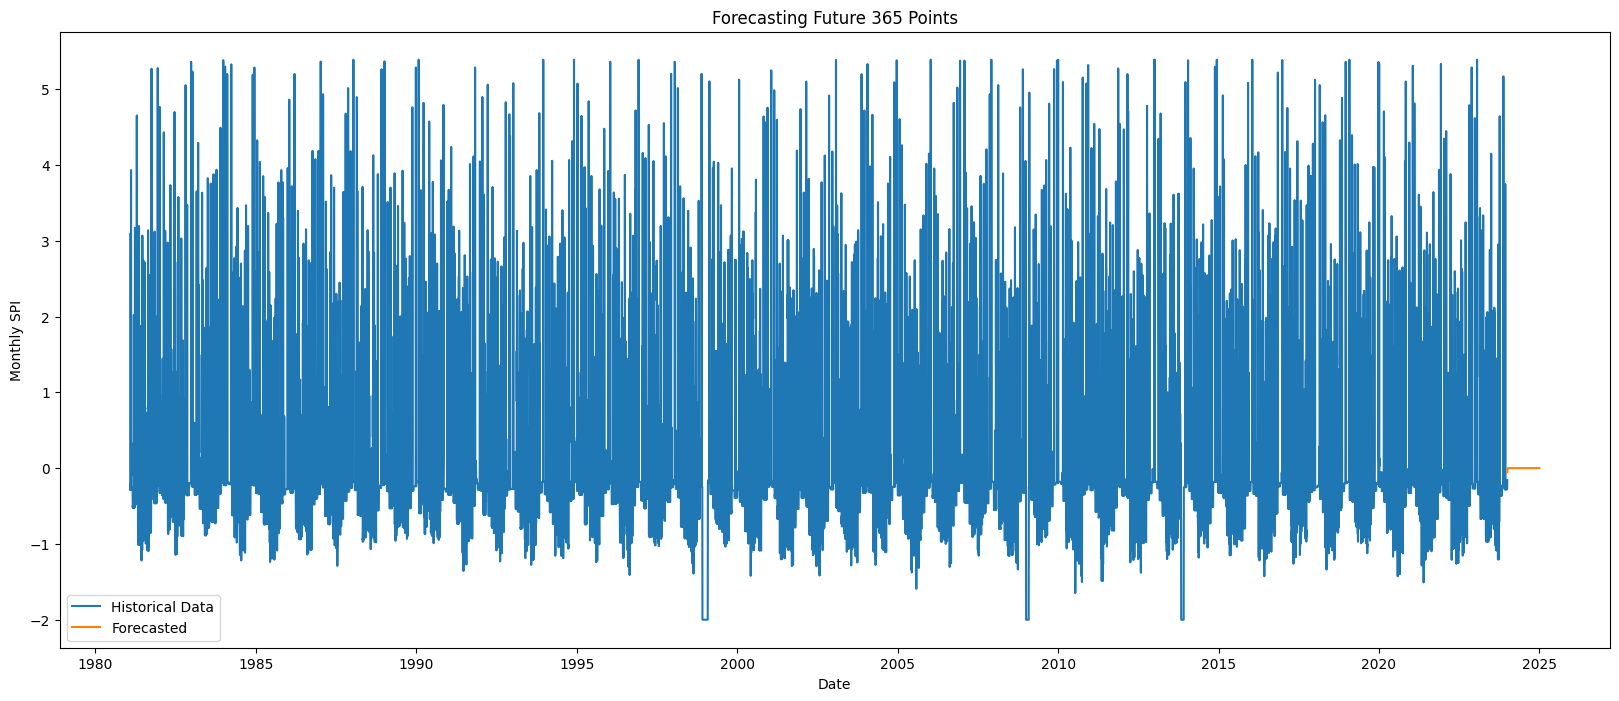

In [ ]:
fit=model.fit(optimized=True)
import matplotlib.pyplot as plt
# Forecast future 12 points
future_index = pd.date_range(start=df2.index[-1], periods=366, freq='D')[1:]  # Generate future dates
future_predictions = fit.forecast(steps=365)

predictions = pd.DataFrame({
    'Date': future_index,
    'Monthly SPI': future_predictions
})
predictions.set_index('Date', inplace=True)
# Plot the forecasted values
plt.figure(figsize=(20, 8))
plt.plot(df2.index, df2['Monthly SPI'], label='Historical Data')
plt.plot(future_index, future_predictions, label='Forecasted')
plt.title('Forecasting Future 365 Points')
plt.xlabel('Date')
plt.ylabel('Monthly SPI')
plt.legend()
plt.show()


In [ ]:
predictions

Monthly SPI
Date                     
2024-01-01  -5.313961e-02
2024-01-02  -1.699012e-02
2024-01-03  -5.205022e-03
2024-01-04  -1.538848e-03
2024-01-05  -4.406819e-04
...                   ...
2024-12-26 -4.548939e-201
2024-12-27 -1.552450e-201
2024-12-28 -4.996565e-202
2024-12-29 -1.538818e-202
2024-12-30 -4.570186e-203

[365 rows x 1 columns]

In [ ]:
def categorize_spi(spi):
    if spi >= 2:
        return "Extremely wet"
    elif 1.5 <= spi < 2:
        return "Severely wet"
    elif 1 <= spi < 1.5:
        return "Moderately wet"
    elif 0 <= spi < 1:
        return "Mild wet"
    elif -1 <= spi < 0:
        return "Mild drought"
    elif -1.49 <= spi < -1:
        return "Moderately drought"
    elif -1.99 <= spi < -1.5:
        return "Severely drought"
    else:
        return "Extremely drought"

predictions['Category'] = predictions['Monthly SPI'].apply(categorize_spi)

In [ ]:
predictions.head(365)

Monthly SPI      Category
Date                                   
2024-01-01  -5.313961e-02  Mild drought
2024-01-02  -1.699012e-02  Mild drought
2024-01-03  -5.205022e-03  Mild drought
2024-01-04  -1.538848e-03  Mild drought
2024-01-05  -4.406819e-04  Mild drought
...                   ...           ...
2024-12-26 -4.548939e-201  Mild drought
2024-12-27 -1.552450e-201  Mild drought
2024-12-28 -4.996565e-202  Mild drought
2024-12-29 -1.538818e-202  Mild drought
2024-12-30 -4.570186e-203  Mild drought

[365 rows x 2 columns]

In [ ]:
predictions['Category'].value_counts()

Category
Mild drought    185
Mild wet        180
Name: count, dtype: int64

In [ ]:
#30 days

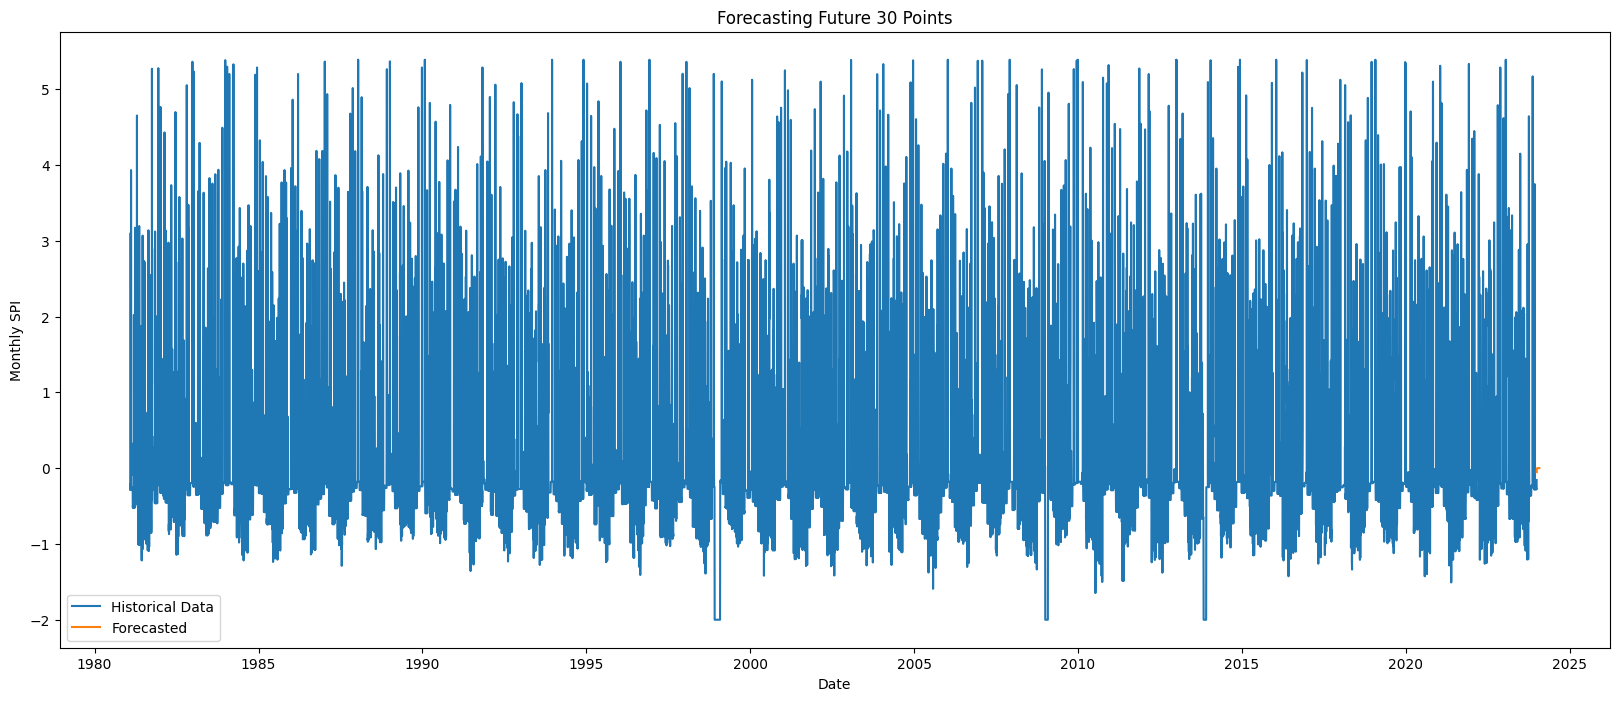

In [ ]:
fit=model.fit(optimized=True)
import matplotlib.pyplot as plt
# Forecast future 12 points
future_index = pd.date_range(start=df2.index[-1], periods=31, freq='D')[1:]  # Generate future dates
future_predictions = fit.forecast(steps=30)

predictions = pd.DataFrame({
    'Date': future_index,
    'Monthly SPI': future_predictions
})
predictions.set_index('Date', inplace=True)
# Plot the forecasted values
plt.figure(figsize=(20, 8))
plt.plot(df2.index, df2['Monthly SPI'], label='Historical Data')
plt.plot(future_index, future_predictions, label='Forecasted')
plt.title('Forecasting Future 30 Points')
plt.xlabel('Date')
plt.ylabel('Monthly SPI')
plt.legend()
plt.show()


In [ ]:
predictions

Monthly SPI
Date                    
2024-01-01 -5.313961e-02
2024-01-02 -1.699012e-02
2024-01-03 -5.205022e-03
2024-01-04 -1.538848e-03
2024-01-05 -4.406819e-04
2024-01-06 -1.224110e-04
2024-01-07 -3.296529e-05
2024-01-08 -8.584505e-06
2024-01-09 -2.150126e-06
2024-01-10 -5.128151e-07
2024-01-11 -1.142534e-07
2024-01-12 -2.280557e-08
2024-01-13 -3.619112e-09
2024-01-14 -2.076338e-10
2024-01-15  1.693664e-10
2024-01-16  1.097328e-10
2024-01-17  4.725537e-11
2024-01-18  1.746332e-11
2024-01-19  5.927722e-12
2024-01-20  1.900457e-12
2024-01-21  5.834942e-13
2024-01-22  1.728355e-13
2024-01-23  4.958198e-14
2024-01-24  1.379650e-14
2024-01-25  3.722117e-15
2024-01-26  9.712356e-16
2024-01-27  2.438512e-16
2024-01-28  5.834437e-17
2024-01-29  1.305968e-17
2024-01-30  2.628175e-18

In [49]:
def categorize_spi(spi):
    if spi >= 2:
        return "Extremely wet"
    elif 1.5 <= spi < 2:
        return "Severely wet"
    elif 1 <= spi < 1.5:
        return "Moderately wet"
    elif 0 <= spi < 1:
        return "Mild wet"
    elif -1 <= spi < 0:
        return "Mild drought"
    elif -1.49 <= spi < -1:
        return "Moderately drought"
    elif -1.99 <= spi < -1.5:
        return "Severely drought"
    else:
        return "Extremely drought"

predictions['Category'] = predictions['Monthly SPI'].apply(categorize_spi)

In [50]:
predictions['Category'].value_counts()

Category
Mild drought    185
Mild wet        180
Name: count, dtype: int64

In [51]:
predictions.head()

Monthly SPI      Category
Date                                 
2024-01-01    -0.053140  Mild drought
2024-01-02    -0.016990  Mild drought
2024-01-03    -0.005205  Mild drought
2024-01-04    -0.001539  Mild drought
2024-01-05    -0.000441  Mild drought

In [ ]:
#ARMA model

In [52]:
# Use auto_arima to find the best ARMA model
stepwise_fit = auto_arima(df2['Monthly SPI'], start_p=0, start_q=0,
                          max_p=6, max_q=3, d=0, seasonal=False,  # d=0 for ARMA
                          trace=True, error_action='ignore',
                          suppress_warnings=True, stepwise=True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=44340.238, Time=0.36 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=42240.387, Time=0.43 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=42438.711, Time=0.93 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=42241.113, Time=3.21 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=42241.124, Time=2.75 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=42242.844, Time=2.51 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=42240.553, Time=2.90 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 13.104 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                15674
Model:               SARIMAX(1, 0, 0)   Log Likelihood              -21118.193
Date:                Sun, 04 Aug 2024   AIC                          42240.387
Time:                        19:17:48   BIC                          42255.706
Sample:                    02-01-1981   HQIC                         42245.459
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3543      0.005     66.741      0.000       0.344       0.365
sigma2         0.8666      0.004    208.402      0.000       0.858       0.875
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):             72112.96
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                             2.54
Prob(H) (two-sided):                  0.86   Kurtosis:                        12.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [53]:
# Fit the ARMA model on the entire dataset
model = SARIMAX(df2['Monthly SPI'], order=(stepwise_fit.order[0], 0, stepwise_fit.order[2]))
results = model.fit()

results.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Monthly SPI   No. Observations:                15674
Model:               SARIMAX(1, 0, 0)   Log Likelihood              -21118.193
Date:                Sun, 04 Aug 2024   AIC                          42240.387
Time:                        19:17:49   BIC                          42255.706
Sample:                    02-01-1981   HQIC                         42245.459
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3543      0.005     66.741      0.000       0.344       0.365
sigma2         0.8666      0.004    208.402      0.000       0.858       0.875
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):             72112.96
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                             2.54
Prob(H) (two-sided):                  0.86   Kurtosis:                        12.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [54]:
# Obtain predicted values
start = len(train_a)
end = len(train_a) + len(test_a) - 1
predicted_a = results.predict(start=start, end=end, dynamic=False,typ='levels').rename('ARMA Predictions')

In [55]:
# Compare predictions to expected values
for i in range(len(predicted_a)):
    print(f"predicted={predicted_a[i]}, expected={test_a['Monthly SPI'].values[i]}")

predicted=-0.11191481672129402, expected=0.9485356112298159
predicted=0.33606884093698713, expected=0.4243689727847681
predicted=0.15035512333426018, expected=0.8427867086264921
predicted=0.2986017066433366, expected=0.0558500697731841
predicted=0.01978783715941718, expected=-0.361194303697068
predicted=-0.1279721599900014, expected=-0.6578405759349643
predicted=-0.23307477047608624, expected=-0.6358667779914163
predicted=-0.2252893919215614, expected=-0.7329177189087528
predicted=-0.2596748138707126, expected=-0.65188933899192
predicted=-0.23096623045090242, expected=-0.7141484331653056
predicted=-0.253024803022056, expected=-0.21516010486390622
predicted=-0.07623183167972201, expected=-0.42711569752771167
predicted=-0.1513282956535758, expected=-0.6738631369354678
predicted=-0.23875160900542716, expected=-0.6990414470791164
predicted=-0.2476723552658202, expected=-0.5937503319329496
predicted=-0.2103674163587222, expected=-0.28337043598033607
predicted=-0.10039894427605942, expected=

<ipython-input-55-3553b4933b1f>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"predicted={predicted_a[i]}, expected={test_a['Monthly SPI'].values[i]}")


In [56]:
from sklearn.metrics import mean_squared_error
import numpy as np
# Calculate MSE
mse = mean_squared_error(test_a['Monthly SPI'], predicted_a)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate RMSE
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Squared Error (MSE): 0.6932875554173769
Root Mean Squared Error (RMSE): 0.8326389105833193


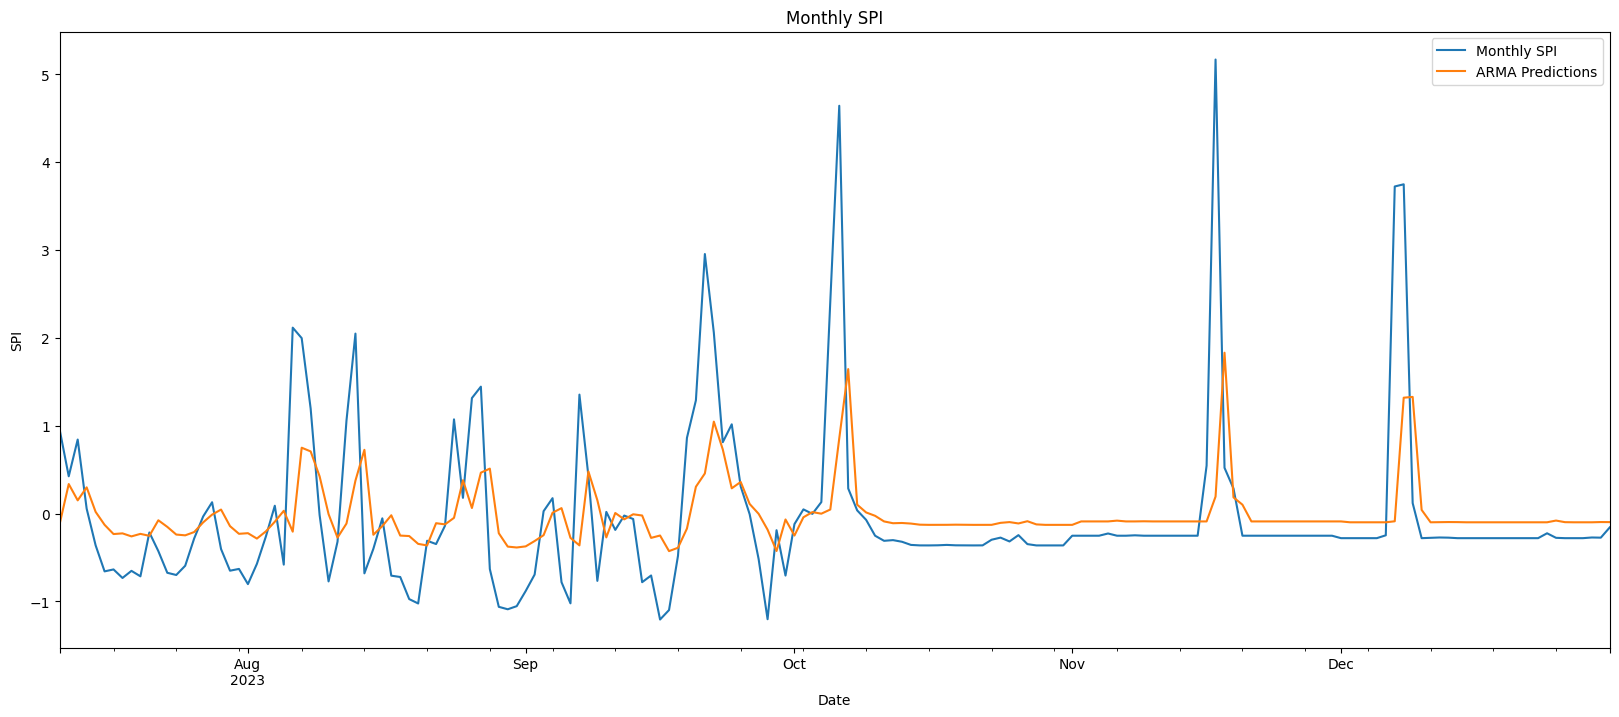

In [57]:
# Plot predictions against known values
title = 'Monthly SPI'
ylabel='SPI'
xlabel='Date'

ax = test_a['Monthly SPI'].plot(legend=True,figsize=(20,8),title=title)
predicted_a.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [45]:
#365 days

/usr/local/lib/python3.10/dist-packages/statsmodels/base/optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: optimized. After release 0.14, this will raise.
  warnings.warn(


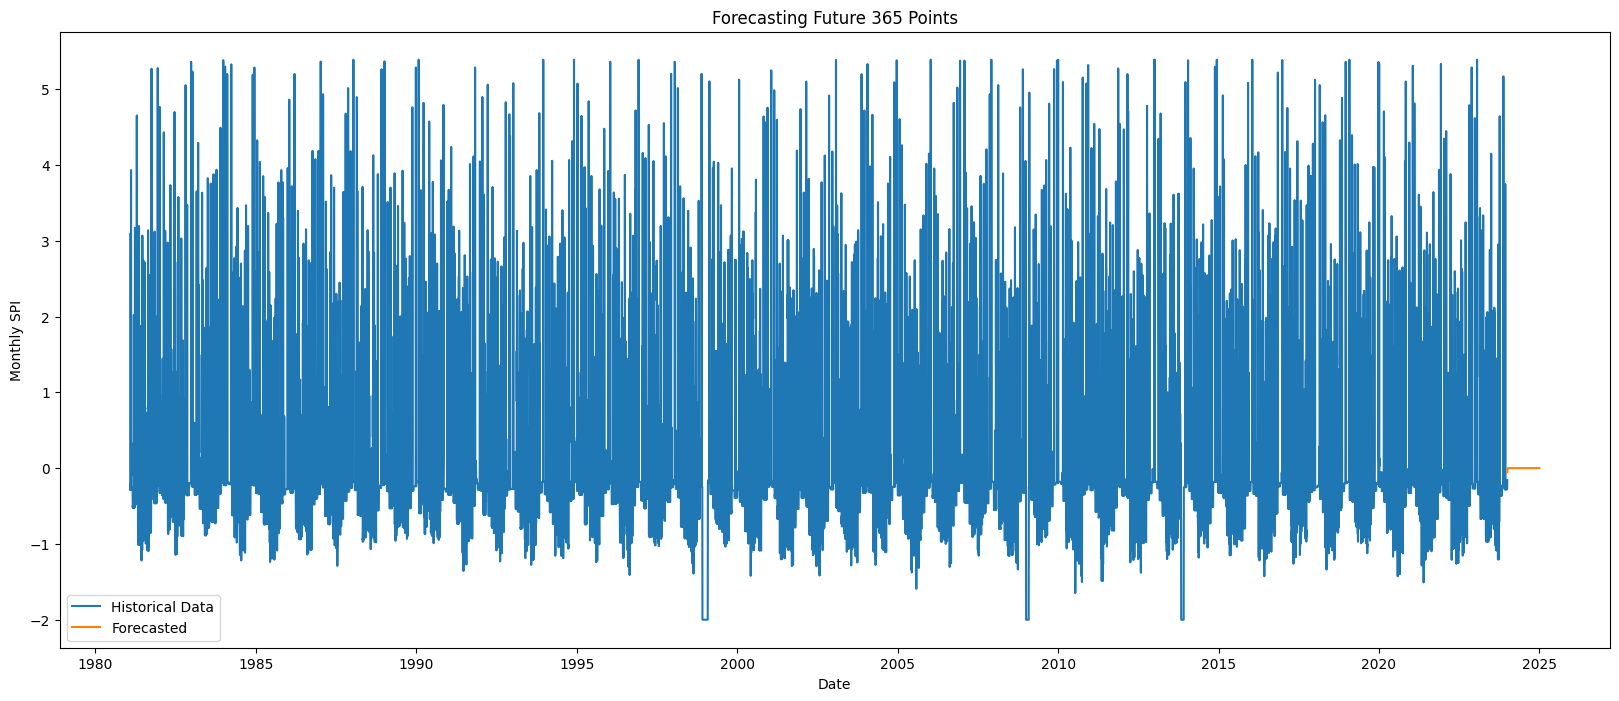

In [46]:
fit=model.fit(optimized=True)
import matplotlib.pyplot as plt
# Forecast future 12 points
future_index = pd.date_range(start=df2.index[-1], periods=366, freq='D')[1:]  # Generate future dates
future_predictions = fit.forecast(steps=365)

predictions = pd.DataFrame({
    'Date': future_index,
    'Monthly SPI': future_predictions
})
predictions.set_index('Date', inplace=True)
# Plot the forecasted values
plt.figure(figsize=(20, 8))
plt.plot(df2.index, df2['Monthly SPI'], label='Historical Data')
plt.plot(future_index, future_predictions, label='Forecasted')
plt.title('Forecasting Future 365 Points')
plt.xlabel('Date')
plt.ylabel('Monthly SPI')
plt.legend()
plt.show()


In [ ]:
predictions

Monthly SPI
Date                     
2024-01-01  -5.567756e-02
2024-01-02  -1.972672e-02
2024-01-03  -6.989231e-03
2024-01-04  -2.476304e-03
2024-01-05  -8.773616e-04
...                   ...
2024-12-26 -3.315423e-164
2024-12-27 -1.174664e-164
2024-12-28 -4.161867e-165
2024-12-29 -1.474561e-165
2024-12-30 -5.224412e-166

[365 rows x 1 columns]

In [ ]:
def categorize_spi(spi):
    if spi >= 2:
        return "Extremely wet"
    elif 1.5 <= spi < 2:
        return "Severely wet"
    elif 1 <= spi < 1.5:
        return "Moderately wet"
    elif 0 <= spi < 1:
        return "Mild wet"
    elif -1 <= spi < 0:
        return "Mild drought"
    elif -1.49 <= spi < -1:
        return "Moderately drought"
    elif -1.99 <= spi < -1.5:
        return "Severely drought"
    else:
        return "Extremely drought"

predictions['Category'] = predictions['Monthly SPI'].apply(categorize_spi)

In [ ]:
predictions['Category'].value_counts()

Category
Mild drought    365
Name: count, dtype: int64

In [ ]:
predictions.head()

Monthly SPI      Category
Date                                 
2024-01-01    -0.055678  Mild drought
2024-01-02    -0.019727  Mild drought
2024-01-03    -0.006989  Mild drought
2024-01-04    -0.002476  Mild drought
2024-01-05    -0.000877  Mild drought

In [ ]:
#30 days

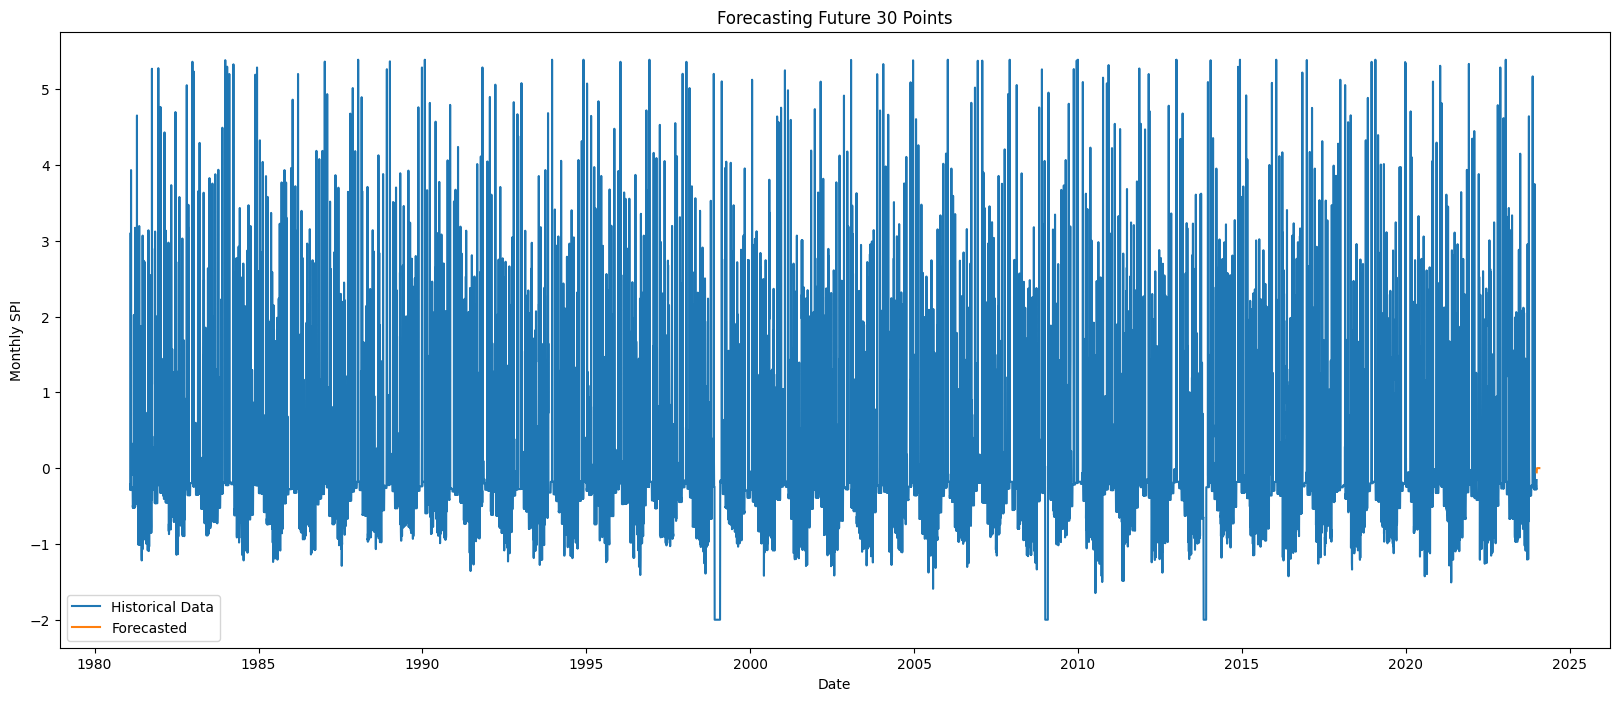

In [ ]:
fit=model.fit(optimized=True)
import matplotlib.pyplot as plt
# Forecast future 12 points
future_index = pd.date_range(start=df2.index[-1], periods=31, freq='D')[1:]  # Generate future dates
future_predictions = fit.forecast(steps=30)

predictions = pd.DataFrame({
    'Date': future_index,
    'Monthly SPI': future_predictions
})
predictions.set_index('Date', inplace=True)
# Plot the forecasted values
plt.figure(figsize=(20, 8))
plt.plot(df2.index, df2['Monthly SPI'], label='Historical Data')
plt.plot(future_index, future_predictions, label='Forecasted')
plt.title('Forecasting Future 30 Points')
plt.xlabel('Date')
plt.ylabel('Monthly SPI')
plt.legend()
plt.show()


In [ ]:
predictions

Monthly SPI
Date                    
2024-01-01 -5.567756e-02
2024-01-02 -1.972672e-02
2024-01-03 -6.989231e-03
2024-01-04 -2.476304e-03
2024-01-05 -8.773616e-04
2024-01-06 -3.108517e-04
2024-01-07 -1.101356e-04
2024-01-08 -3.902137e-05
2024-01-09 -1.382538e-05
2024-01-10 -4.898371e-06
2024-01-11 -1.735507e-06
2024-01-12 -6.148949e-07
2024-01-13 -2.178590e-07
2024-01-14 -7.718806e-08
2024-01-15 -2.734795e-08
2024-01-16 -9.689454e-09
2024-01-17 -3.433001e-09
2024-01-18 -1.216322e-09
2024-01-19 -4.309463e-10
2024-01-20 -1.526855e-10
2024-01-21 -5.409690e-11
2024-01-22 -1.916668e-11
2024-01-23 -6.790810e-12
2024-01-24 -2.406003e-12
2024-01-25 -8.524537e-13
2024-01-26 -3.020267e-13
2024-01-27 -1.070089e-13
2024-01-28 -3.791356e-14
2024-01-29 -1.343288e-14
2024-01-30 -4.759308e-15

In [ ]:
def categorize_spi(spi):
    if spi >= 2:
        return "Extremely wet"
    elif 1.5 <= spi < 2:
        return "Severely wet"
    elif 1 <= spi < 1.5:
        return "Moderately wet"
    elif 0 <= spi < 1:
        return "Mild wet"
    elif -1 <= spi < 0:
        return "Mild drought"
    elif -1.49 <= spi < -1:
        return "Moderately drought"
    elif -1.99 <= spi < -1.5:
        return "Severely drought"
    else:
        return "Extremely drought"

predictions['Category'] = predictions['Monthly SPI'].apply(categorize_spi)

In [ ]:
predictions['Category'].value_counts()

Category
Mild drought    30
Name: count, dtype: int64

In [ ]:
predictions

Monthly SPI      Category
Date                                  
2024-01-01 -5.567756e-02  Mild drought
2024-01-02 -1.972672e-02  Mild drought
2024-01-03 -6.989231e-03  Mild drought
2024-01-04 -2.476304e-03  Mild drought
2024-01-05 -8.773616e-04  Mild drought
2024-01-06 -3.108517e-04  Mild drought
2024-01-07 -1.101356e-04  Mild drought
2024-01-08 -3.902137e-05  Mild drought
2024-01-09 -1.382538e-05  Mild drought
2024-01-10 -4.898371e-06  Mild drought
2024-01-11 -1.735507e-06  Mild drought
2024-01-12 -6.148949e-07  Mild drought
2024-01-13 -2.178590e-07  Mild drought
2024-01-14 -7.718806e-08  Mild drought
2024-01-15 -2.734795e-08  Mild drought
2024-01-16 -9.689454e-09  Mild drought
2024-01-17 -3.433001e-09  Mild drought
2024-01-18 -1.216322e-09  Mild drought
2024-01-19 -4.309463e-10  Mild drought
2024-01-20 -1.526855e-10  Mild drought
2024-01-21 -5.409690e-11  Mild drought
2024-01-22 -1.916668e-11  Mild drought
2024-01-23 -6.790810e-12  Mild drought
2024-01-24 -2.406003e-12  Mild drought
2024-01-25 -8.524537e-13  Mild drought
2024-01-26 -3.020267e-13  Mild drought
2024-01-27 -1.070089e-13  Mild drought
2024-01-28 -3.791356e-14  Mild drought
2024-01-29 -1.343288e-14  Mild drought
2024-01-30 -4.759308e-15  Mild drought

In [ ]:
#Holt-Winters model

In [ ]:
# Fit the Holt-Winters model on the training data
model = ExponentialSmoothing(train_a['Monthly SPI'],
                             seasonal='add',
                             seasonal_periods=12,
                             trend='add',
                             damped_trend=True)
fit = model.fit(optimized=True)

In [ ]:
# Obtain predicted values
start = len(train_a)
end = len(train_a) + len(test_a) - 1
predicted_a = results.predict(start=start, end=end, dynamic=False,typ='levels').rename('Holt-Winters Predictions')
# Compare predictions to expected values
for i in range(len(predicted_a)):
    print(f"predicted={predicted_a[i]}, expected={test_a['Monthly SPI'].iloc[i]}")

predicted=-0.11191481672129402, expected=0.9485356112298159
predicted=0.33606884093698713, expected=0.4243689727847681
predicted=0.15035512333426018, expected=0.8427867086264921
predicted=0.2986017066433366, expected=0.0558500697731841
predicted=0.01978783715941718, expected=-0.361194303697068
predicted=-0.1279721599900014, expected=-0.6578405759349643
predicted=-0.23307477047608624, expected=-0.6358667779914163
predicted=-0.2252893919215614, expected=-0.7329177189087528
predicted=-0.2596748138707126, expected=-0.65188933899192
predicted=-0.23096623045090242, expected=-0.7141484331653056
predicted=-0.253024803022056, expected=-0.21516010486390622
predicted=-0.07623183167972201, expected=-0.42711569752771167
predicted=-0.1513282956535758, expected=-0.6738631369354678
predicted=-0.23875160900542716, expected=-0.6990414470791164
predicted=-0.2476723552658202, expected=-0.5937503319329496
predicted=-0.2103674163587222, expected=-0.28337043598033607
predicted=-0.10039894427605942, expected=

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
# Calculate MSE
mse = mean_squared_error(test_a['Monthly SPI'], predicted_a)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate RMSE
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Squared Error (MSE): 0.6932875554173769
Root Mean Squared Error (RMSE): 0.8326389105833193


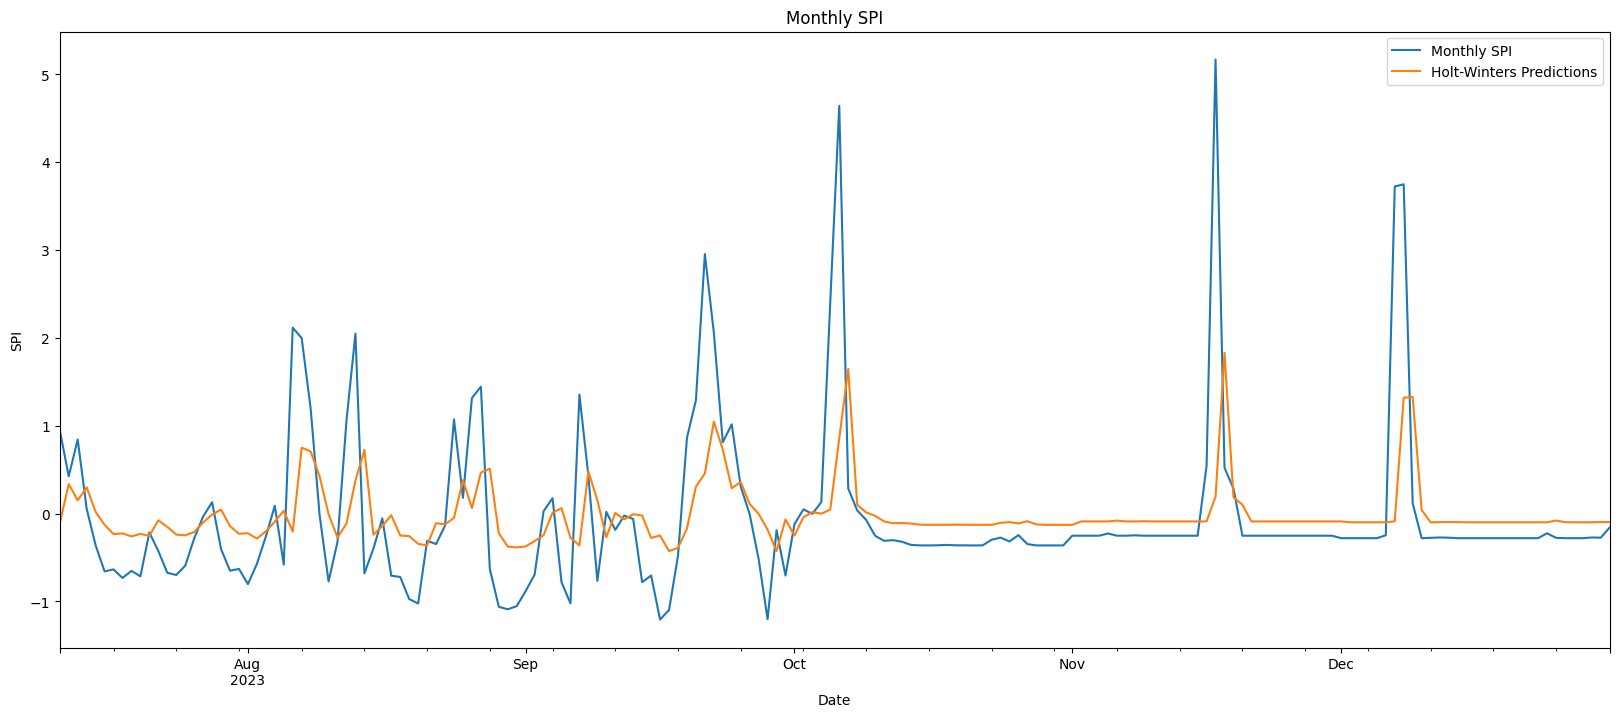

In [ ]:
import matplotlib.pyplot as plt
# Plot predictions against known values
title = 'Monthly SPI'
ylabel = 'SPI'
xlabel='Date'

ax = test_a['Monthly SPI'].plot(legend=True, figsize=(20, 8), title=title)
predicted_a.plot(legend=True)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
plt.show()

In [ ]:
#365 days

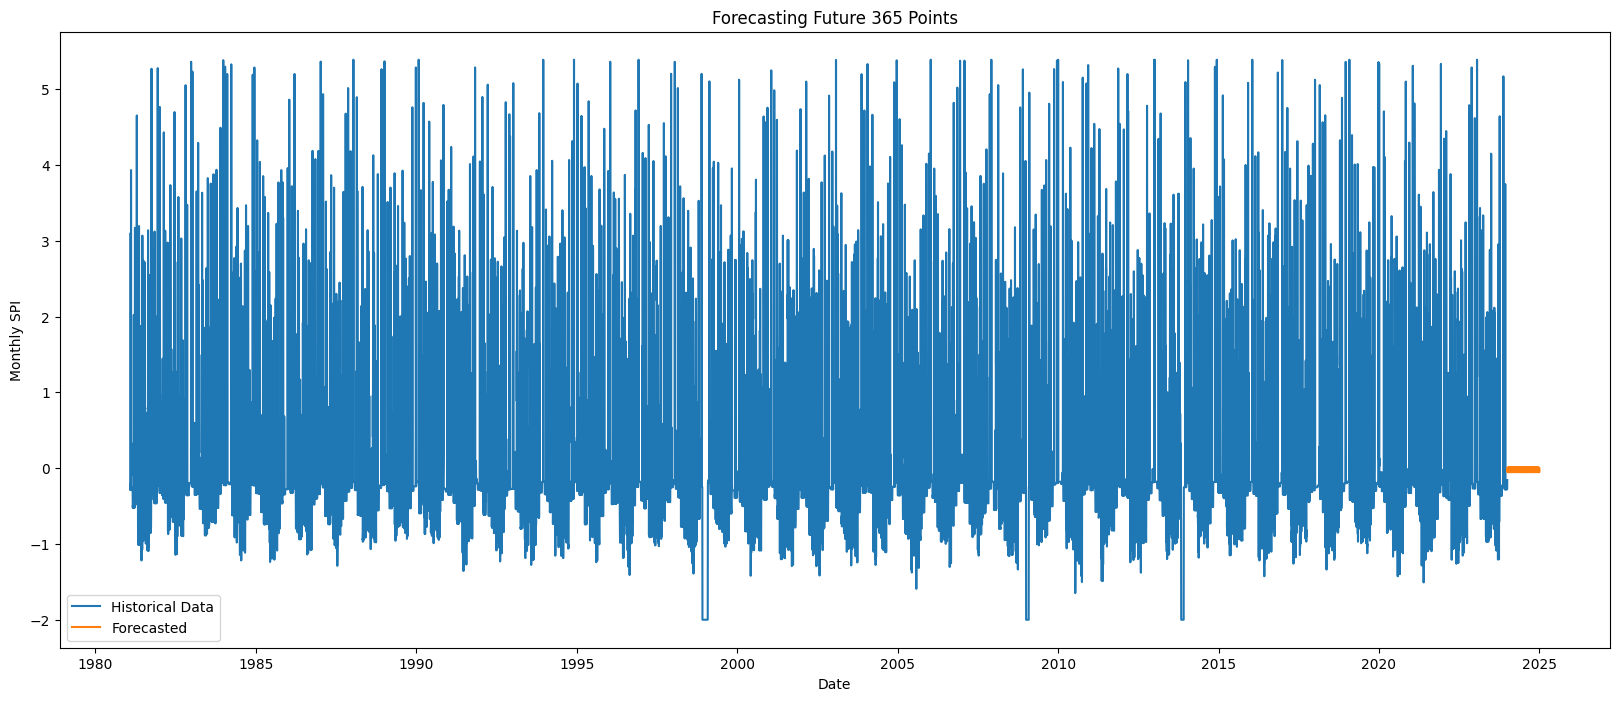

In [ ]:
fit=model.fit(optimized=True)
import matplotlib.pyplot as plt
# Forecast future 12 points
future_index = pd.date_range(start=df2.index[-1], periods=366, freq='D')[1:]  # Generate future dates
future_predictions = fit.forecast(steps=365)

predictions = pd.DataFrame({
    'Date': future_index,
    'Monthly SPI': future_predictions
})
predictions.set_index('Date', inplace=True)

# Plot the forecasted values
plt.figure(figsize=(20, 8))
plt.plot(df2.index, df2['Monthly SPI'], label='Historical Data')
plt.plot(future_index, future_predictions, label='Forecasted')
plt.title('Forecasting Future 365 Points')
plt.xlabel('Date')
plt.ylabel('Monthly SPI')
plt.legend()
plt.show()


In [ ]:
predictions

Monthly SPI
Date                   
2024-01-01    -0.000686
2024-01-02    -0.026570
2024-01-03    -0.019898
2024-01-04    -0.053906
2024-01-05    -0.006942
...                 ...
2024-12-26    -0.000686
2024-12-27    -0.026570
2024-12-28    -0.019898
2024-12-29    -0.053906
2024-12-30    -0.006942

[365 rows x 1 columns]

In [ ]:
def categorize_spi(spi):
    if spi >= 2:
        return "Extremely wet"
    elif 1.5 <= spi < 2:
        return "Severely wet"
    elif 1 <= spi < 1.5:
        return "Moderately wet"
    elif 0 <= spi < 1:
        return "Mild wet"
    elif -1 <= spi < 0:
        return "Mild drought"
    elif -1.49 <= spi < -1:
        return "Moderately drought"
    elif -1.99 <= spi < -1.5:
        return "Severely drought"
    else:
        return "Extremely drought"

predictions['Category'] = predictions['Monthly SPI'].apply(categorize_spi)

In [ ]:
predictions['Category'].value_counts()

Category
Mild drought    305
Mild wet         60
Name: count, dtype: int64

In [ ]:
predictions

Monthly SPI      Category
Date                                 
2024-01-01    -0.000686  Mild drought
2024-01-02    -0.026570  Mild drought
2024-01-03    -0.019898  Mild drought
2024-01-04    -0.053906  Mild drought
2024-01-05    -0.006942  Mild drought
...                 ...           ...
2024-12-26    -0.000686  Mild drought
2024-12-27    -0.026570  Mild drought
2024-12-28    -0.019898  Mild drought
2024-12-29    -0.053906  Mild drought
2024-12-30    -0.006942  Mild drought

[365 rows x 2 columns]

In [ ]:
#30 days

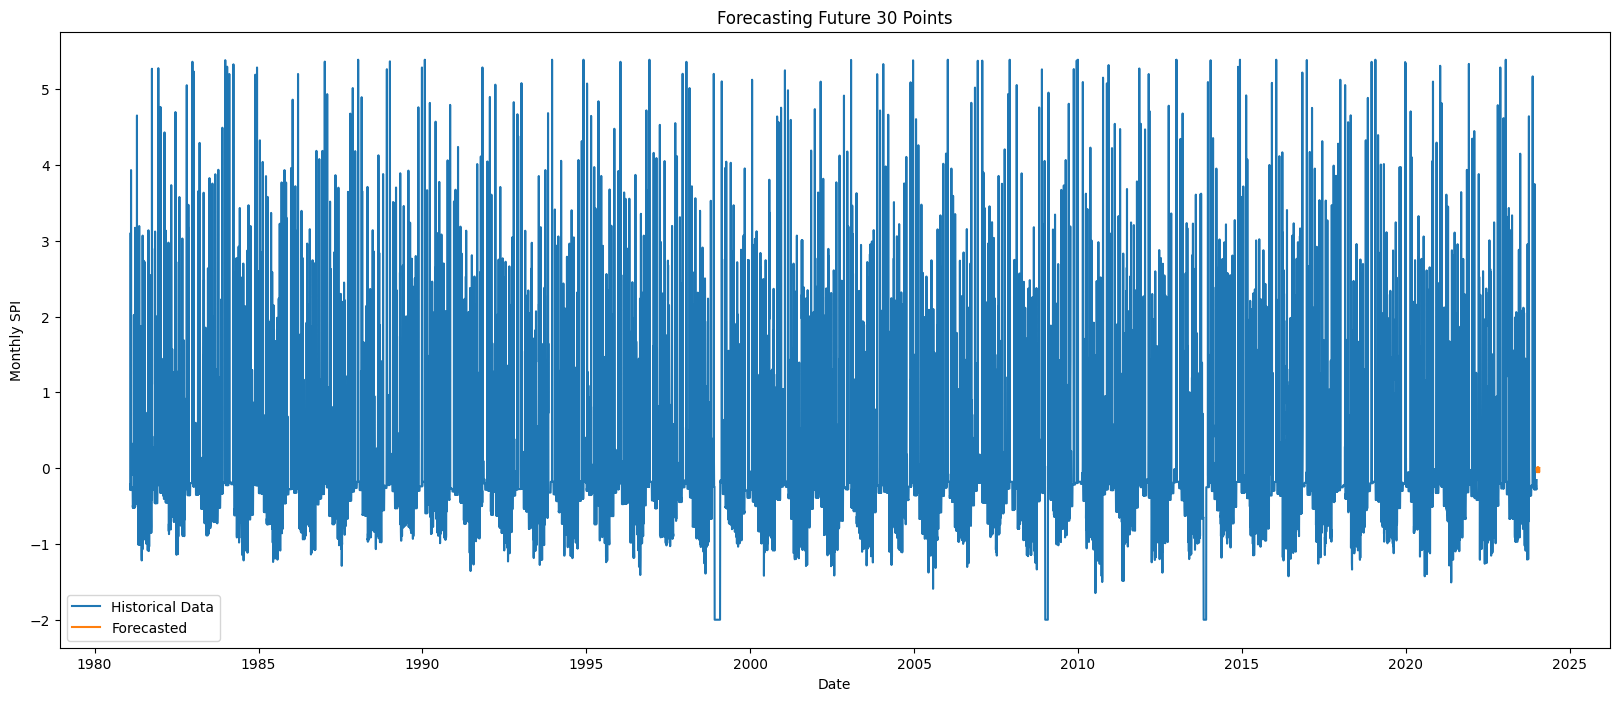

In [ ]:
fit=model.fit(optimized=True)
import matplotlib.pyplot as plt
# Forecast future 12 points
future_index = pd.date_range(start=df2.index[-1], periods=31, freq='D')[1:]  # Generate future dates
future_predictions = fit.forecast(steps=30)

predictions = pd.DataFrame({
    'Date': future_index,
    'Monthly SPI': future_predictions
})
predictions.set_index('Date', inplace=True)
# Plot the forecasted values
plt.figure(figsize=(20, 8))
plt.plot(df2.index, df2['Monthly SPI'], label='Historical Data')
plt.plot(future_index, future_predictions, label='Forecasted')
plt.title('Forecasting Future 30 Points')
plt.xlabel('Date')
plt.ylabel('Monthly SPI')
plt.legend()
plt.show()


In [ ]:
predictions

Monthly SPI
Date                   
2024-01-01    -0.000686
2024-01-02    -0.026570
2024-01-03    -0.019898
2024-01-04    -0.053906
2024-01-05    -0.006942
2024-01-06     0.000888
2024-01-07    -0.002987
2024-01-08     0.011707
2024-01-09    -0.007643
2024-01-10    -0.044732
2024-01-11    -0.028277
2024-01-12    -0.008289
2024-01-13    -0.000686
2024-01-14    -0.026570
2024-01-15    -0.019898
2024-01-16    -0.053906
2024-01-17    -0.006942
2024-01-18     0.000888
2024-01-19    -0.002987
2024-01-20     0.011707
2024-01-21    -0.007643
2024-01-22    -0.044732
2024-01-23    -0.028277
2024-01-24    -0.008289
2024-01-25    -0.000686
2024-01-26    -0.026570
2024-01-27    -0.019898
2024-01-28    -0.053906
2024-01-29    -0.006942
2024-01-30     0.000888

In [ ]:
def categorize_spi(spi):
    if spi >= 2:
        return "Extremely wet"
    elif 1.5 <= spi < 2:
        return "Severely wet"
    elif 1 <= spi < 1.5:
        return "Moderately wet"
    elif 0 <= spi < 1:
        return "Mild wet"
    elif -1 <= spi < 0:
        return "Mild drought"
    elif -1.49 <= spi < -1:
        return "Moderately drought"
    elif -1.99 <= spi < -1.5:
        return "Severely drought"
    else:
        return "Extremely drought"

predictions['Category'] = predictions['Monthly SPI'].apply(categorize_spi)

In [ ]:
predictions['Category'].value_counts()

Category
Mild drought    25
Mild wet         5
Name: count, dtype: int64

In [ ]:
predictions

Monthly SPI      Category
Date                                 
2024-01-01    -0.000686  Mild drought
2024-01-02    -0.026570  Mild drought
2024-01-03    -0.019898  Mild drought
2024-01-04    -0.053906  Mild drought
2024-01-05    -0.006942  Mild drought
2024-01-06     0.000888      Mild wet
2024-01-07    -0.002987  Mild drought
2024-01-08     0.011707      Mild wet
2024-01-09    -0.007643  Mild drought
2024-01-10    -0.044732  Mild drought
2024-01-11    -0.028277  Mild drought
2024-01-12    -0.008289  Mild drought
2024-01-13    -0.000686  Mild drought
2024-01-14    -0.026570  Mild drought
2024-01-15    -0.019898  Mild drought
2024-01-16    -0.053906  Mild drought
2024-01-17    -0.006942  Mild drought
2024-01-18     0.000888      Mild wet
2024-01-19    -0.002987  Mild drought
2024-01-20     0.011707      Mild wet
2024-01-21    -0.007643  Mild drought
2024-01-22    -0.044732  Mild drought
2024-01-23    -0.028277  Mild drought
2024-01-24    -0.008289  Mild drought
2024-01-25    -0.000686  Mild drought
2024-01-26    -0.026570  Mild drought
2024-01-27    -0.019898  Mild drought
2024-01-28    -0.053906  Mild drought
2024-01-29    -0.006942  Mild drought
2024-01-30     0.000888      Mild wet

In [ ]:
#RandomForestRegressor

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
# Create lagged features
def create_lagged_features(data, lag=12):
    df = data.copy()
    for i in range(1, lag+1):
        df[f'lag_{i}'] = df['Monthly SPI'].shift(i)
    df.dropna(inplace=True)
    return df

# Prepare data
lag = 12
df2_lagged = create_lagged_features(df2, lag)
train_lagged = df2_lagged.iloc[:15500]
test_lagged = df2_lagged.iloc[15500:]

# Split features and target
X_train = train_lagged.drop(columns=['Monthly SPI'])
y_train = train_lagged['Monthly SPI']
X_test = test_lagged.drop(columns=['Monthly SPI'])
y_test = test_lagged['Monthly SPI']

# Fit the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
predicted_a = model.predict(X_test)

# Convert predicted_a to a pandas Series with the same index as y_test
predicted_a_series = pd.Series(predicted_a, index=y_test.index, name='Predicted SPI')

# Compare predictions to expected values
for i in range(len(predicted_a)):
    print(f"predicted={predicted_a[i]}, expected={y_test.iloc[i]}")

predicted=-0.16902507401806777, expected=-0.6738631369354678
predicted=-0.46822563135863526, expected=-0.6990414470791164
predicted=-0.3912651747964678, expected=-0.5937503319329496
predicted=-0.14226731732941816, expected=-0.28337043598033607
predicted=0.21686900042176313, expected=-0.03341848437247906
predicted=0.21874245324920769, expected=0.12909606291834372
predicted=0.3743309670352433, expected=-0.40376853721269207
predicted=0.016705848405604254, expected=-0.6500581891632911
predicted=-0.4983465840888168, expected=-0.6299155410483721
predicted=-0.3974772438235805, expected=-0.8029678102614914
predicted=-0.4856706200054282, expected=-0.5724962578665423
predicted=-0.29873826196553355, expected=-0.2619774763181027
predicted=0.25609296421544614, expected=0.08937076439587566
predicted=0.6021280368898512, expected=-0.5810919334803399
predicted=-0.2982103952796851, expected=2.116338520074531
predicted=0.8719870906203048, expected=1.9970735209330888
predicted=0.8765436656975665, expected

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
# Calculate MSE
mse = mean_squared_error(y_test, predicted_a)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate RMSE
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Squared Error (MSE): 0.6106002396915886
Root Mean Squared Error (RMSE): 0.7814091371948427


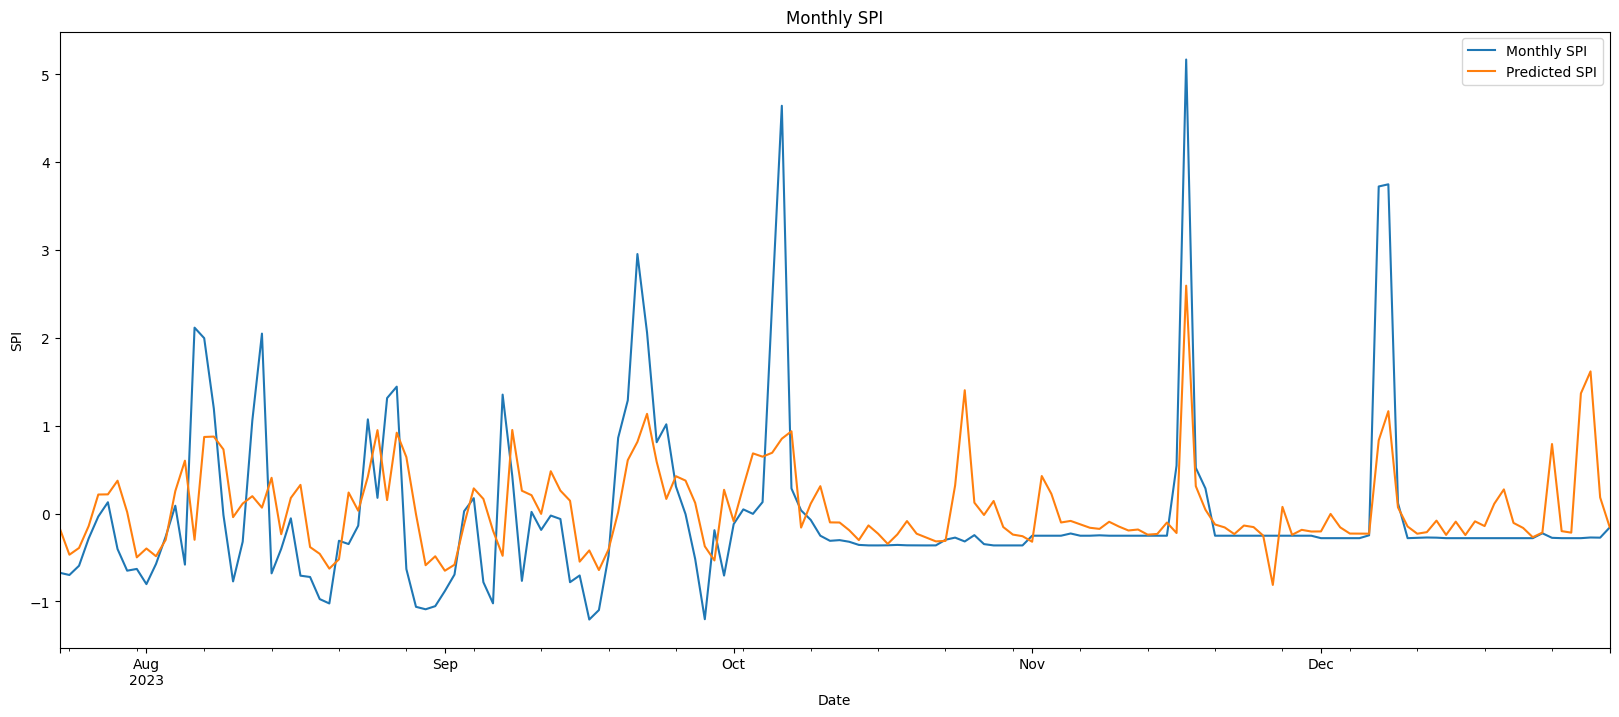

In [ ]:
# Plot predictions against known values
title = 'Monthly SPI'
ylabel = 'SPI'
xlabel = 'Date'

ax = y_test.plot(legend=True, figsize=(20, 8), title=title)
predicted_a_series.plot(legend=True, ax=ax)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
plt.show()

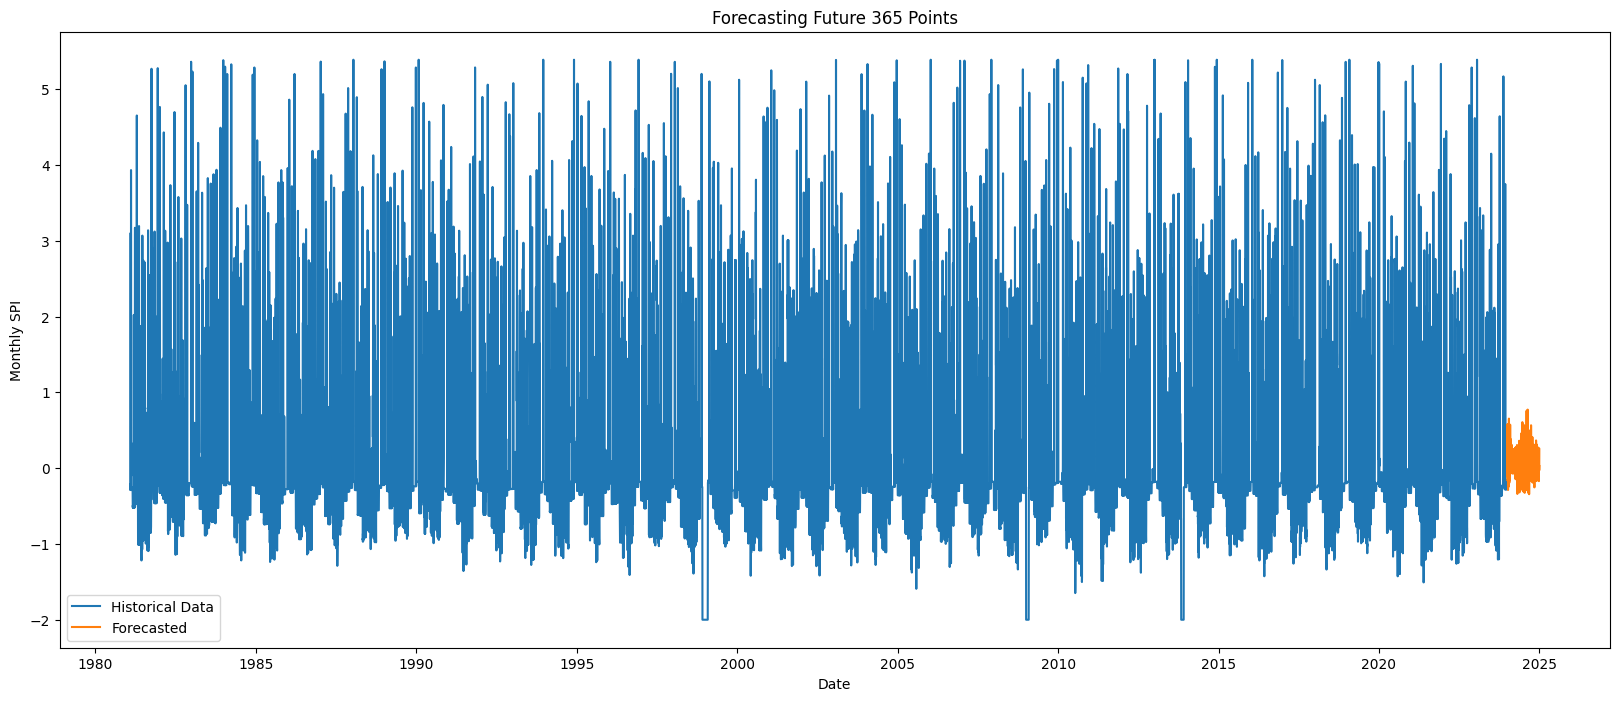

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

# Forecast future 365 points
future_index = pd.date_range(start=df2.index[-1], periods=366, freq='D')[1:]  # Generate future dates

# Initialize a DataFrame for the future predictions
future_df = pd.DataFrame(index=future_index)

# Add lagged features for the future predictions
for i in range(1, lag + 1):
    future_df[f'lag_{i}'] = np.nan

# Use the last known values from df2_lagged to initialize the future lagged features
last_known_values = df2_lagged.iloc[-1].to_dict()

# Initialize the first set of lagged features for future_df
for i in range(1, lag + 1):
    future_df.iloc[0, i-1] = last_known_values[f'lag_{i}']

# Forecast future points using lagged features
future_predictions = []
for i in range(len(future_index)):
    if i > 0:
        # Shift the lagged features forward
        for j in range(1, lag):
            future_df.iloc[i, j-1] = future_df.iloc[i-1, j]
        future_df.iloc[i, lag-1] = next_prediction

    # Prepare the input for prediction
    X_future = future_df.iloc[i].values.reshape(1, -1)

    # Predict the next value
    next_prediction = model.predict(X_future)[0]
    future_predictions.append(next_prediction)

# Convert future predictions to a DataFrame
predictions = pd.DataFrame({
    'Date': future_index,
    'Monthly SPI': future_predictions
})
predictions.set_index('Date', inplace=True)

# Plot the forecasted values
plt.figure(figsize=(20, 8))
plt.plot(df2.index, df2['Monthly SPI'], label='Historical Data')
plt.plot(predictions.index, predictions['Monthly SPI'], label='Forecasted')
plt.title('Forecasting Future 365 Points')
plt.xlabel('Date')
plt.ylabel('Monthly SPI')
plt.legend()
plt.show()


In [ ]:
predictions

Monthly SPI
Date                   
2024-01-01    -0.156741
2024-01-02     0.020889
2024-01-03     0.581108
2024-01-04     0.321277
2024-01-05     0.000029
...                 ...
2024-12-26    -0.021824
2024-12-27     0.166775
2024-12-28     0.262893
2024-12-29    -0.029323
2024-12-30     0.027819

[365 rows x 1 columns]

In [ ]:
def categorize_spi(spi):
    if spi >= 2:
        return "Extremely wet"
    elif 1.5 <= spi < 2:
        return "Severely wet"
    elif 1 <= spi < 1.5:
        return "Moderately wet"
    elif 0 <= spi < 1:
        return "Mild wet"
    elif -1 <= spi < 0:
        return "Mild drought"
    elif -1.49 <= spi < -1:
        return "Moderately drought"
    elif -1.99 <= spi < -1.5:
        return "Severely drought"
    else:
        return "Extremely drought"

predictions['Category'] = predictions['Monthly SPI'].apply(categorize_spi)

In [ ]:
predictions['Category'].value_counts()

Category
Mild wet        263
Mild drought    102
Name: count, dtype: int64

In [ ]:
predictions

Monthly SPI      Category
Date                                 
2024-01-01    -0.156741  Mild drought
2024-01-02     0.020889      Mild wet
2024-01-03     0.581108      Mild wet
2024-01-04     0.321277      Mild wet
2024-01-05     0.000029      Mild wet
...                 ...           ...
2024-12-26    -0.021824  Mild drought
2024-12-27     0.166775      Mild wet
2024-12-28     0.262893      Mild wet
2024-12-29    -0.029323  Mild drought
2024-12-30     0.027819      Mild wet

[365 rows x 2 columns]

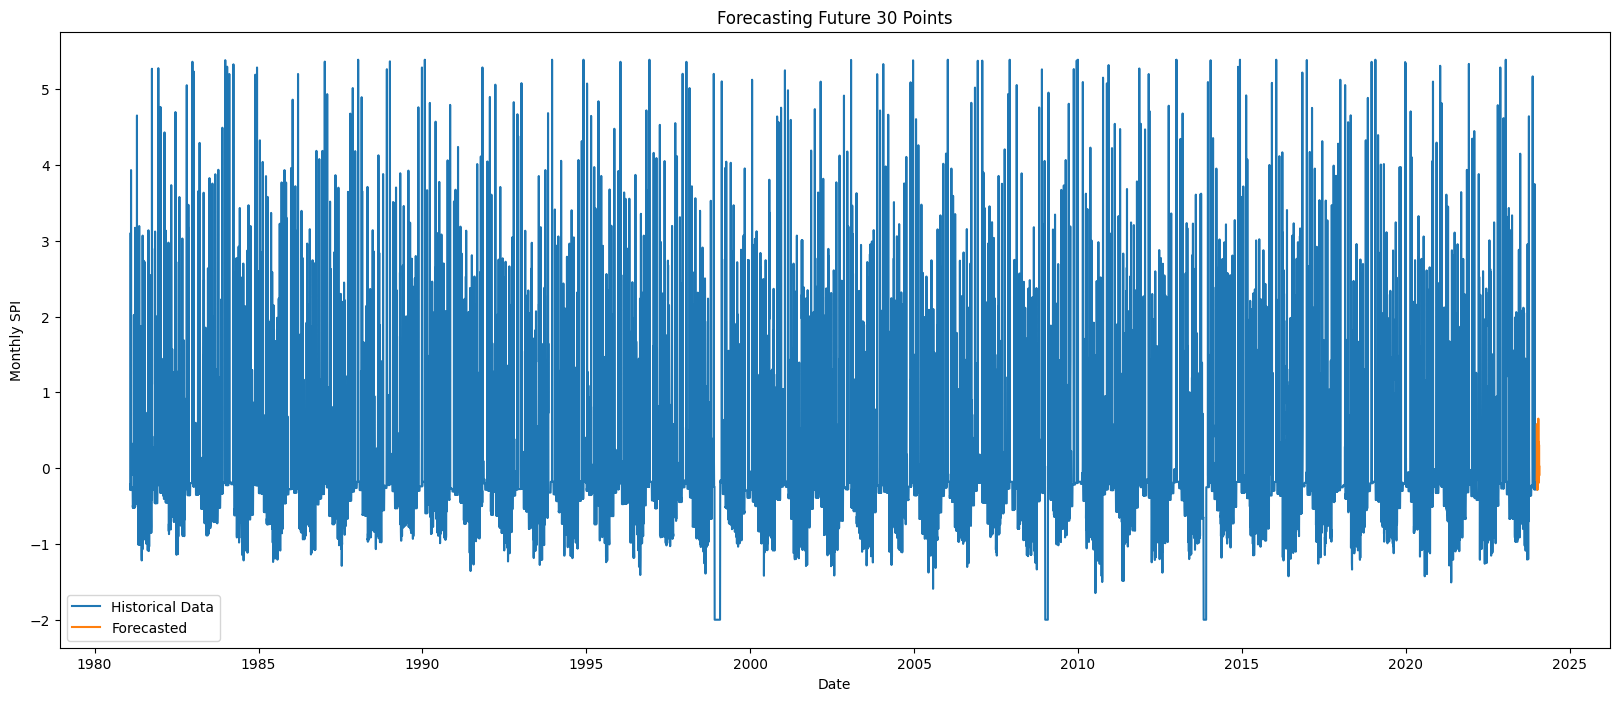

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

# Forecast future 30 points
future_index = pd.date_range(start=df2.index[-1], periods=31, freq='D')[1:]  # Generate future dates

# Initialize a DataFrame for the future predictions
future_df = pd.DataFrame(index=future_index)

# Add lagged features for the future predictions
for i in range(1, lag + 1):
    future_df[f'lag_{i}'] = np.nan

# Use the last known values from df2_lagged to initialize the future lagged features
last_known_values = df2_lagged.iloc[-1].to_dict()

# Initialize the first set of lagged features for future_df
for i in range(1, lag + 1):
    future_df.iloc[0, i-1] = last_known_values[f'lag_{i}']

# Forecast future points using lagged features
future_predictions = []
for i in range(len(future_index)):
    if i > 0:
        # Shift the lagged features forward
        for j in range(1, lag):
            future_df.iloc[i, j-1] = future_df.iloc[i-1, j]
        future_df.iloc[i, lag-1] = next_prediction

    # Prepare the input for prediction
    X_future = future_df.iloc[i].values.reshape(1, -1)

    # Predict the next value
    next_prediction = model.predict(X_future)[0]
    future_predictions.append(next_prediction)

# Convert future predictions to a DataFrame
predictions = pd.DataFrame({
    'Date': future_index,
    'Monthly SPI': future_predictions
})
predictions.set_index('Date', inplace=True)

# Plot the forecasted values
plt.figure(figsize=(20, 8))
plt.plot(df2.index, df2['Monthly SPI'], label='Historical Data')
plt.plot(predictions.index, predictions['Monthly SPI'], label='Forecasted')
plt.title('Forecasting Future 30 Points')
plt.xlabel('Date')
plt.ylabel('Monthly SPI')
plt.legend()
plt.show()

In [ ]:
predictions

Monthly SPI
Date                   
2024-01-01    -0.156741
2024-01-02     0.020889
2024-01-03     0.581108
2024-01-04     0.321277
2024-01-05     0.000029
2024-01-06    -0.117414
2024-01-07     0.276210
2024-01-08    -0.096188
2024-01-09    -0.288128
2024-01-10    -0.115306
2024-01-11    -0.245650
2024-01-12    -0.036634
2024-01-13    -0.248751
2024-01-14    -0.216802
2024-01-15     0.056171
2024-01-16     0.247903
2024-01-17     0.326307
2024-01-18    -0.000289
2024-01-19     0.653292
2024-01-20     0.038339
2024-01-21     0.342938
2024-01-22     0.317002
2024-01-23    -0.194744
2024-01-24     0.302489
2024-01-25     0.125686
2024-01-26    -0.166343
2024-01-27     0.306809
2024-01-28    -0.025101
2024-01-29    -0.098637
2024-01-30     0.019023

In [ ]:
def categorize_spi(spi):
    if spi >= 2:
        return "Extremely wet"
    elif 1.5 <= spi < 2:
        return "Severely wet"
    elif 1 <= spi < 1.5:
        return "Moderately wet"
    elif 0 <= spi < 1:
        return "Mild wet"
    elif -1 <= spi < 0:
        return "Mild drought"
    elif -1.49 <= spi < -1:
        return "Moderately drought"
    elif -1.99 <= spi < -1.5:
        return "Severely drought"
    else:
        return "Extremely drought"

predictions['Category'] = predictions['Monthly SPI'].apply(categorize_spi)

In [ ]:
predictions['Category'].value_counts()

Category
Mild wet        16
Mild drought    14
Name: count, dtype: int64

In [ ]:
predictions

Monthly SPI      Category
Date                                 
2024-01-01    -0.156741  Mild drought
2024-01-02     0.020889      Mild wet
2024-01-03     0.581108      Mild wet
2024-01-04     0.321277      Mild wet
2024-01-05     0.000029      Mild wet
2024-01-06    -0.117414  Mild drought
2024-01-07     0.276210      Mild wet
2024-01-08    -0.096188  Mild drought
2024-01-09    -0.288128  Mild drought
2024-01-10    -0.115306  Mild drought
2024-01-11    -0.245650  Mild drought
2024-01-12    -0.036634  Mild drought
2024-01-13    -0.248751  Mild drought
2024-01-14    -0.216802  Mild drought
2024-01-15     0.056171      Mild wet
2024-01-16     0.247903      Mild wet
2024-01-17     0.326307      Mild wet
2024-01-18    -0.000289  Mild drought
2024-01-19     0.653292      Mild wet
2024-01-20     0.038339      Mild wet
2024-01-21     0.342938      Mild wet
2024-01-22     0.317002      Mild wet
2024-01-23    -0.194744  Mild drought
2024-01-24     0.302489      Mild wet
2024-01-25     0.125686      Mild wet
2024-01-26    -0.166343  Mild drought
2024-01-27     0.306809      Mild wet
2024-01-28    -0.025101  Mild drought
2024-01-29    -0.098637  Mild drought
2024-01-30     0.019023      Mild wet

In [ ]:
#ARIMA + MLP nural network

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

# Fit ARIMA model
arima_model = ARIMA(df2['Monthly SPI'], order=(2, 0, 1))
arima_results = arima_model.fit()

# Get residuals
residuals = arima_results.resid

# Prepare data for neural network
def create_dataset(data, lag=12):
    X, y = [], []
    for i in range(len(data) - lag):
        X.append(data[i:i+lag])
        y.append(data[i+lag])
    return np.array(X), np.array(y)

lag = 12  # Adjust as needed
X, y = create_dataset(residuals.values, lag)

# Split data into train and test sets
X_train, X_test = X[:15500], X[15500:]
y_train, y_test = y[:15500], y[15500:]

# Define and train neural network
model = Sequential()
model.add(Dense(12, input_dim=lag, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=10, batch_size=20, verbose=1)

Epoch 1/10
775/775 [==============================] - 3s 2ms/step - loss: 1.0099
Epoch 2/10
775/775 [==============================] - 2s 2ms/step - loss: 0.8427
Epoch 3/10
775/775 [==============================] - 2s 2ms/step - loss: 0.8258
Epoch 4/10
775/775 [==============================] - 2s 2ms/step - loss: 0.8177
Epoch 5/10
775/775 [==============================] - 2s 3ms/step - loss: 0.8121
Epoch 6/10
775/775 [==============================] - 3s 3ms/step - loss: 0.8076
Epoch 7/10
775/775 [==============================] - 3s 3ms/step - loss: 0.8044
Epoch 8/10
775/775 [==============================] - 2s 2ms/step - loss: 0.8026
Epoch 9/10
775/775 [==============================] - 2s 2ms/step - loss: 0.8014
Epoch 10/10
775/775 [==============================] - 1s 2ms/step - loss: 0.7992


In [ ]:
# Make predictions
train_predictions = model.predict(X_train).flatten()
test_predictions = model.predict(X_test).flatten()

# Reshape train_predictions to match the shape of arima_results.fittedvalues[:15500]
train_predictions = train_predictions[:15500]

# Ensure test_predictions and arima_results.fittedvalues[15500:] have the same length
min_length = min(len(test_predictions), len(arima_results.fittedvalues[15500:]))
test_predictions = test_predictions[:min_length]
arima_test_values = arima_results.fittedvalues[15500:15500+min_length]

# Invert predictions (convert back to original scale)
train_predictions = train_predictions + arima_results.fittedvalues[:15500]
test_predictions = test_predictions + arima_test_values

# Evaluate model
train_rmse = np.sqrt(mean_squared_error(df2['Monthly SPI'].iloc[lag:15500], train_predictions[:15488]))
test_rmse = np.sqrt(mean_squared_error(df2['Monthly SPI'].iloc[15500+lag:15500+lag+min_length], test_predictions))
# Calculate Mean Squared Error (MSE) for the testing dataset
test_mse = mean_squared_error(df2['Monthly SPI'].iloc[15500+lag:15500+lag+min_length], test_predictions)

# Print the RMSE and MSE
print(f"Test MSE: {test_mse}")
print(f"Test RMSE: {test_rmse}")



6/6 [==============================] - 0s 2ms/step
Test MSE: 1.0214203758231102
Test RMSE: 1.0106534400194314


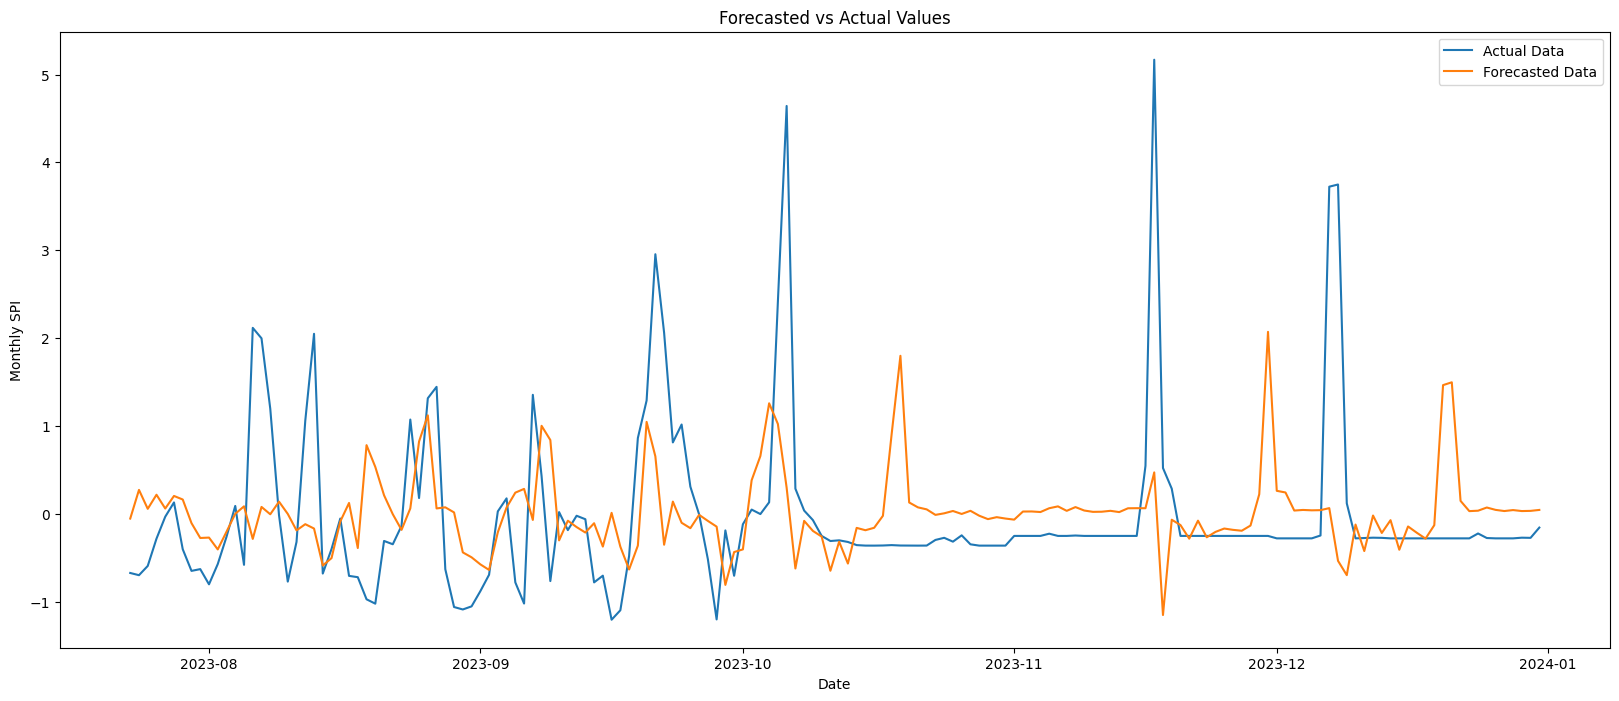

In [ ]:
# Plot the forecasted values against the actual values
plt.figure(figsize=(20, 8))
plt.plot(df2.index[15500+lag:15500+lag+min_length], df2['Monthly SPI'].iloc[15500+lag:15500+lag+min_length], label='Actual Data')
plt.plot(df2.index[15500+lag:15500+lag+min_length], test_predictions, label='Forecasted Data')
plt.title('Forecasted vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Monthly SPI')
plt.legend()
plt.show()


1/1 [==============================] - 0s 22ms/step


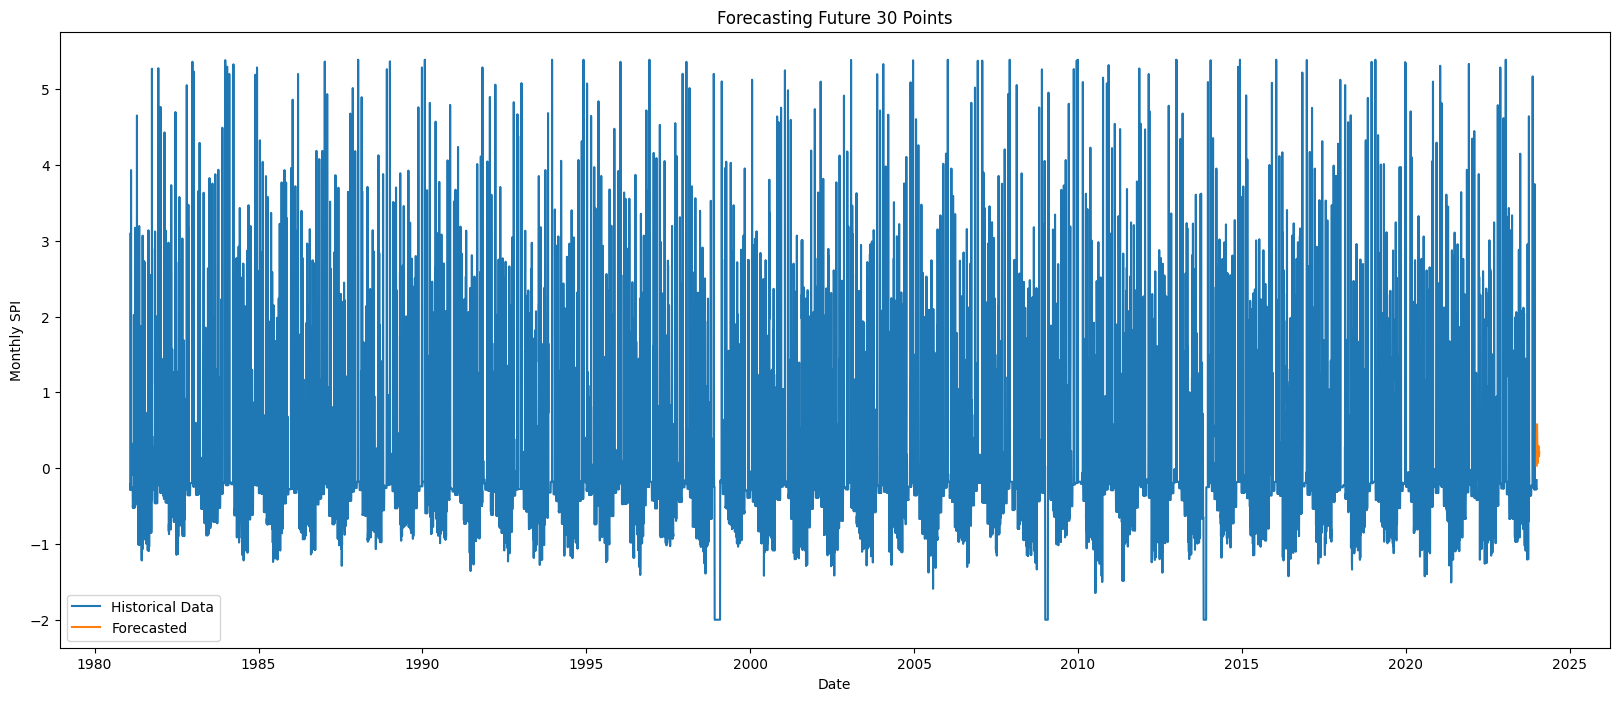

In [ ]:
# Forecast future 30 points
future_index = pd.date_range(start=df2.index[-1], periods=31, freq='D')[1:]  # Generate future dates
O
# Initialize a DataFrame for the future predictions
future_df = pd.DataFrame(index=future_index)

# Add lagged features for the future predictions
for i in range(1, lag + 1):
    future_df[f'lag_{i}'] = np.nan

# Use the last known values from df2 to initialize the future lagged features
last_known_values = df2.iloc[-lag:].to_dict(orient='list')

# Initialize the first set of lagged features for future_df
for i in range(1, lag + 1):
    future_df.iloc[0, i-1] = last_known_values['Monthly SPI'][-i]

# Forecast future points using lagged features
future_predictions = []
for i in range(len(future_index)):
    if i > 0:
        # Shift the lagged features forward
        for j in range(1, lag):
            future_df.iloc[i, j-1] = future_df.iloc[i-1, j]
        future_df.iloc[i, lag-1] = next_prediction

    # Prepare the input for prediction
    X_future = future_df.iloc[i].values.reshape(1, -1)

    # Predict the next value
    next_prediction = model.predict(X_future)[0]
    future_predictions.append(next_prediction)

# Convert future predictions to a DataFrame
predictions = pd.DataFrame({
    'Date': future_index,
    'Monthly SPI': future_predictions
})
predictions.set_index('Date', inplace=True)

# Plot the forecasted values
plt.figure(figsize=(20, 8))
plt.plot(df2.index, df2['Monthly SPI'], label='Historical Data')
plt.plot(predictions.index, predictions['Monthly SPI'], label='Forecasted')
plt.title('Forecasting Future 30 Points')
plt.xlabel('Date')
plt.ylabel('Monthly SPI')
plt.legend()
plt.show()

In [ ]:

def categorize_spi(spi):
    if spi >= 2:
        return "Extremely wet"
    elif 1.5 <= spi < 2:
        return "Severely wet"
    elif 1 <= spi < 1.5:
        return "Moderately wet"
    elif 0 <= spi < 1:
        return "Mild wet"
    elif -1 <= spi < 0:
        return "Mild drought"
    elif -1.49 <= spi < -1:
        return "Moderately drought"
    elif -1.99 <= spi < -1.5:
        return "Severely drought"
    else:
        return "Extremely drought"

predictions['Category'] = predictions['Monthly SPI'].apply(categorize_spi)
print(predictions['Category'].value_counts())


Category
Mild wet    30
Name: count, dtype: int64


In [ ]:
predictions

Monthly SPI  Category
Date                               
2024-01-01  [0.033023268]  Mild wet
2024-01-02   [0.25043595]  Mild wet
2024-01-03   [0.46904108]  Mild wet
2024-01-04    [0.5796943]  Mild wet
2024-01-05    [0.5678149]  Mild wet
2024-01-06   [0.47681254]  Mild wet
2024-01-07   [0.38686186]  Mild wet
2024-01-08     [0.297097]  Mild wet
2024-01-09   [0.18855178]  Mild wet
2024-01-10   [0.06524859]  Mild wet
2024-01-11   [0.06709879]  Mild wet
2024-01-12  [0.113828786]  Mild wet
2024-01-13    [0.1257787]  Mild wet
2024-01-14   [0.16920352]  Mild wet
2024-01-15   [0.17372921]  Mild wet
2024-01-16    [0.1722474]  Mild wet
2024-01-17    [0.2203476]  Mild wet
2024-01-18   [0.26923886]  Mild wet
2024-01-19   [0.29412782]  Mild wet
2024-01-20   [0.28873664]  Mild wet
2024-01-21   [0.28203484]  Mild wet
2024-01-22   [0.26888758]  Mild wet
2024-01-23   [0.22714221]  Mild wet
2024-01-24   [0.19676277]  Mild wet
2024-01-25   [0.17481294]  Mild wet
2024-01-26   [0.15381476]  Mild wet
2024-01-27   [0.15717968]  Mild wet
2024-01-28    [0.1810002]  Mild wet
2024-01-29    [0.1968154]  Mild wet
2024-01-30   [0.20727867]  Mild wet

1/1 [==============================] - 0s 26ms/step


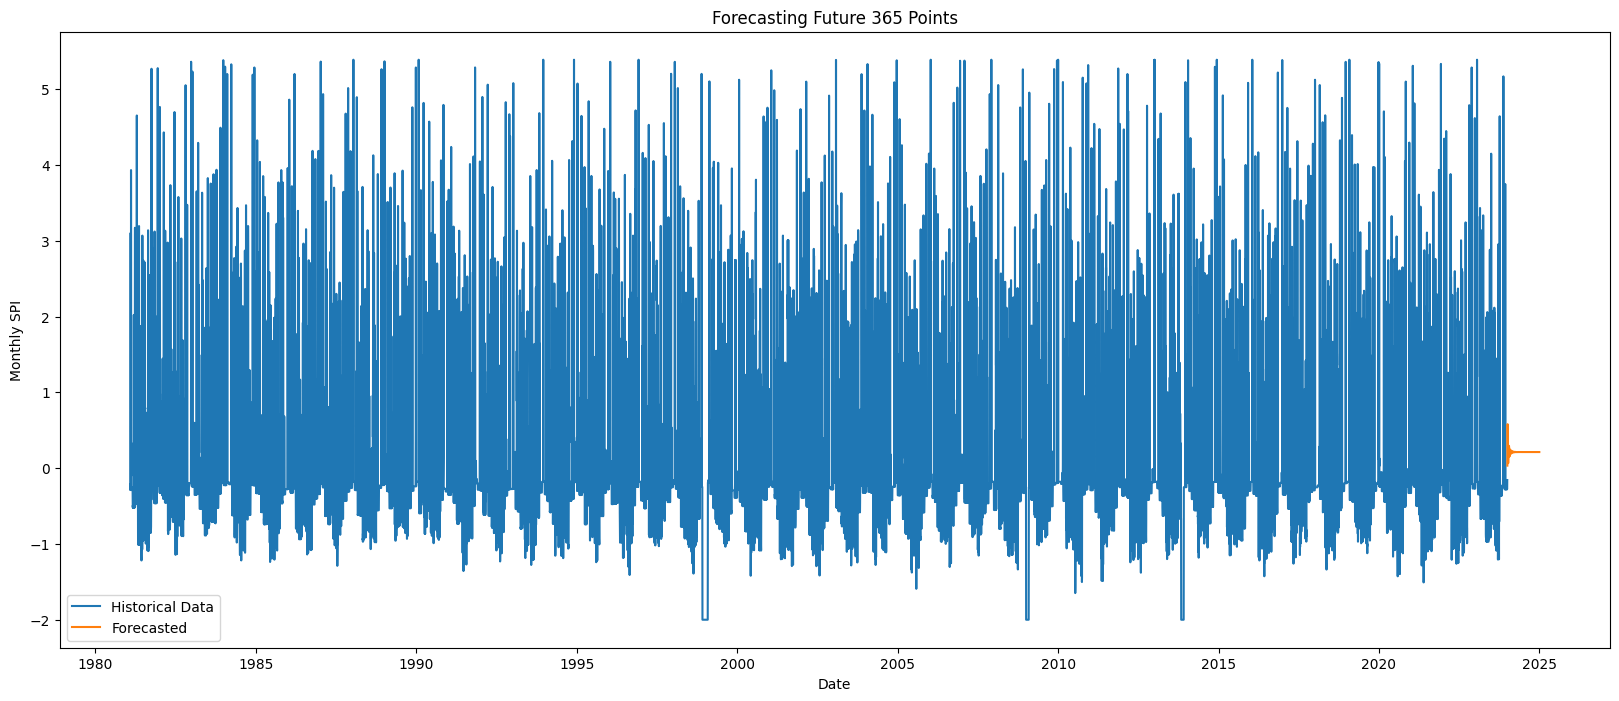

In [ ]:
# Forecast future 365 points
future_index = pd.date_range(start=df2.index[-1], periods=366, freq='D')[1:]  # Generate future dates

# Initialize a DataFrame for the future predictions
future_df = pd.DataFrame(index=future_index)

# Add lagged features for the future predictions
for i in range(1, lag + 1):
    future_df[f'lag_{i}'] = np.nan

# Use the last known values from df2 to initialize the future lagged features
last_known_values = df2.iloc[-lag:].to_dict(orient='list')

# Initialize the first set of lagged features for future_df
for i in range(1, lag + 1):
    future_df.iloc[0, i-1] = last_known_values['Monthly SPI'][-i]

# Forecast future points using lagged features
future_predictions = []
for i in range(len(future_index)):
    if i > 0:
        # Shift the lagged features forward
        for j in range(1, lag):
            future_df.iloc[i, j-1] = future_df.iloc[i-1, j]
        future_df.iloc[i, lag-1] = next_prediction

    # Prepare the input for prediction
    X_future = future_df.iloc[i].values.reshape(1, -1)

    # Predict the next value
    next_prediction = model.predict(X_future)[0]
    future_predictions.append(next_prediction)

# Convert future predictions to a DataFrame
predictions = pd.DataFrame({
    'Date': future_index,
    'Monthly SPI': future_predictions
})
predictions.set_index('Date', inplace=True)

# Plot the forecasted values
plt.figure(figsize=(20, 8))
plt.plot(df2.index, df2['Monthly SPI'], label='Historical Data')
plt.plot(predictions.index, predictions['Monthly SPI'], label='Forecasted')
plt.title('Forecasting Future 365 Points')
plt.xlabel('Date')
plt.ylabel('Monthly SPI')
plt.legend()
plt.show()

In [ ]:

def categorize_spi(spi):
    if spi >= 2:
        return "Extremely wet"
    elif 1.5 <= spi < 2:
        return "Severely wet"
    elif 1 <= spi < 1.5:
        return "Moderately wet"
    elif 0 <= spi < 1:
        return "Mild wet"
    elif -1 <= spi < 0:
        return "Mild drought"
    elif -1.49 <= spi < -1:
        return "Moderately drought"
    elif -1.99 <= spi < -1.5:
        return "Severely drought"
    else:
        return "Extremely drought"

predictions['Category'] = predictions['Monthly SPI'].apply(categorize_spi)
print(predictions['Category'].value_counts())


Category
Mild wet    365
Name: count, dtype: int64


In [ ]:
predictions

Monthly SPI  Category
Date                               
2024-01-01  [0.033023268]  Mild wet
2024-01-02   [0.25043595]  Mild wet
2024-01-03   [0.46904108]  Mild wet
2024-01-04    [0.5796943]  Mild wet
2024-01-05    [0.5678149]  Mild wet
...                   ...       ...
2024-12-26   [0.21217367]  Mild wet
2024-12-27   [0.21217364]  Mild wet
2024-12-28   [0.21217364]  Mild wet
2024-12-29   [0.21217367]  Mild wet
2024-12-30   [0.21217367]  Mild wet

[365 rows x 2 columns]

In [ ]:
#ARIMA + LSTM

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

# Fit ARIMA model
arima_model = ARIMA(df2['Monthly SPI'], order=(2, 0, 1))
arima_results = arima_model.fit()

# Get residuals
residuals = arima_results.resid

# Prepare data for LSTM
def create_dataset(data, lag=12):
    X, y = [], []
    for i in range(len(data) - lag):
        X.append(data[i:i+lag])
        y.append(data[i+lag])
    return np.array(X), np.array(y)

lag = 12  # Adjust as needed
X, y = create_dataset(residuals.values, lag)

# Reshape data for LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split data into train and test sets
X_train, X_test = X[:15500], X[15500:]
y_train, y_test = y[:15500], y[15500:]

# Define and train LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(lag, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=10, batch_size=10, verbose=1)

# Make predictions
train_predictions = model.predict(X_train).flatten()
test_predictions = model.predict(X_test).flatten()

# Reshape train_predictions to match the shape of arima_results.fittedvalues[:15500]
train_predictions = train_predictions[:15500]

# Ensure test_predictions and arima_results.fittedvalues[15500:] have the same length
min_length = min(len(test_predictions), len(arima_results.fittedvalues[15500:]))
test_predictions = test_predictions[:min_length]
arima_test_values = arima_results.fittedvalues[15500:15500+min_length]

# Invert predictions (convert back to original scale)
train_predictions = train_predictions + arima_results.fittedvalues[:15500]
test_predictions = test_predictions + arima_test_values

# Evaluate model
train_rmse = np.sqrt(mean_squared_error(df2['Monthly SPI'].iloc[lag:15500], train_predictions[:15488]))
test_rmse = np.sqrt(mean_squared_error(df2['Monthly SPI'].iloc[15500+lag:15500+lag+min_length], test_predictions))
# Calculate Mean Squared Error (MSE) for the testing dataset
test_mse = mean_squared_error(df2['Monthly SPI'].iloc[15500+lag:15500+lag+min_length], test_predictions)

# Print the RMSE and MSE
print(f"Test MSE: {test_mse}")
print(f"Test RMSE: {test_rmse}")

Epoch 1/10
1550/1550 [==============================] - 22s 11ms/step - loss: 0.8270
Epoch 2/10
1550/1550 [==============================] - 21s 14ms/step - loss: 0.8023
Epoch 3/10
1550/1550 [==============================] - 23s 15ms/step - loss: 0.7976
Epoch 4/10
1550/1550 [==============================] - 22s 14ms/step - loss: 0.7948
Epoch 5/10
1550/1550 [==============================] - 20s 13ms/step - loss: 0.7913
Epoch 6/10
1550/1550 [==============================] - 15s 10ms/step - loss: 0.7889
Epoch 7/10
1550/1550 [==============================] - 11s 7ms/step - loss: 0.7871
Epoch 8/10
1550/1550 [==============================] - 11s 7ms/step - loss: 0.7840
Epoch 9/10
1550/1550 [==============================] - 10s 7ms/step - loss: 0.7829
Epoch 10/10
6/6 [==============================] - 0s 6ms/step
Test MSE: 0.9277144177855764
Test RMSE: 0.9631793279475928


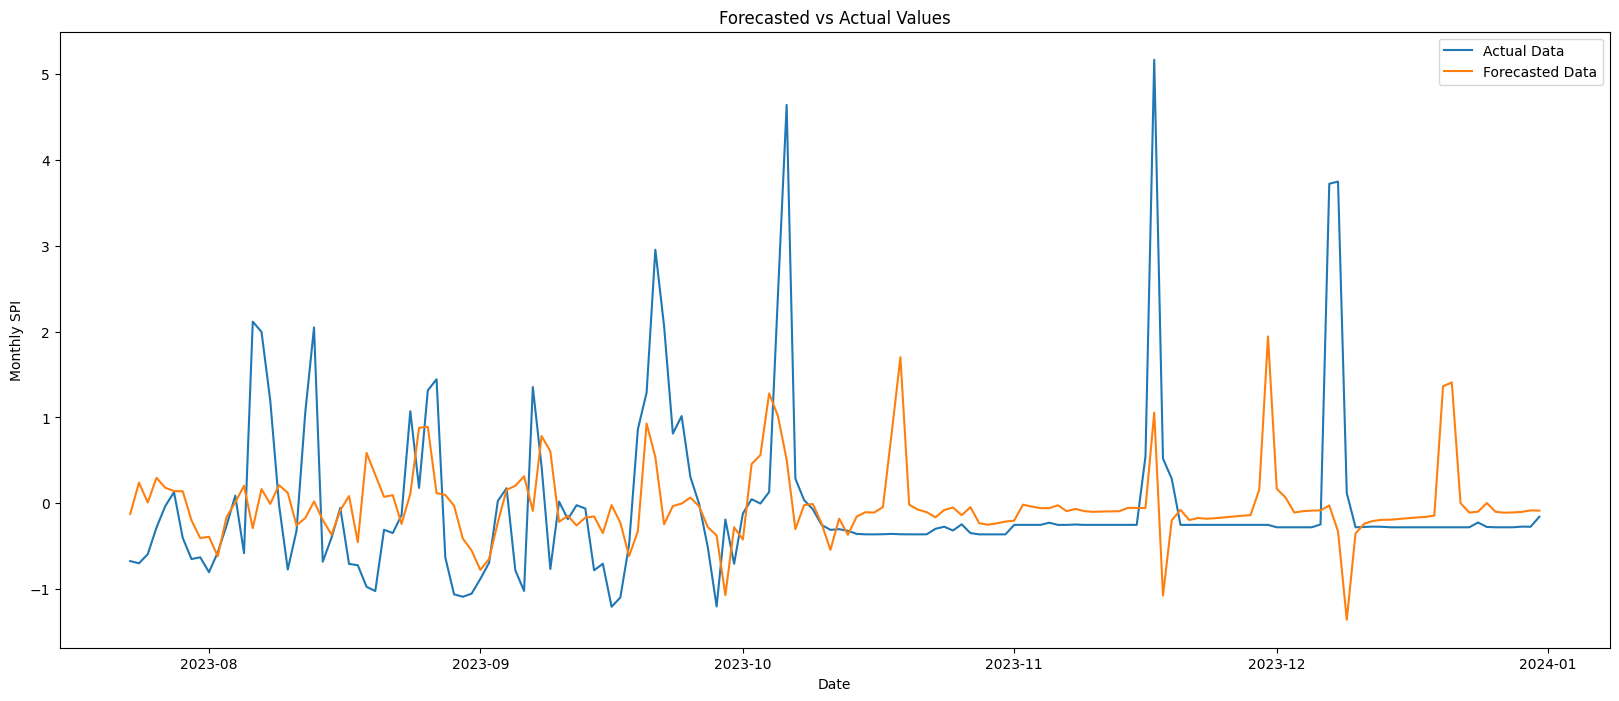

In [ ]:
# Plot the forecasted values against the actual values
plt.figure(figsize=(20, 8))
plt.plot(df2.index[15500+lag:15500+lag+min_length], df2['Monthly SPI'].iloc[15500+lag:15500+lag+min_length], label='Actual Data')
plt.plot(df2.index[15500+lag:15500+lag+min_length], test_predictions, label='Forecasted Data')
plt.title('Forecasted vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Monthly SPI')
plt.legend()
plt.show()

1/1 [==============================] - 0s 26ms/step


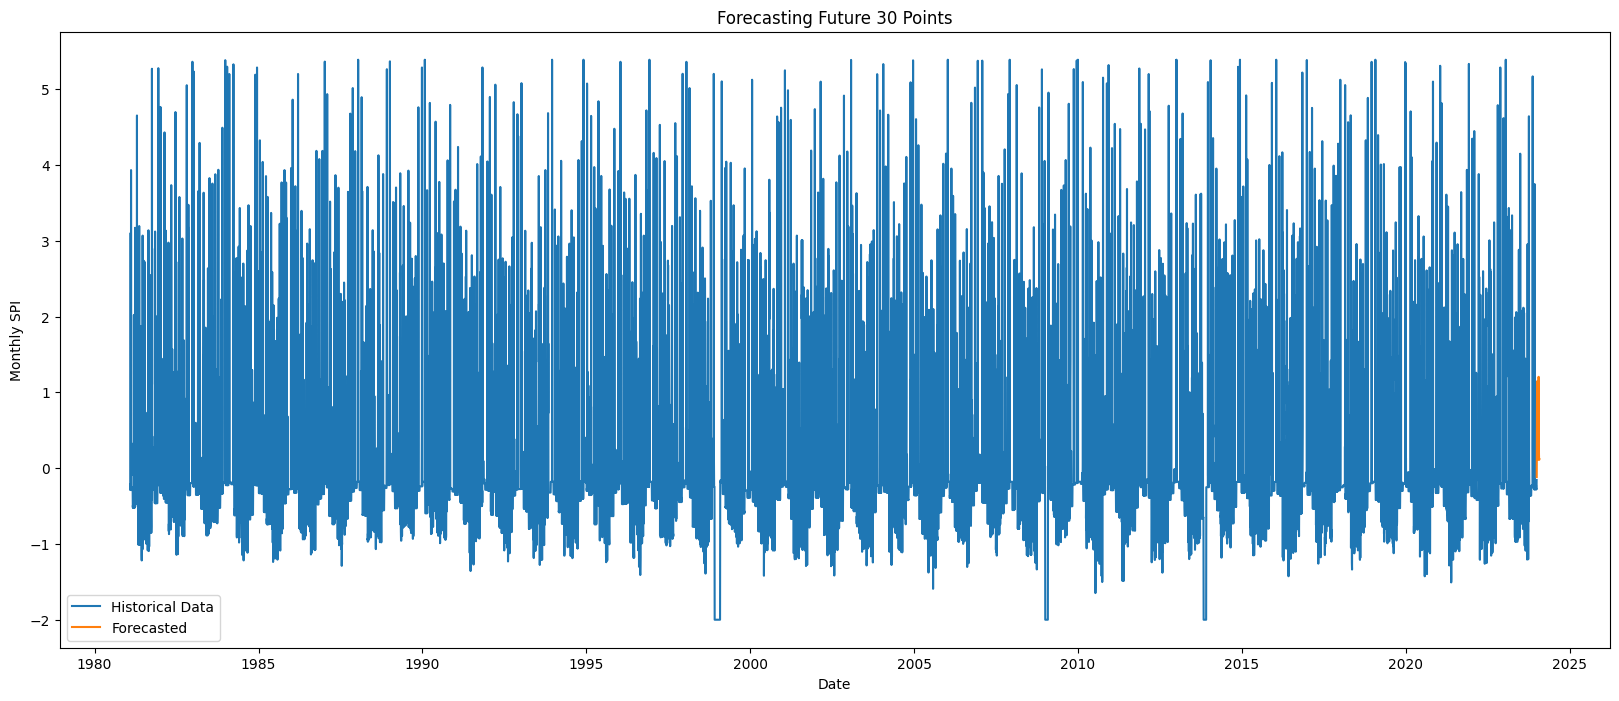

In [ ]:
# Forecast future 30 points
future_index = pd.date_range(start=df2.index[-1], periods=31, freq='D')[1:]  # Generate future dates

# Initialize a DataFrame for the future predictions
future_df = pd.DataFrame(index=future_index)

# Add lagged features for the future predictions
for i in range(1, lag + 1):
    future_df[f'lag_{i}'] = np.nan

# Use the last known values from df2 to initialize the future lagged features
last_known_values = df2.iloc[-lag:].to_dict(orient='list')

# Initialize the first set of lagged features for future_df
for i in range(1, lag + 1):
    future_df.iloc[0, i-1] = last_known_values['Monthly SPI'][-i]

# Forecast future points using lagged features
future_predictions = []
for i in range(len(future_index)):
    if i > 0:
        # Shift the lagged features forward
        for j in range(1, lag):
            future_df.iloc[i, j-1] = future_df.iloc[i-1, j]
        future_df.iloc[i, lag-1] = next_prediction

    # Prepare the input for prediction
    X_future = future_df.iloc[i].values.reshape(1, -1, 1)

    # Predict the next value
    next_prediction = model.predict(X_future)[0][0]
    future_predictions.append(next_prediction)

# Convert future predictions to a DataFrame
predictions = pd.DataFrame({
    'Date': future_index,
    'Monthly SPI': future_predictions
})
predictions.set_index('Date', inplace=True)

# Plot the forecasted values
plt.figure(figsize=(20, 8))
plt.plot(df2.index, df2['Monthly SPI'], label='Historical Data')
plt.plot(predictions.index, predictions['Monthly SPI'], label='Forecasted')
plt.title('Forecasting Future 30 Points')
plt.xlabel('Date')
plt.ylabel('Monthly SPI')
plt.legend()
plt.show()

In [ ]:

def categorize_spi(spi):
    if spi >= 2:
        return "Extremely wet"
    elif 1.5 <= spi < 2:
        return "Severely wet"
    elif 1 <= spi < 1.5:
        return "Moderately wet"
    elif 0 <= spi < 1:
        return "Mild wet"
    elif -1 <= spi < 0:
        return "Mild drought"
    elif -1.49 <= spi < -1:
        return "Moderately drought"
    elif -1.99 <= spi < -1.5:
        return "Severely drought"
    else:
        return "Extremely drought"

predictions['Category'] = predictions['Monthly SPI'].apply(categorize_spi)
print(predictions['Category'].value_counts())


Category
Mild wet          25
Moderately wet     4
Mild drought       1
Name: count, dtype: int64


In [ ]:
predictions

Monthly SPI        Category
Date                                   
2024-01-01    -0.118304    Mild drought
2024-01-02     0.111964        Mild wet
2024-01-03     0.444135        Mild wet
2024-01-04     0.814833        Mild wet
2024-01-05     1.085241  Moderately wet
2024-01-06     1.146952  Moderately wet
2024-01-07     0.980503        Mild wet
2024-01-08     0.686866        Mild wet
2024-01-09     0.422343        Mild wet
2024-01-10     0.256557        Mild wet
2024-01-11     0.171704        Mild wet
2024-01-12     0.133635        Mild wet
2024-01-13     0.118760        Mild wet
2024-01-14     0.112864        Mild wet
2024-01-15     0.112500        Mild wet
2024-01-16     0.123422        Mild wet
2024-01-17     0.157348        Mild wet
2024-01-18     0.232403        Mild wet
2024-01-19     0.380537        Mild wet
2024-01-20     0.643058        Mild wet
2024-01-21     0.989280        Mild wet
2024-01-22     1.204669  Moderately wet
2024-01-23     1.070330  Moderately wet
2024-01-24     0.695616        Mild wet
2024-01-25     0.362385        Mild wet
2024-01-26     0.190363        Mild wet
2024-01-27     0.126398        Mild wet
2024-01-28     0.109306        Mild wet
2024-01-29     0.110512        Mild wet
2024-01-30     0.119232        Mild wet

1/1 [==============================] - 0s 34ms/step


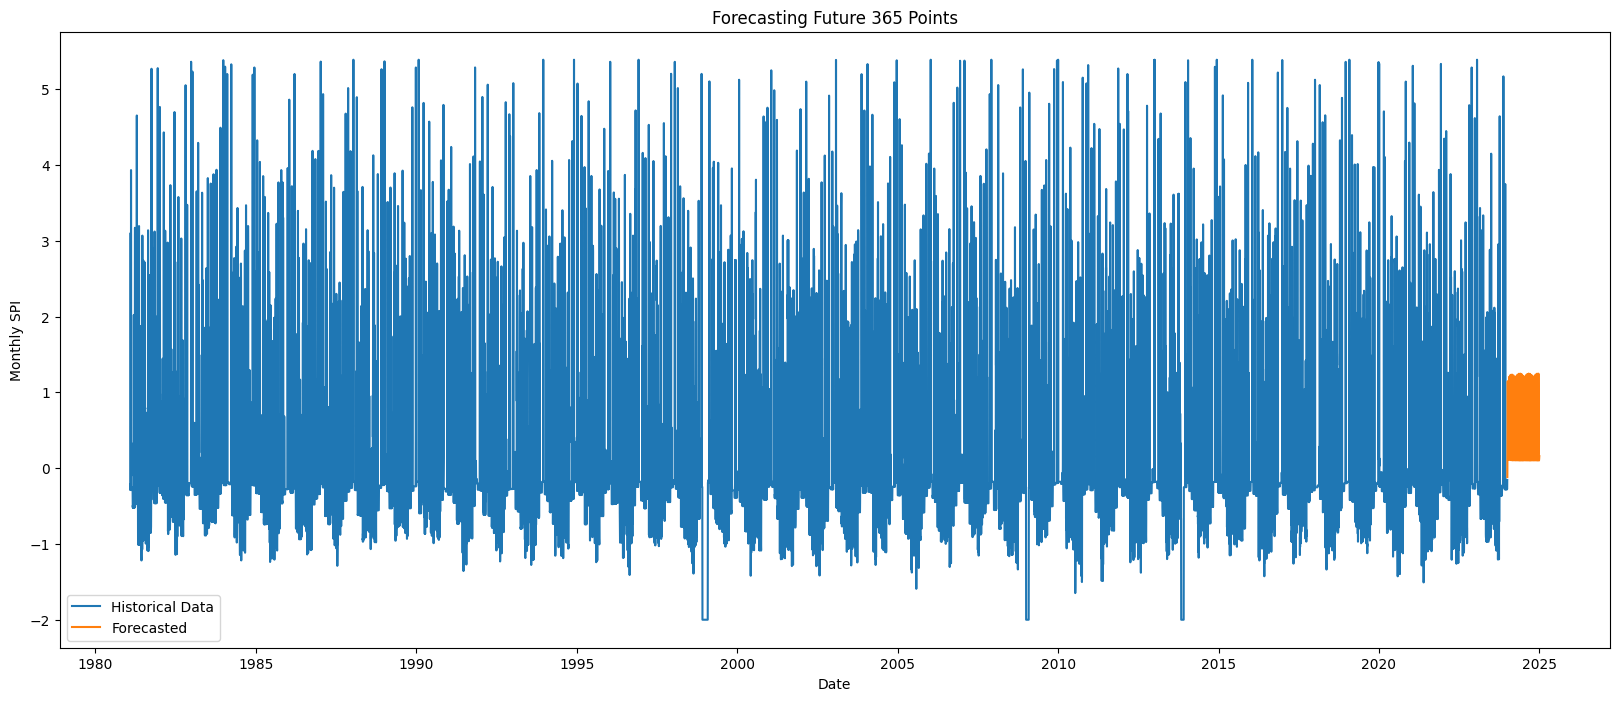

In [ ]:
# Forecast future 30 points
future_index = pd.date_range(start=df2.index[-1], periods=366, freq='D')[1:]  # Generate future dates

# Initialize a DataFrame for the future predictions
future_df = pd.DataFrame(index=future_index)

# Add lagged features for the future predictions
for i in range(1, lag + 1):
    future_df[f'lag_{i}'] = np.nan

# Use the last known values from df2 to initialize the future lagged features
last_known_values = df2.iloc[-lag:].to_dict(orient='list')

# Initialize the first set of lagged features for future_df
for i in range(1, lag + 1):
    future_df.iloc[0, i-1] = last_known_values['Monthly SPI'][-i]

# Forecast future points using lagged features
future_predictions = []
for i in range(len(future_index)):
    if i > 0:
        # Shift the lagged features forward
        for j in range(1, lag):
            future_df.iloc[i, j-1] = future_df.iloc[i-1, j]
        future_df.iloc[i, lag-1] = next_prediction

    # Prepare the input for prediction
    X_future = future_df.iloc[i].values.reshape(1, -1, 1)

    # Predict the next value
    next_prediction = model.predict(X_future)[0][0]
    future_predictions.append(next_prediction)

# Convert future predictions to a DataFrame
predictions = pd.DataFrame({
    'Date': future_index,
    'Monthly SPI': future_predictions
})
predictions.set_index('Date', inplace=True)

# Plot the forecasted values
plt.figure(figsize=(20, 8))
plt.plot(df2.index, df2['Monthly SPI'], label='Historical Data')
plt.plot(predictions.index, predictions['Monthly SPI'], label='Forecasted')
plt.title('Forecasting Future 365 Points')
plt.xlabel('Date')
plt.ylabel('Monthly SPI')
plt.legend()
plt.show()

In [ ]:

def categorize_spi(spi):
    if spi >= 2:
        return "Extremely wet"
    elif 1.5 <= spi < 2:
        return "Severely wet"
    elif 1 <= spi < 1.5:
        return "Moderately wet"
    elif 0 <= spi < 1:
        return "Mild wet"
    elif -1 <= spi < 0:
        return "Mild drought"
    elif -1.49 <= spi < -1:
        return "Moderately drought"
    elif -1.99 <= spi < -1.5:
        return "Severely drought"
    else:
        return "Extremely drought"

predictions['Category'] = predictions['Monthly SPI'].apply(categorize_spi)
print(predictions['Category'].value_counts())


Category
Mild wet          312
Moderately wet     52
Mild drought        1
Name: count, dtype: int64


In [ ]:
predictions

Monthly SPI        Category
Date                                   
2024-01-01    -0.118304    Mild drought
2024-01-02     0.111964        Mild wet
2024-01-03     0.444135        Mild wet
2024-01-04     0.814833        Mild wet
2024-01-05     1.085241  Moderately wet
...                 ...             ...
2024-12-26     0.100716        Mild wet
2024-12-27     0.106441        Mild wet
2024-12-28     0.118660        Mild wet
2024-12-29     0.135240        Mild wet
2024-12-30     0.157599        Mild wet

[365 rows x 2 columns]

In [ ]:
#ARIMA + RANDOM FOREST REGRESSOR

Test MSE: 0.9222846186558334
Test RMSE: 0.960356506020464


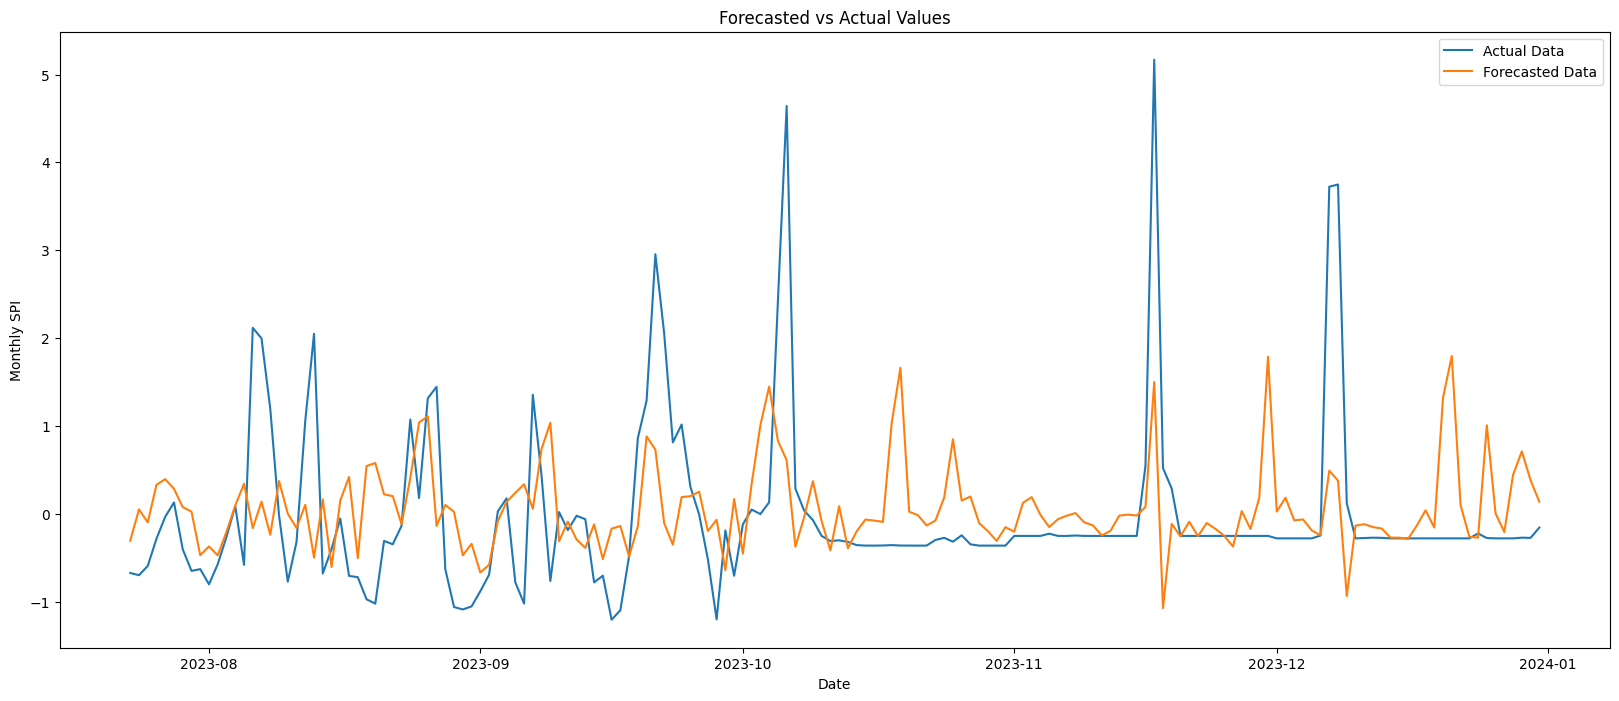

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

# Fit ARIMA model
arima_model = ARIMA(df2['Monthly SPI'], order=(2, 0, 1))
arima_results = arima_model.fit()

# Get residuals
residuals = arima_results.resid

# Prepare data for Random Forest
def create_dataset(data, lag=1):
    X, y = [], []
    for i in range(len(data) - lag):
        X.append(data[i:i+lag])
        y.append(data[i+lag])
    return np.array(X), np.array(y)

lag = 12  # Adjust as needed
X, y = create_dataset(residuals.values, lag)

# Split data into train and test sets
X_train, X_test = X[:15500], X[15500:]
y_train, y_test = y[:15500], y[15500:]

# Define and train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Reshape train_predictions to match the shape of arima_results.fittedvalues[:15500]
train_predictions = train_predictions[:15500]

# Ensure test_predictions and arima_results.fittedvalues[15500:] have the same length
min_length = min(len(test_predictions), len(arima_results.fittedvalues[15500:]))
test_predictions = test_predictions[:min_length]
arima_test_values = arima_results.fittedvalues[15500:15500+min_length]

# Invert predictions (convert back to original scale)
train_predictions = train_predictions + arima_results.fittedvalues[:15500]
test_predictions = test_predictions + arima_test_values

# Evaluate model
train_rmse = np.sqrt(mean_squared_error(df2['Monthly SPI'].iloc[lag:15500], train_predictions[:15488]))
test_rmse = np.sqrt(mean_squared_error(df2['Monthly SPI'].iloc[15500+lag:15500+lag+min_length], test_predictions))
# Calculate Mean Squared Error (MSE) for the testing dataset
test_mse = mean_squared_error(df2['Monthly SPI'].iloc[15500+lag:15500+lag+min_length], test_predictions)

# Print the RMSE and MSE
print(f"Test MSE: {test_mse}")
print(f"Test RMSE: {test_rmse}")

# Plot the forecasted values against the actual values
plt.figure(figsize=(20, 8))
plt.plot(df2.index[15500+lag:15500+lag+min_length], df2['Monthly SPI'].iloc[15500+lag:15500+lag+min_length], label='Actual Data')
plt.plot(df2.index[15500+lag:15500+lag+min_length], test_predictions, label='Forecasted Data')
plt.title('Forecasted vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Monthly SPI')
plt.legend()
plt.show()

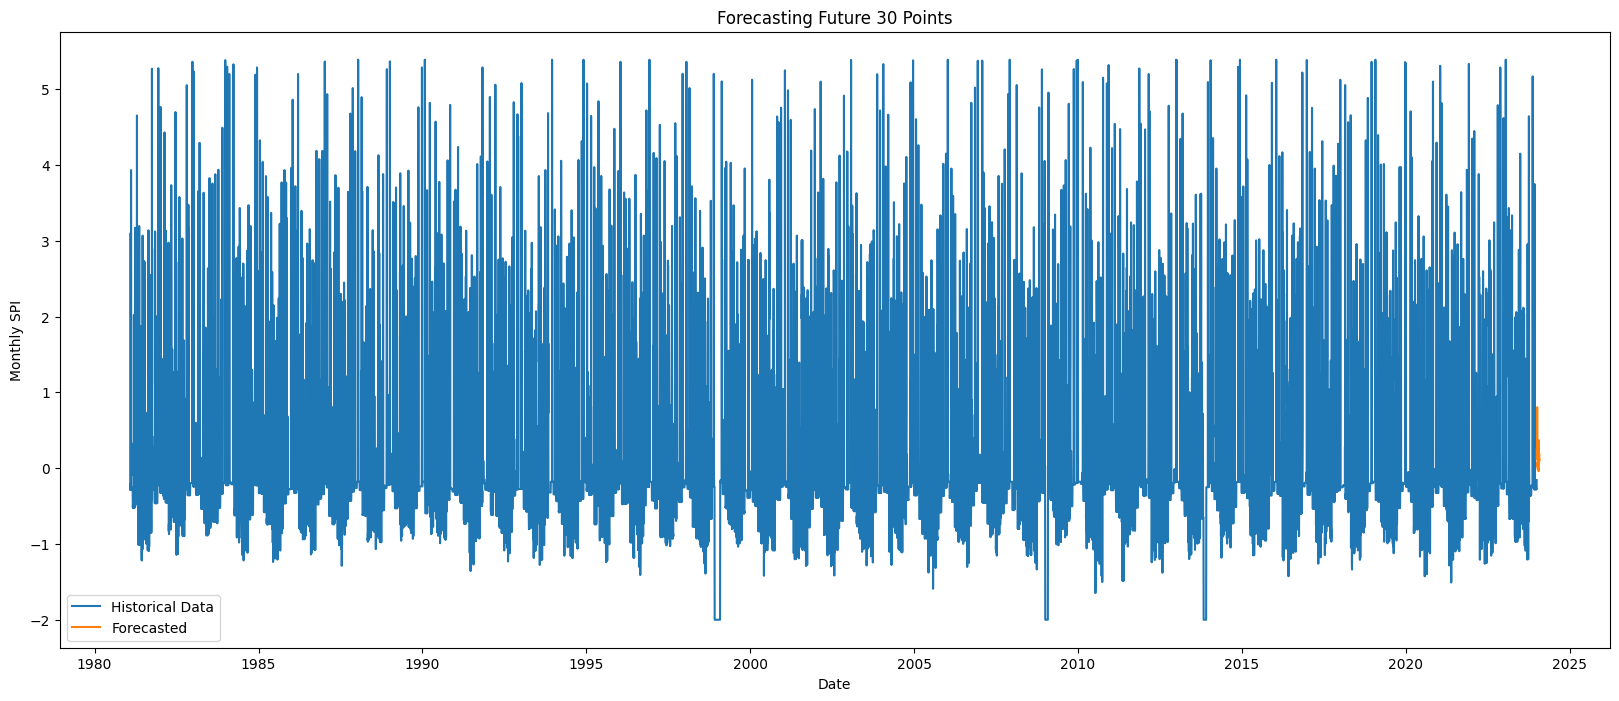

In [ ]:
# Forecast future 30 points
future_index = pd.date_range(start=df2.index[-1], periods=31, freq='D')[1:]  # Generate future dates

# Initialize a DataFrame for the future predictions
future_df = pd.DataFrame(index=future_index)

# Add lagged features for the future predictions
for i in range(1, lag + 1):
    future_df[f'lag_{i}'] = np.nan

# Use the last known values from df2 to initialize the future lagged features
last_known_values = df2.iloc[-lag:].to_dict(orient='list')

# Initialize the first set of lagged features for future_df
for i in range(1, lag + 1):
    future_df.iloc[0, i-1] = last_known_values['Monthly SPI'][-i]

# Forecast future points using lagged features
future_predictions = []
for i in range(len(future_index)):
    if i > 0:
        # Shift the lagged features forward
        for j in range(1, lag):
            future_df.iloc[i, j-1] = future_df.iloc[i-1, j]
        future_df.iloc[i, lag-1] = next_prediction

    # Prepare the input for prediction
    X_future = future_df.iloc[i].values.reshape(1, -1)

    # Predict the next value
    next_prediction = model.predict(X_future)[0]
    future_predictions.append(next_prediction)

# Convert future predictions to a DataFrame
predictions = pd.DataFrame({
    'Date': future_index,
    'Monthly SPI': future_predictions
})
predictions.set_index('Date', inplace=True)

# Plot the forecasted values
plt.figure(figsize=(20, 8))
plt.plot(df2.index, df2['Monthly SPI'], label='Historical Data')
plt.plot(predictions.index, predictions['Monthly SPI'], label='Forecasted')
plt.title('Forecasting Future 30 Points')
plt.xlabel('Date')
plt.ylabel('Monthly SPI')
plt.legend()
plt.show()


In [ ]:

def categorize_spi(spi):
    if spi >= 2:
        return "Extremely wet"
    elif 1.5 <= spi < 2:
        return "Severely wet"
    elif 1 <= spi < 1.5:
        return "Moderately wet"
    elif 0 <= spi < 1:
        return "Mild wet"
    elif -1 <= spi < 0:
        return "Mild drought"
    elif -1.49 <= spi < -1:
        return "Moderately drought"
    elif -1.99 <= spi < -1.5:
        return "Severely drought"
    else:
        return "Extremely drought"

predictions['Category'] = predictions['Monthly SPI'].apply(categorize_spi)
print(predictions['Category'].value_counts())


Category
Mild wet        26
Mild drought     4
Name: count, dtype: int64


In [ ]:
predictions

Monthly SPI      Category
Date                                 
2024-01-01     0.128845      Mild wet
2024-01-02     0.182325      Mild wet
2024-01-03     0.268806      Mild wet
2024-01-04     0.247309      Mild wet
2024-01-05     0.454935      Mild wet
2024-01-06     0.803185      Mild wet
2024-01-07     0.435210      Mild wet
2024-01-08     0.138392      Mild wet
2024-01-09     0.278922      Mild wet
2024-01-10     0.020188      Mild wet
2024-01-11     0.068748      Mild wet
2024-01-12    -0.005055  Mild drought
2024-01-13    -0.017312  Mild drought
2024-01-14    -0.002515  Mild drought
2024-01-15     0.059189      Mild wet
2024-01-16     0.172340      Mild wet
2024-01-17     0.018573      Mild wet
2024-01-18     0.222444      Mild wet
2024-01-19     0.092025      Mild wet
2024-01-20     0.266679      Mild wet
2024-01-21     0.044040      Mild wet
2024-01-22     0.300646      Mild wet
2024-01-23    -0.039918  Mild drought
2024-01-24     0.368425      Mild wet
2024-01-25     0.031977      Mild wet
2024-01-26     0.114343      Mild wet
2024-01-27     0.079830      Mild wet
2024-01-28     0.191186      Mild wet
2024-01-29     0.103244      Mild wet
2024-01-30     0.105225      Mild wet

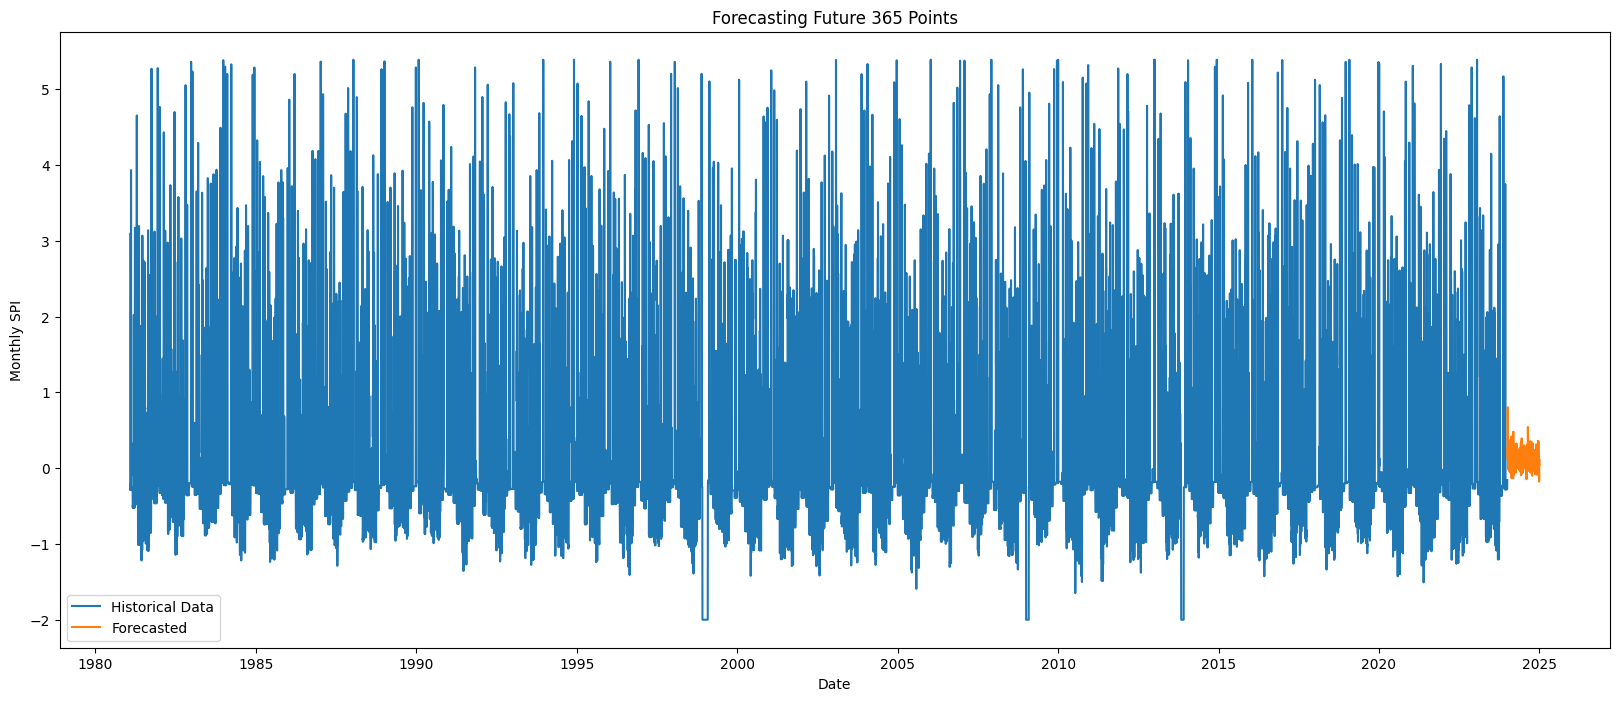

In [ ]:
# Forecast future 30 points
future_index = pd.date_range(start=df2.index[-1], periods=366, freq='D')[1:]  # Generate future dates

# Initialize a DataFrame for the future predictions
future_df = pd.DataFrame(index=future_index)

# Add lagged features for the future predictions
for i in range(1, lag + 1):
    future_df[f'lag_{i}'] = np.nan

# Use the last known values from df2 to initialize the future lagged features
last_known_values = df2.iloc[-lag:].to_dict(orient='list')

# Initialize the first set of lagged features for future_df
for i in range(1, lag + 1):
    future_df.iloc[0, i-1] = last_known_values['Monthly SPI'][-i]

# Forecast future points using lagged features
future_predictions = []
for i in range(len(future_index)):
    if i > 0:
        # Shift the lagged features forward
        for j in range(1, lag):
            future_df.iloc[i, j-1] = future_df.iloc[i-1, j]
        future_df.iloc[i, lag-1] = next_prediction

    # Prepare the input for prediction
    X_future = future_df.iloc[i].values.reshape(1, -1)

    # Predict the next value
    next_prediction = model.predict(X_future)[0]
    future_predictions.append(next_prediction)

# Convert future predictions to a DataFrame
predictions = pd.DataFrame({
    'Date': future_index,
    'Monthly SPI': future_predictions
})
predictions.set_index('Date', inplace=True)

# Plot the forecasted values
plt.figure(figsize=(20, 8))
plt.plot(df2.index, df2['Monthly SPI'], label='Historical Data')
plt.plot(predictions.index, predictions['Monthly SPI'], label='Forecasted')
plt.title('Forecasting Future 365 Points')
plt.xlabel('Date')
plt.ylabel('Monthly SPI')
plt.legend()
plt.show()


In [ ]:

def categorize_spi(spi):
    if spi >= 2:
        return "Extremely wet"
    elif 1.5 <= spi < 2:
        return "Severely wet"
    elif 1 <= spi < 1.5:
        return "Moderately wet"
    elif 0 <= spi < 1:
        return "Mild wet"
    elif -1 <= spi < 0:
        return "Mild drought"
    elif -1.49 <= spi < -1:
        return "Moderately drought"
    elif -1.99 <= spi < -1.5:
        return "Severely drought"
    else:
        return "Extremely drought"

predictions['Category'] = predictions['Monthly SPI'].apply(categorize_spi)
print(predictions['Category'].value_counts())


Category
Mild wet        318
Mild drought     47
Name: count, dtype: int64


In [ ]:
predictions

Monthly SPI      Category
Date                                 
2024-01-01     0.128845      Mild wet
2024-01-02     0.182325      Mild wet
2024-01-03     0.268806      Mild wet
2024-01-04     0.247309      Mild wet
2024-01-05     0.454935      Mild wet
...                 ...           ...
2024-12-26     0.214453      Mild wet
2024-12-27    -0.111510  Mild drought
2024-12-28    -0.177393  Mild drought
2024-12-29     0.117953      Mild wet
2024-12-30     0.043806      Mild wet

[365 rows x 2 columns]

In [ ]:
#Holt-Winters + MLP

Epoch 1/10
1550/1550 [==============================] - 3s 1ms/step - loss: 0.9988
Epoch 2/10
1550/1550 [==============================] - 2s 1ms/step - loss: 0.8373
Epoch 3/10
1550/1550 [==============================] - 2s 1ms/step - loss: 0.8189
Epoch 4/10
1550/1550 [==============================] - 2s 1ms/step - loss: 0.8117
Epoch 5/10
1550/1550 [==============================] - 3s 2ms/step - loss: 0.8072
Epoch 6/10
1550/1550 [==============================] - 3s 2ms/step - loss: 0.8055
Epoch 7/10
1550/1550 [==============================] - 2s 1ms/step - loss: 0.8033
Epoch 8/10
1550/1550 [==============================] - 2s 1ms/step - loss: 0.8020
Epoch 9/10
1550/1550 [==============================] - 2s 1ms/step - loss: 0.8008
Epoch 10/10
6/6 [==============================] - 0s 2ms/step
Test MSE: 0.6635707673436159
Test RMSE: 0.8145985313905346


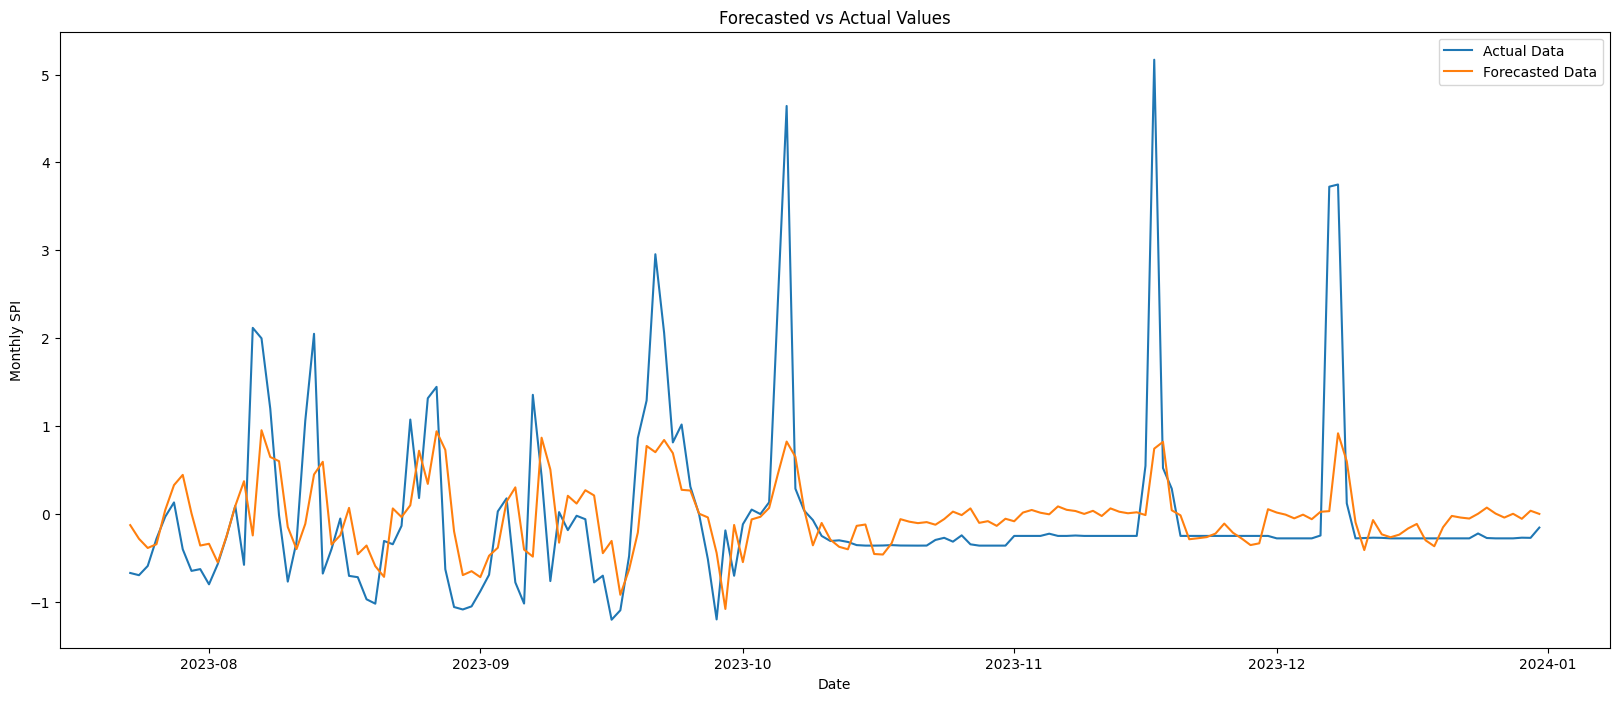

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

# Fit Holt-Winters model
hw_model = ExponentialSmoothing(df2['Monthly SPI'], seasonal='add', seasonal_periods=12)
hw_results = hw_model.fit()

# Get fitted values and residuals
fitted_values = hw_results.fittedvalues
residuals = df2['Monthly SPI'] - fitted_values

# Prepare data for neural network
def create_dataset(data, lag=1):
    X, y = [], []
    for i in range(len(data) - lag):
        X.append(data[i:i+lag])
        y.append(data[i+lag])
    return np.array(X), np.array(y)

lag = 12  # Adjust as needed
X, y = create_dataset(residuals.values, lag)

# Split data into train and test sets
train_size = 15500  # Define the training size
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define and train MLP neural network
model = Sequential()
model.add(Dense(12, input_dim=lag, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=10, batch_size=10, verbose=1)

# Make predictions
train_predictions = model.predict(X_train).flatten()
test_predictions = model.predict(X_test).flatten()

# Add predictions to Holt-Winters fitted values to get final predictions
train_predictions = train_predictions + fitted_values[lag:train_size + lag]
test_predictions = test_predictions + fitted_values[train_size + lag:train_size + lag + len(test_predictions)]

# Evaluate model
train_rmse = np.sqrt(mean_squared_error(df2['Monthly SPI'].iloc[lag:train_size + lag], train_predictions))
test_rmse = np.sqrt(mean_squared_error(df2['Monthly SPI'].iloc[train_size + lag:train_size + lag + len(test_predictions)], test_predictions))
test_mse = mean_squared_error(df2['Monthly SPI'].iloc[train_size + lag:train_size + lag + len(test_predictions)], test_predictions)

# Print the RMSE and MSE
print(f"Test MSE: {test_mse}")
print(f"Test RMSE: {test_rmse}")

# Plot the forecasted values against the actual values
plt.figure(figsize=(20, 8))
plt.plot(df2.index[train_size + lag:train_size + lag + len(test_predictions)], df2['Monthly SPI'].iloc[train_size + lag:train_size + lag + len(test_predictions)], label='Actual Data')
plt.plot(df2.index[train_size + lag:train_size + lag + len(test_predictions)], test_predictions, label='Forecasted Data')
plt.title('Forecasted vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Monthly SPI')
plt.legend()
plt.show()

1/1 [==============================] - 0s 25ms/step


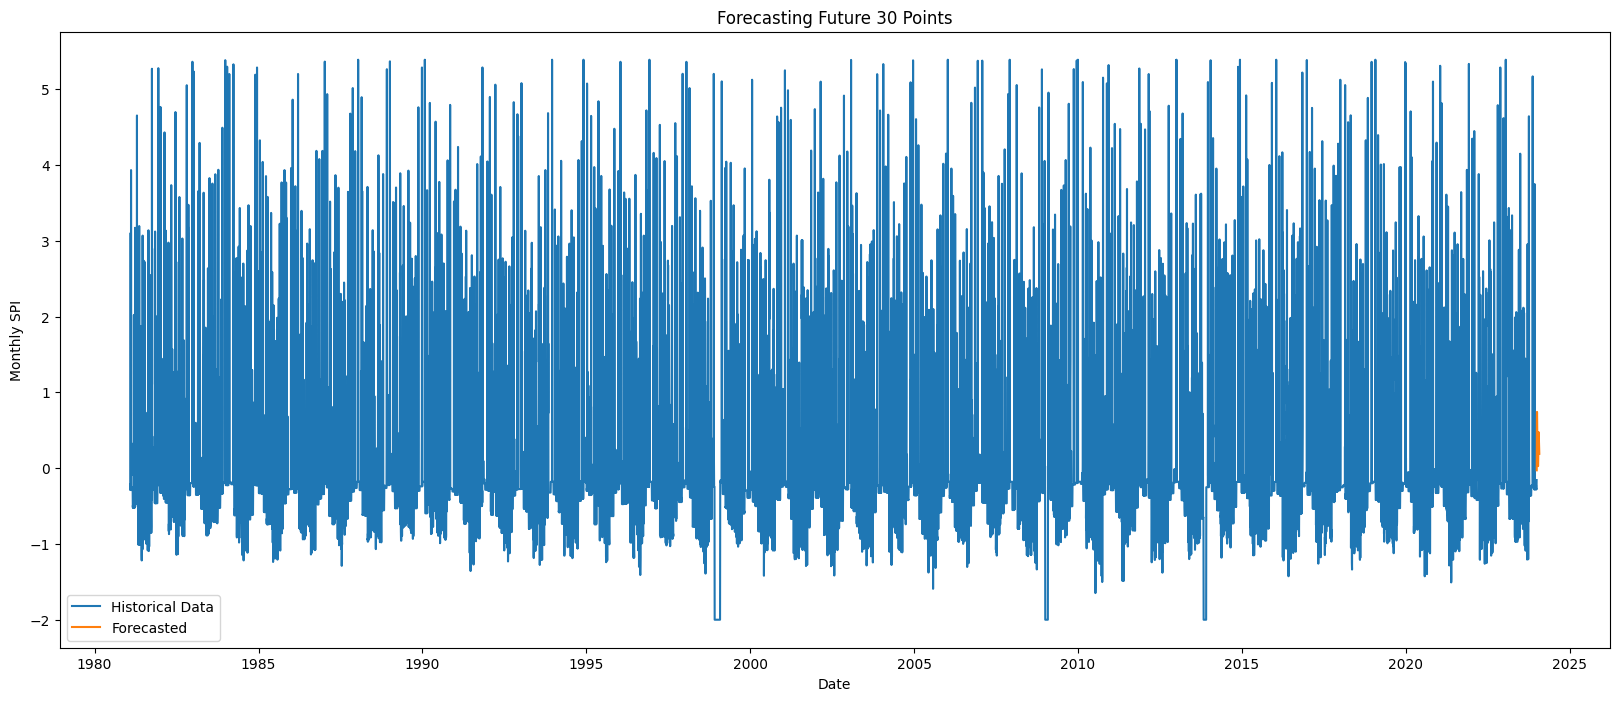

In [ ]:
# Forecast future 30 points
future_index = pd.date_range(start=df2.index[-1], periods=31, freq='D')[1:]  # Generate future dates

# Initialize a DataFrame for the future predictions
future_df = pd.DataFrame(index=future_index)

# Add lagged features for the future predictions
for i in range(1, lag + 1):
    future_df[f'lag_{i}'] = np.nan

# Use the last known values from df2 to initialize the future lagged features
last_known_values = df2.iloc[-lag:].to_dict(orient='list')

# Initialize the first set of lagged features for future_df
for i in range(1, lag + 1):
    future_df.iloc[0, i-1] = last_known_values['Monthly SPI'][-i]

# Forecast future points using lagged features
future_predictions = []
for i in range(len(future_index)):
    if i > 0:
        # Shift the lagged features forward
        for j in range(1, lag):
            future_df.iloc[i, j-1] = future_df.iloc[i-1, j]
        future_df.iloc[i, lag-1] = next_prediction

    # Prepare the input for prediction
    X_future = future_df.iloc[i].values.reshape(1, -1)

    # Predict the next value
    next_prediction = model.predict(X_future)[0]
    future_predictions.append(next_prediction)

# Convert future predictions to a DataFrame
predictions = pd.DataFrame({
    'Date': future_index,
    'Monthly SPI': future_predictions
})
predictions.set_index('Date', inplace=True)

# Plot the forecasted values
plt.figure(figsize=(20, 8))
plt.plot(df2.index, df2['Monthly SPI'], label='Historical Data')
plt.plot(predictions.index, predictions['Monthly SPI'], label='Forecasted')
plt.title('Forecasting Future 30 Points')
plt.xlabel('Date')
plt.ylabel('Monthly SPI')
plt.legend()
plt.show()

In [ ]:

def categorize_spi(spi):
    if spi >= 2:
        return "Extremely wet"
    elif 1.5 <= spi < 2:
        return "Severely wet"
    elif 1 <= spi < 1.5:
        return "Moderately wet"
    elif 0 <= spi < 1:
        return "Mild wet"
    elif -1 <= spi < 0:
        return "Mild drought"
    elif -1.49 <= spi < -1:
        return "Moderately drought"
    elif -1.99 <= spi < -1.5:
        return "Severely drought"
    else:
        return "Extremely drought"

predictions['Category'] = predictions['Monthly SPI'].apply(categorize_spi)
print(predictions['Category'].value_counts())


Category
Mild wet        29
Mild drought     1
Name: count, dtype: int64


In [ ]:
predictions

Monthly SPI      Category
Date                                    
2024-01-01  [-0.028897852]  Mild drought
2024-01-02    [0.27195728]      Mild wet
2024-01-03    [0.62198853]      Mild wet
2024-01-04     [0.7417444]      Mild wet
2024-01-05     [0.7283499]      Mild wet
2024-01-06     [0.6048429]      Mild wet
2024-01-07    [0.47507408]      Mild wet
2024-01-08     [0.3610068]      Mild wet
2024-01-09    [0.27560034]      Mild wet
2024-01-10     [0.2644807]      Mild wet
2024-01-11     [0.2536948]      Mild wet
2024-01-12    [0.24890801]      Mild wet
2024-01-13    [0.19128948]      Mild wet
2024-01-14    [0.10275614]      Mild wet
2024-01-15   [0.037885875]      Mild wet
2024-01-16   [0.026338667]      Mild wet
2024-01-17   [0.061649263]      Mild wet
2024-01-18    [0.13068822]      Mild wet
2024-01-19    [0.21235746]      Mild wet
2024-01-20    [0.30447984]      Mild wet
2024-01-21    [0.39113063]      Mild wet
2024-01-22    [0.44929352]      Mild wet
2024-01-23    [0.47360128]      Mild wet
2024-01-24    [0.45408466]      Mild wet
2024-01-25    [0.40498453]      Mild wet
2024-01-26    [0.35133052]      Mild wet
2024-01-27    [0.30996734]      Mild wet
2024-01-28    [0.26897758]      Mild wet
2024-01-29    [0.22814149]      Mild wet
2024-01-30    [0.18931589]      Mild wet

1/1 [==============================] - 0s 25ms/step


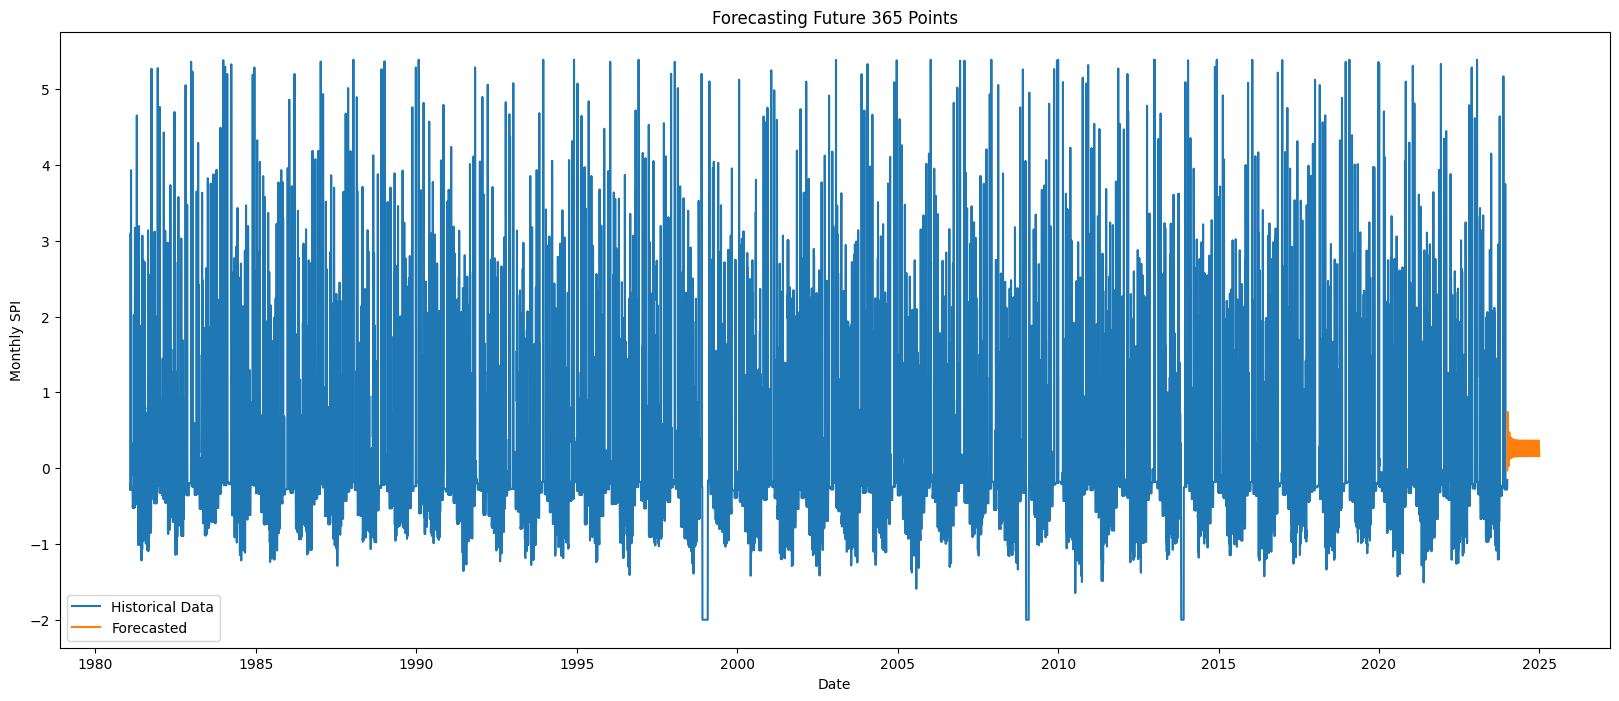

In [ ]:
# Forecast future 30 points
future_index = pd.date_range(start=df2.index[-1], periods=366, freq='D')[1:]  # Generate future dates

# Initialize a DataFrame for the future predictions
future_df = pd.DataFrame(index=future_index)

# Add lagged features for the future predictions
for i in range(1, lag + 1):
    future_df[f'lag_{i}'] = np.nan

# Use the last known values from df2 to initialize the future lagged features
last_known_values = df2.iloc[-lag:].to_dict(orient='list')

# Initialize the first set of lagged features for future_df
for i in range(1, lag + 1):
    future_df.iloc[0, i-1] = last_known_values['Monthly SPI'][-i]

# Forecast future points using lagged features
future_predictions = []
for i in range(len(future_index)):
    if i > 0:
        # Shift the lagged features forward
        for j in range(1, lag):
            future_df.iloc[i, j-1] = future_df.iloc[i-1, j]
        future_df.iloc[i, lag-1] = next_prediction

    # Prepare the input for prediction
    X_future = future_df.iloc[i].values.reshape(1, -1)

    # Predict the next value
    next_prediction = model.predict(X_future)[0]
    future_predictions.append(next_prediction)

# Convert future predictions to a DataFrame
predictions = pd.DataFrame({
    'Date': future_index,
    'Monthly SPI': future_predictions
})
predictions.set_index('Date', inplace=True)

# Plot the forecasted values
plt.figure(figsize=(20, 8))
plt.plot(df2.index, df2['Monthly SPI'], label='Historical Data')
plt.plot(predictions.index, predictions['Monthly SPI'], label='Forecasted')
plt.title('Forecasting Future 365 Points')
plt.xlabel('Date')
plt.ylabel('Monthly SPI')
plt.legend()
plt.show()

In [ ]:

def categorize_spi(spi):
    if spi >= 2:
        return "Extremely wet"
    elif 1.5 <= spi < 2:
        return "Severely wet"
    elif 1 <= spi < 1.5:
        return "Moderately wet"
    elif 0 <= spi < 1:
        return "Mild wet"
    elif -1 <= spi < 0:
        return "Mild drought"
    elif -1.49 <= spi < -1:
        return "Moderately drought"
    elif -1.99 <= spi < -1.5:
        return "Severely drought"
    else:
        return "Extremely drought"

predictions['Category'] = predictions['Monthly SPI'].apply(categorize_spi)
print(predictions['Category'].value_counts())


Category
Mild wet        364
Mild drought      1
Name: count, dtype: int64


In [ ]:
predictions

Monthly SPI      Category
Date                                    
2024-01-01  [-0.028897852]  Mild drought
2024-01-02    [0.27195728]      Mild wet
2024-01-03    [0.62198853]      Mild wet
2024-01-04     [0.7417444]      Mild wet
2024-01-05     [0.7283499]      Mild wet
...                    ...           ...
2024-12-26    [0.28466642]      Mild wet
2024-12-27    [0.24586767]      Mild wet
2024-12-28     [0.2065036]      Mild wet
2024-12-29     [0.1766547]      Mild wet
2024-12-30    [0.16005497]      Mild wet

[365 rows x 2 columns]

In [ ]:
#Holt-winter + LSTM

Epoch 1/10
1550/1550 [==============================] - 7s 4ms/step - loss: 0.8427
Epoch 2/10
1550/1550 [==============================] - 7s 5ms/step - loss: 0.8118
Epoch 3/10
1550/1550 [==============================] - 6s 4ms/step - loss: 0.8036
Epoch 4/10
1550/1550 [==============================] - 6s 4ms/step - loss: 0.7999
Epoch 5/10
1550/1550 [==============================] - 7s 5ms/step - loss: 0.7959
Epoch 6/10
1550/1550 [==============================] - 6s 4ms/step - loss: 0.7900
Epoch 7/10
1550/1550 [==============================] - 7s 5ms/step - loss: 0.7867
Epoch 8/10
1550/1550 [==============================] - 6s 4ms/step - loss: 0.7849
Epoch 9/10
1550/1550 [==============================] - 8s 5ms/step - loss: 0.7824
Epoch 10/10
6/6 [==============================] - 0s 3ms/step
Test MSE: 0.6241767640797445
Test RMSE: 0.7900485833667095


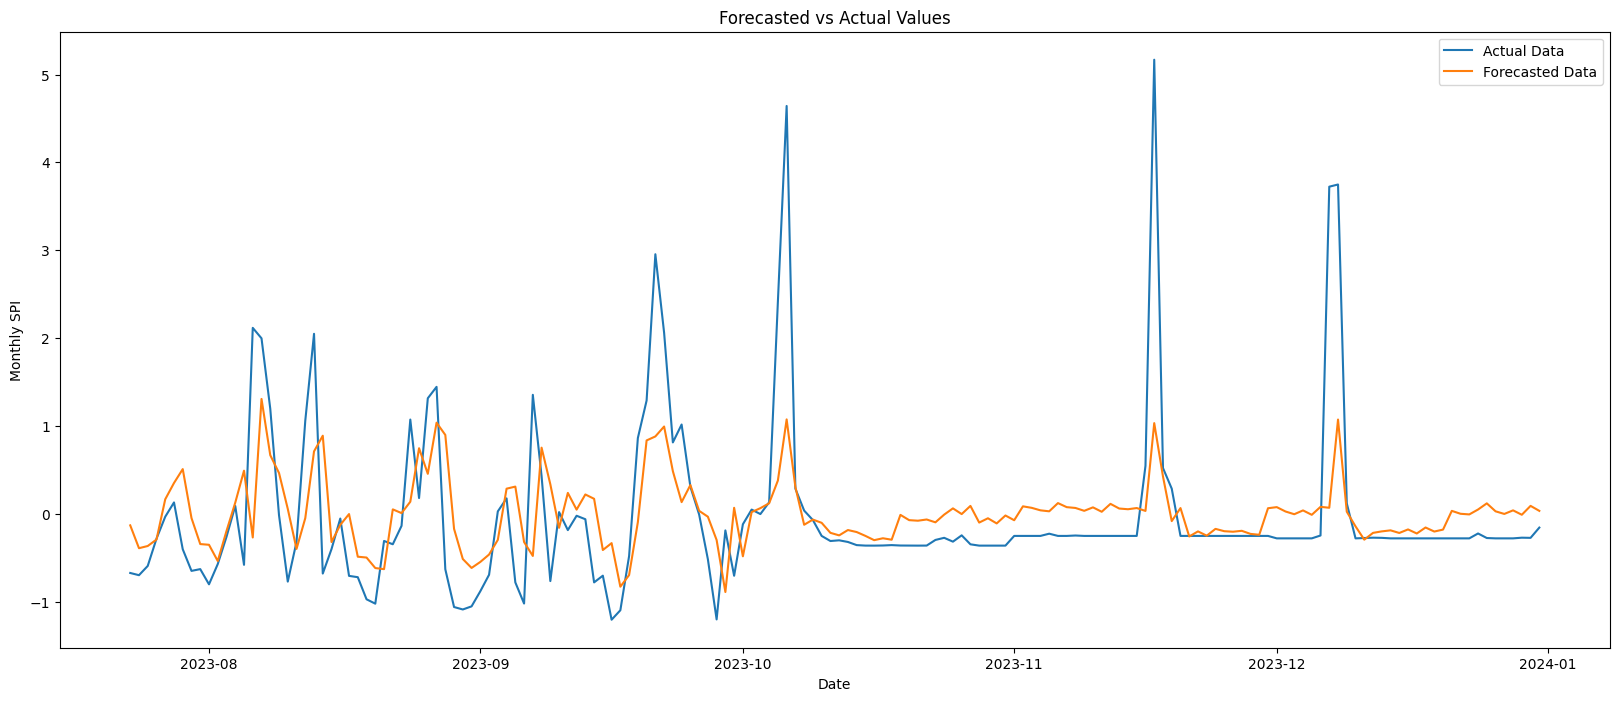

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

# Fit Holt-Winters model
hw_model = ExponentialSmoothing(df2['Monthly SPI'], seasonal='add', seasonal_periods=12)
hw_results = hw_model.fit()

# Get fitted values and residuals
fitted_values = hw_results.fittedvalues
residuals = df2['Monthly SPI'] - fitted_values

# Prepare data for LSTM
def create_dataset(data, lag=1):
    X, y = [], []
    for i in range(len(data) - lag):
        X.append(data[i:i+lag])
        y.append(data[i+lag])
    return np.array(X), np.array(y)

lag = 12  # Adjust as needed
X, y = create_dataset(residuals.values, lag)

# Reshape input to be [samples, time steps, features] for LSTM
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split data into train and test sets
train_size = 15500  # Define the training size
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define and train LSTM neural network
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(lag, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=10, verbose=1)

# Make predictions
train_predictions = model.predict(X_train).flatten()
test_predictions = model.predict(X_test).flatten()

# Add predictions to Holt-Winters fitted values to get final predictions
train_predictions = train_predictions + fitted_values[lag:train_size + lag]
test_predictions = test_predictions + fitted_values[train_size + lag:train_size + lag + len(test_predictions)]

# Evaluate model
train_rmse = np.sqrt(mean_squared_error(df2['Monthly SPI'].iloc[lag:train_size + lag], train_predictions))
test_rmse = np.sqrt(mean_squared_error(df2['Monthly SPI'].iloc[train_size + lag:train_size + lag + len(test_predictions)], test_predictions))
test_mse = mean_squared_error(df2['Monthly SPI'].iloc[train_size + lag:train_size + lag + len(test_predictions)], test_predictions)

# Print the RMSE and MSE
print(f"Test MSE: {test_mse}")
print(f"Test RMSE: {test_rmse}")

# Plot the forecasted values against the actual values
plt.figure(figsize=(20, 8))
plt.plot(df2.index[train_size + lag:train_size + lag + len(test_predictions)], df2['Monthly SPI'].iloc[train_size + lag:train_size + lag + len(test_predictions)], label='Actual Data')
plt.plot(df2.index[train_size + lag:train_size + lag + len(test_predictions)], test_predictions, label='Forecasted Data')
plt.title('Forecasted vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Monthly SPI')
plt.legend()
plt.show()

1/1 [==============================] - 0s 19ms/step


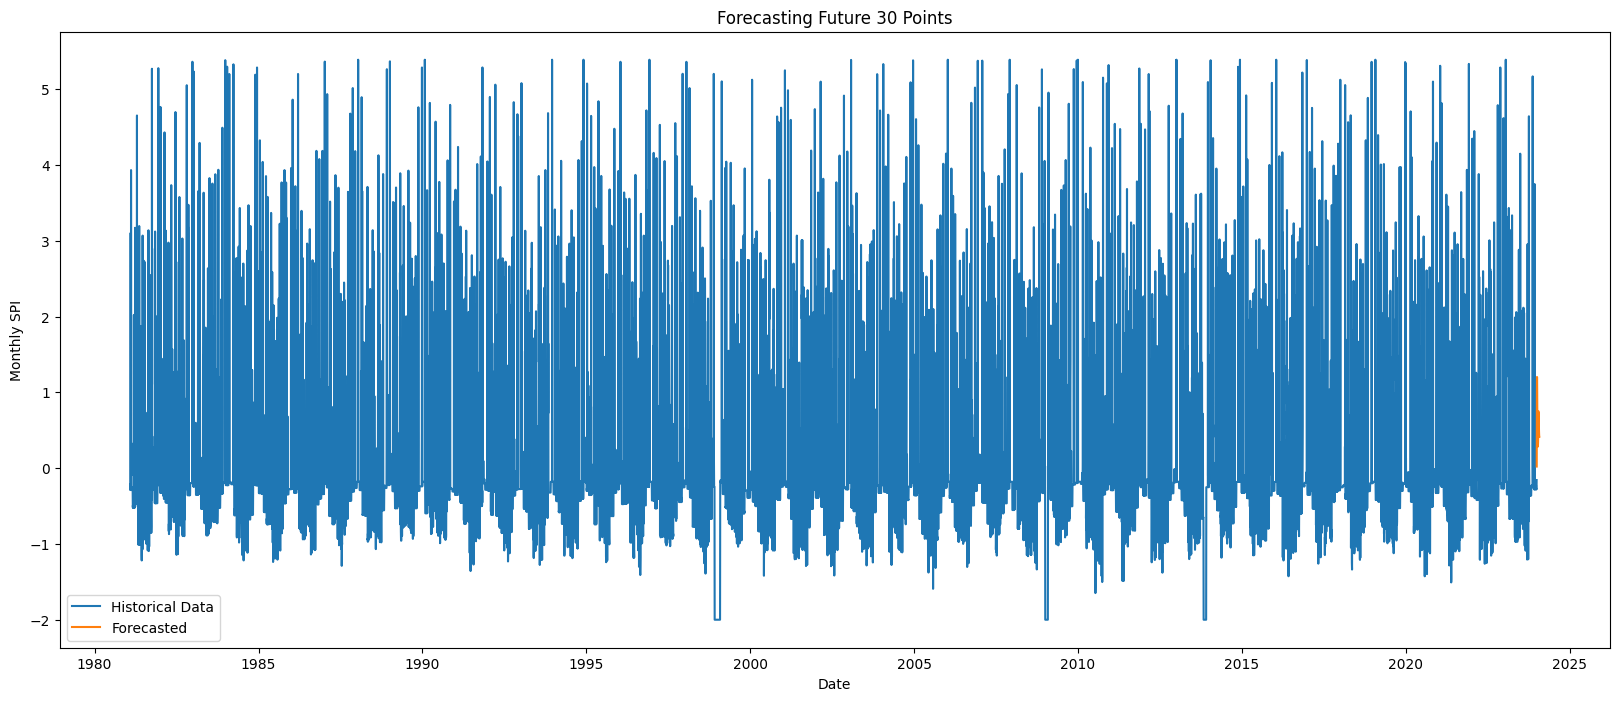

In [ ]:
# Forecast future 30 points
future_index = pd.date_range(start=df2.index[-1], periods=31, freq='D')[1:]  # Generate future dates

# Initialize a DataFrame for the future predictions
future_df = pd.DataFrame(index=future_index)

# Add lagged features for the future predictions
for i in range(1, lag + 1):
    future_df[f'lag_{i}'] = np.nan

# Use the last known values from df2 to initialize the future lagged features
last_known_values = df2.iloc[-lag:].to_dict(orient='list')

# Initialize the first set of lagged features for future_df
for i in range(1, lag + 1):
    future_df.iloc[0, i-1] = last_known_values['Monthly SPI'][-i]

# Forecast future points using lagged features
future_predictions = []
for i in range(len(future_index)):
    if i > 0:
        # Shift the lagged features forward
        for j in range(1, lag):
            future_df.iloc[i, j-1] = future_df.iloc[i-1, j]
        future_df.iloc[i, lag-1] = next_prediction

    # Prepare the input for prediction
    X_future = future_df.iloc[i].values.reshape(1, lag, 1)

    # Predict the next value
    next_prediction = model.predict(X_future)[0][0]
    future_predictions.append(next_prediction)

# Convert future predictions to a DataFrame
predictions = pd.DataFrame({
    'Date': future_index,
    'Monthly SPI': future_predictions
})
predictions.set_index('Date', inplace=True)

# Plot the forecasted values
plt.figure(figsize=(20, 8))
plt.plot(df2.index, df2['Monthly SPI'], label='Historical Data')
plt.plot(predictions.index, predictions['Monthly SPI'], label='Forecasted')
plt.title('Forecasting Future 30 Points')
plt.xlabel('Date')
plt.ylabel('Monthly SPI')
plt.legend()
plt.show()

In [ ]:

def categorize_spi(spi):
    if spi >= 2:
        return "Extremely wet"
    elif 1.5 <= spi < 2:
        return "Severely wet"
    elif 1 <= spi < 1.5:
        return "Moderately wet"
    elif 0 <= spi < 1:
        return "Mild wet"
    elif -1 <= spi < 0:
        return "Mild drought"
    elif -1.49 <= spi < -1:
        return "Moderately drought"
    elif -1.99 <= spi < -1.5:
        return "Severely drought"
    else:
        return "Extremely drought"

predictions['Category'] = predictions['Monthly SPI'].apply(categorize_spi)
print(predictions['Category'].value_counts())


Category
Mild wet          27
Moderately wet     3
Name: count, dtype: int64


In [ ]:
predictions

Monthly SPI        Category
Date                                   
2024-01-01     0.020958        Mild wet
2024-01-02     0.493561        Mild wet
2024-01-03     0.955959        Mild wet
2024-01-04     1.202333  Moderately wet
2024-01-05     1.198228  Moderately wet
2024-01-06     1.037700  Moderately wet
2024-01-07     0.827617        Mild wet
2024-01-08     0.634624        Mild wet
2024-01-09     0.483701        Mild wet
2024-01-10     0.378356        Mild wet
2024-01-11     0.313440        Mild wet
2024-01-12     0.283363        Mild wet
2024-01-13     0.283500        Mild wet
2024-01-14     0.299153        Mild wet
2024-01-15     0.313686        Mild wet
2024-01-16     0.342616        Mild wet
2024-01-17     0.401428        Mild wet
2024-01-18     0.493757        Mild wet
2024-01-19     0.602790        Mild wet
2024-01-20     0.696853        Mild wet
2024-01-21     0.747762        Mild wet
2024-01-22     0.748622        Mild wet
2024-01-23     0.708712        Mild wet
2024-01-24     0.644535        Mild wet
2024-01-25     0.574445        Mild wet
2024-01-26     0.512134        Mild wet
2024-01-27     0.464536        Mild wet
2024-01-28     0.433509        Mild wet
2024-01-29     0.417668        Mild wet
2024-01-30     0.414197        Mild wet

1/1 [==============================] - 0s 30ms/step


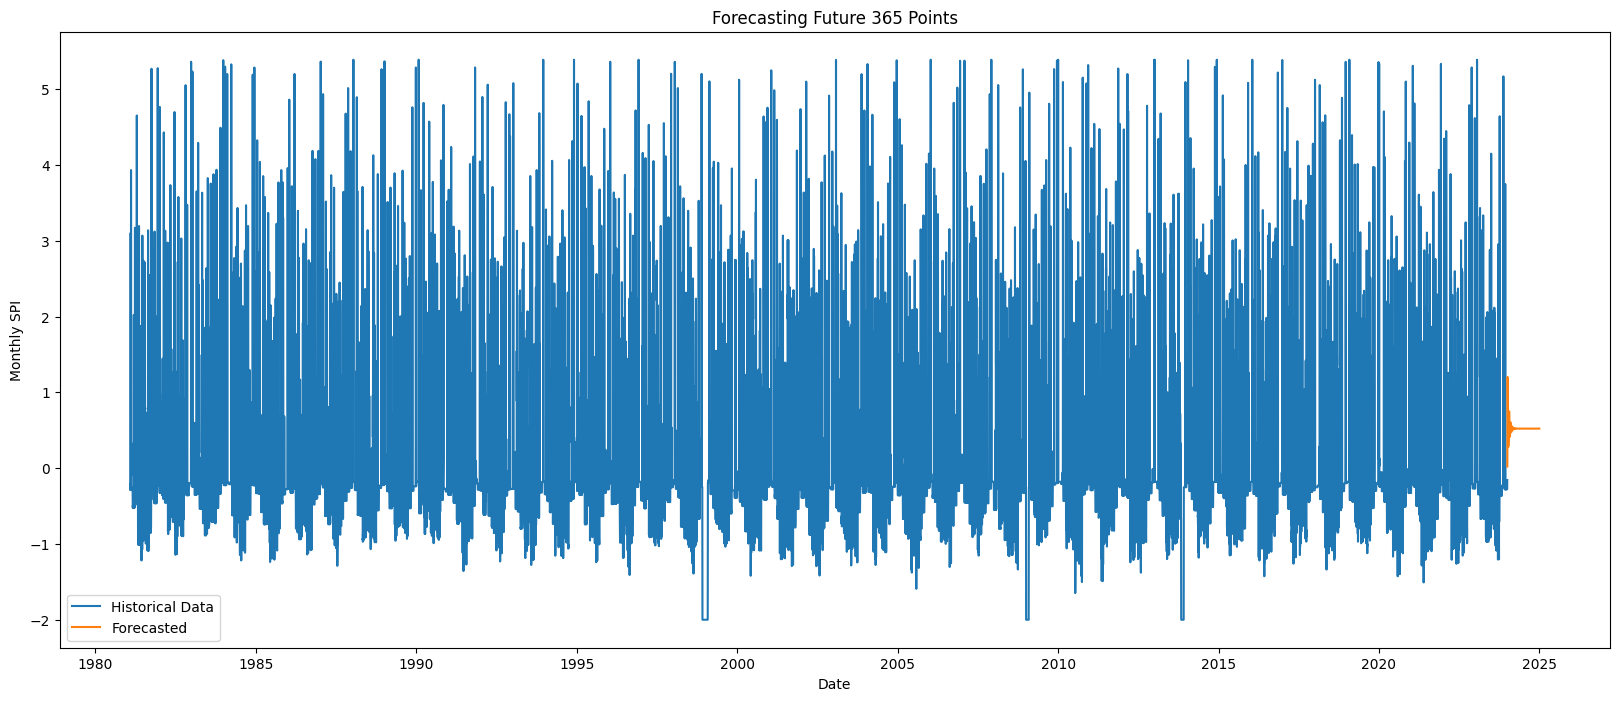

In [ ]:
# Forecast future 30 points
future_index = pd.date_range(start=df2.index[-1], periods=366, freq='D')[1:]  # Generate future dates

# Initialize a DataFrame for the future predictions
future_df = pd.DataFrame(index=future_index)

# Add lagged features for the future predictions
for i in range(1, lag + 1):
    future_df[f'lag_{i}'] = np.nan

# Use the last known values from df2 to initialize the future lagged features
last_known_values = df2.iloc[-lag:].to_dict(orient='list')

# Initialize the first set of lagged features for future_df
for i in range(1, lag + 1):
    future_df.iloc[0, i-1] = last_known_values['Monthly SPI'][-i]

# Forecast future points using lagged features
future_predictions = []
for i in range(len(future_index)):
    if i > 0:
        # Shift the lagged features forward
        for j in range(1, lag):
            future_df.iloc[i, j-1] = future_df.iloc[i-1, j]
        future_df.iloc[i, lag-1] = next_prediction

    # Prepare the input for prediction
    X_future = future_df.iloc[i].values.reshape(1, lag, 1)

    # Predict the next value
    next_prediction = model.predict(X_future)[0][0]
    future_predictions.append(next_prediction)

# Convert future predictions to a DataFrame
predictions = pd.DataFrame({
    'Date': future_index,
    'Monthly SPI': future_predictions
})
predictions.set_index('Date', inplace=True)

# Plot the forecasted values
plt.figure(figsize=(20, 8))
plt.plot(df2.index, df2['Monthly SPI'], label='Historical Data')
plt.plot(predictions.index, predictions['Monthly SPI'], label='Forecasted')
plt.title('Forecasting Future 365 Points')
plt.xlabel('Date')
plt.ylabel('Monthly SPI')
plt.legend()
plt.show()

In [ ]:
def categorize_spi(spi):
    if spi >= 2:
        return "Extremely wet"
    elif 1.5 <= spi < 2:
        return "Severely wet"
    elif 1 <= spi < 1.5:
        return "Moderately wet"
    elif 0 <= spi < 1:
        return "Mild wet"
    elif -1 <= spi < 0:
        return "Mild drought"
    elif -1.49 <= spi < -1:
        return "Moderately drought"
    elif -1.99 <= spi < -1.5:
        return "Severely drought"
    else:
        return "Extremely drought"

predictions['Category'] = predictions['Monthly SPI'].apply(categorize_spi)
print(predictions['Category'].value_counts())

Category
Mild wet          362
Moderately wet      3
Name: count, dtype: int64


In [ ]:
predictions

Monthly SPI        Category
Date                                   
2024-01-01     0.020958        Mild wet
2024-01-02     0.493561        Mild wet
2024-01-03     0.955959        Mild wet
2024-01-04     1.202333  Moderately wet
2024-01-05     1.198228  Moderately wet
...                 ...             ...
2024-12-26     0.521183        Mild wet
2024-12-27     0.521183        Mild wet
2024-12-28     0.521183        Mild wet
2024-12-29     0.521183        Mild wet
2024-12-30     0.521183        Mild wet

[365 rows x 2 columns]

In [ ]:
#Holt-winter + Random forest regressor

Test MSE: 0.5824216033425722
Test RMSE: 0.7631655150375783


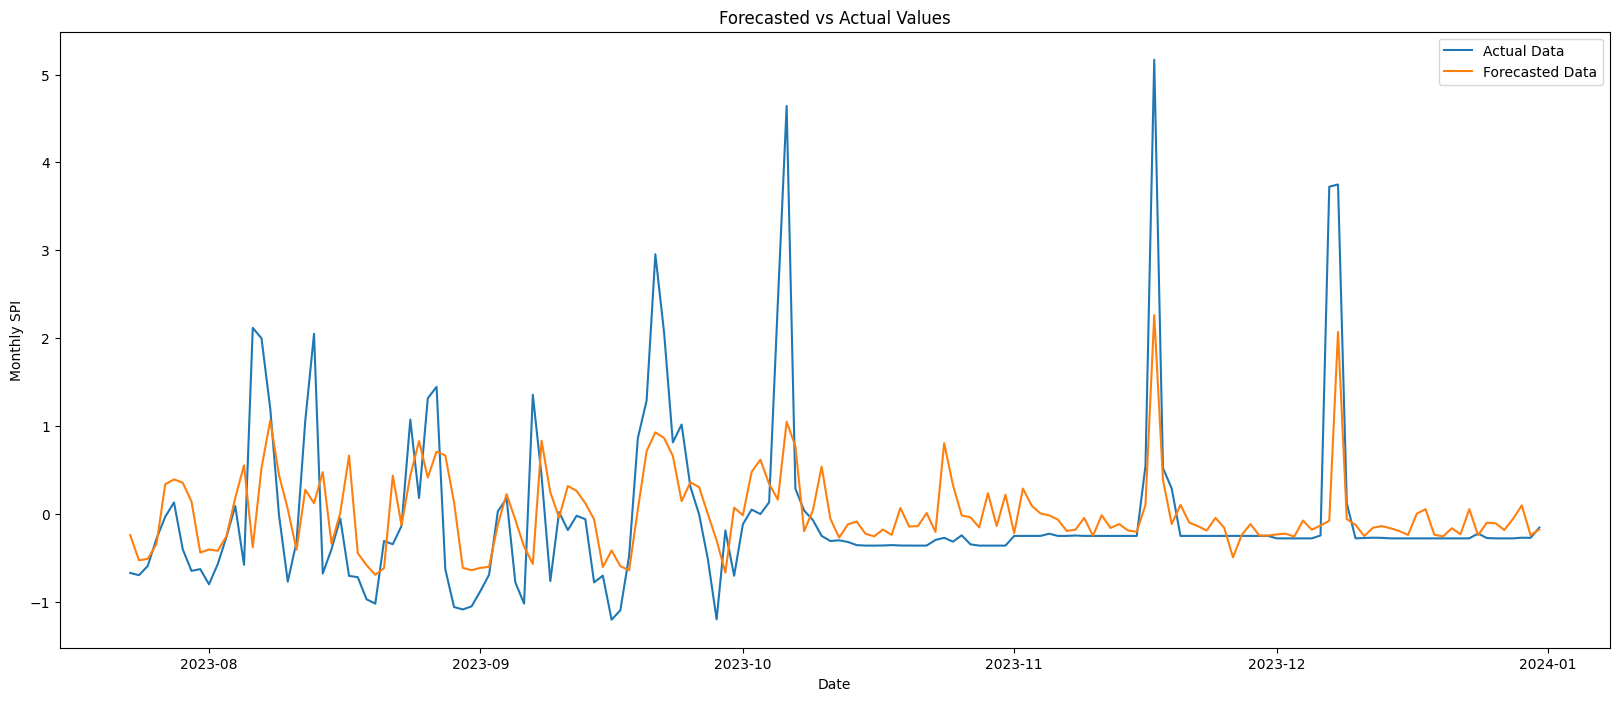

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

# Fit Holt-Winters model
hw_model = ExponentialSmoothing(df2['Monthly SPI'], seasonal='add', seasonal_periods=12)
hw_results = hw_model.fit()

# Get fitted values and residuals
fitted_values = hw_results.fittedvalues
residuals = df2['Monthly SPI'] - fitted_values

# Prepare data for Random Forest
def create_dataset(data, lag=1):
    X, y = [], []
    for i in range(len(data) - lag):
        X.append(data[i:i+lag])
        y.append(data[i+lag])
    return np.array(X), np.array(y)

lag = 12  # Adjust as needed
X, y = create_dataset(residuals.values, lag)

# Split data into train and test sets
train_size = 15500  # Define the training size
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define and train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Add predictions to Holt-Winters fitted values to get final predictions
train_predictions = train_predictions + fitted_values[lag:train_size + lag]
test_predictions = test_predictions + fitted_values[train_size + lag:train_size + lag + len(test_predictions)]

# Evaluate model
train_rmse = np.sqrt(mean_squared_error(df2['Monthly SPI'].iloc[lag:train_size + lag], train_predictions))
test_rmse = np.sqrt(mean_squared_error(df2['Monthly SPI'].iloc[train_size + lag:train_size + lag + len(test_predictions)], test_predictions))
test_mse = mean_squared_error(df2['Monthly SPI'].iloc[train_size + lag:train_size + lag + len(test_predictions)], test_predictions)

# Print the RMSE and MSE
print(f"Test MSE: {test_mse}")
print(f"Test RMSE: {test_rmse}")

# Plot the forecasted values against the actual values
plt.figure(figsize=(20, 8))
plt.plot(df2.index[train_size + lag:train_size + lag + len(test_predictions)], df2['Monthly SPI'].iloc[train_size + lag:train_size + lag + len(test_predictions)], label='Actual Data')
plt.plot(df2.index[train_size + lag:train_size + lag + len(test_predictions)], test_predictions, label='Forecasted Data')
plt.title('Forecasted vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Monthly SPI')
plt.legend()
plt.show()

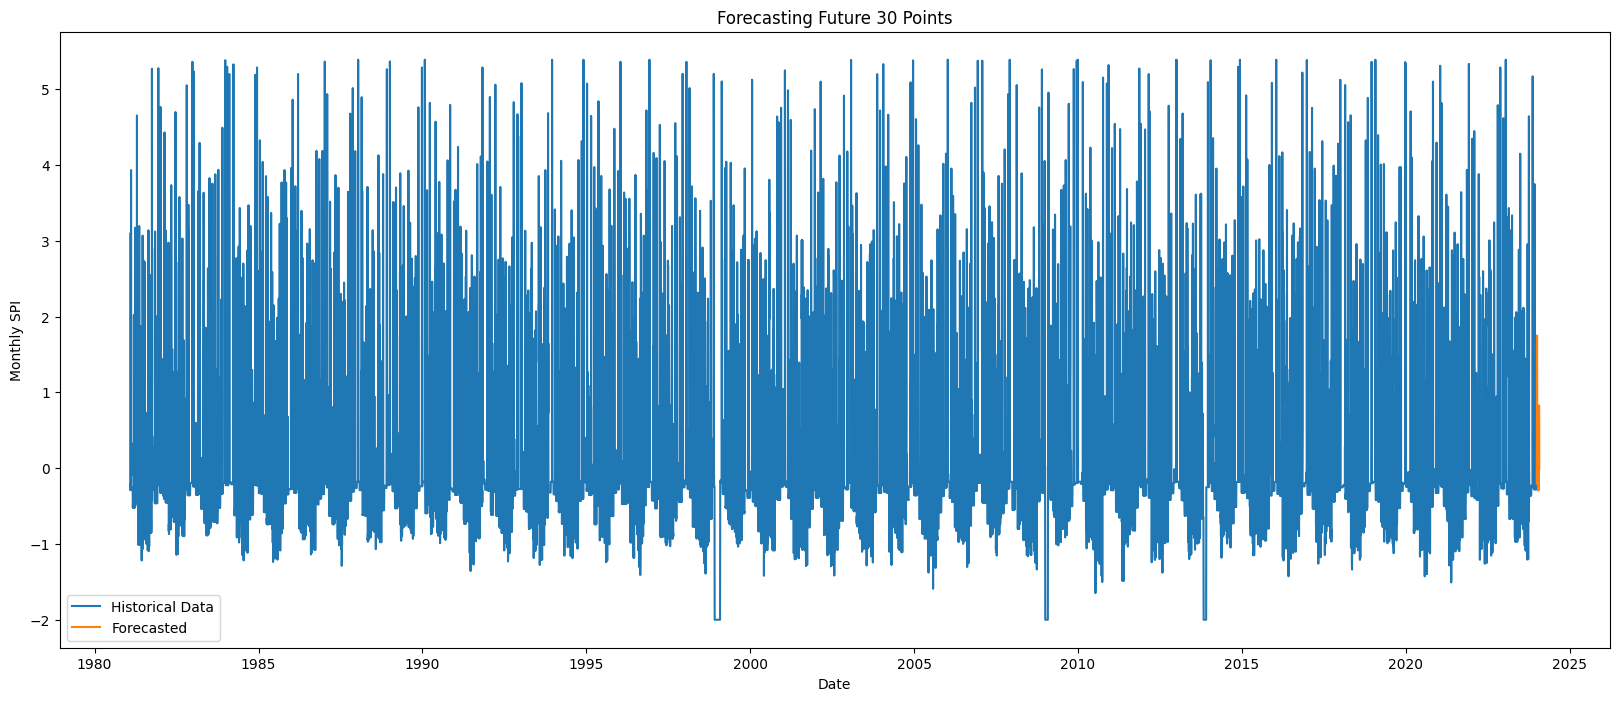

In [ ]:
# Forecast future 30 points
future_index = pd.date_range(start=df2.index[-1], periods=31, freq='D')[1:]  # Generate future dates

# Initialize a DataFrame for the future predictions
future_df = pd.DataFrame(index=future_index)

# Add lagged features for the future predictions
for i in range(1, lag + 1):
    future_df[f'lag_{i}'] = np.nan

# Use the last known values from df2 to initialize the future lagged features
last_known_values = df2.iloc[-lag:].to_dict(orient='list')

# Initialize the first set of lagged features for future_df
for i in range(1, lag + 1):
    future_df.iloc[0, i-1] = last_known_values['Monthly SPI'][-i]

# Forecast future points using lagged features
future_predictions = []
for i in range(len(future_index)):
    if i > 0:
        # Shift the lagged features forward
        for j in range(1, lag):
            future_df.iloc[i, j-1] = future_df.iloc[i-1, j]
        future_df.iloc[i, lag-1] = next_prediction

    # Prepare the input for prediction
    X_future = future_df.iloc[i].values.reshape(1, -1)

    # Predict the next value
    next_prediction = model.predict(X_future)[0]
    future_predictions.append(next_prediction)

# Convert future predictions to a DataFrame
predictions = pd.DataFrame({
    'Date': future_index,
    'Monthly SPI': future_predictions
})
predictions.set_index('Date', inplace=True)

# Plot the forecasted values
plt.figure(figsize=(20, 8))
plt.plot(df2.index, df2['Monthly SPI'], label='Historical Data')
plt.plot(predictions.index, predictions['Monthly SPI'], label='Forecasted')
plt.title('Forecasting Future 30 Points')
plt.xlabel('Date')
plt.ylabel('Monthly SPI')
plt.legend()
plt.show()


In [ ]:

def categorize_spi(spi):
    if spi >= 2:
        return "Extremely wet"
    elif 1.5 <= spi < 2:
        return "Severely wet"
    elif 1 <= spi < 1.5:
        return "Moderately wet"
    elif 0 <= spi < 1:
        return "Mild wet"
    elif -1 <= spi < 0:
        return "Mild drought"
    elif -1.49 <= spi < -1:
        return "Moderately drought"
    elif -1.99 <= spi < -1.5:
        return "Severely drought"
    else:
        return "Extremely drought"

predictions['Category'] = predictions['Monthly SPI'].apply(categorize_spi)
print(predictions['Category'].value_counts())


Category
Mild wet          17
Mild drought      10
Severely wet       2
Moderately wet     1
Name: count, dtype: int64


In [ ]:
predictions

Monthly SPI        Category
Date                                   
2024-01-01    -0.203600    Mild drought
2024-01-02     0.054040        Mild wet
2024-01-03     0.409865        Mild wet
2024-01-04     1.657681    Severely wet
2024-01-05     1.750617    Severely wet
2024-01-06     1.352367  Moderately wet
2024-01-07     0.545934        Mild wet
2024-01-08    -0.091353    Mild drought
2024-01-09     0.046380        Mild wet
2024-01-10     0.251610        Mild wet
2024-01-11     0.147341        Mild wet
2024-01-12    -0.072138    Mild drought
2024-01-13     0.034923        Mild wet
2024-01-14    -0.052641    Mild drought
2024-01-15     0.114038        Mild wet
2024-01-16     0.064164        Mild wet
2024-01-17     0.251783        Mild wet
2024-01-18     0.077113        Mild wet
2024-01-19     0.345565        Mild wet
2024-01-20    -0.296730    Mild drought
2024-01-21    -0.285627    Mild drought
2024-01-22    -0.277492    Mild drought
2024-01-23    -0.206145    Mild drought
2024-01-24    -0.106826    Mild drought
2024-01-25     0.029007        Mild wet
2024-01-26     0.177910        Mild wet
2024-01-27     0.827441        Mild wet
2024-01-28     0.616071        Mild wet
2024-01-29     0.271038        Mild wet
2024-01-30    -0.013432    Mild drought

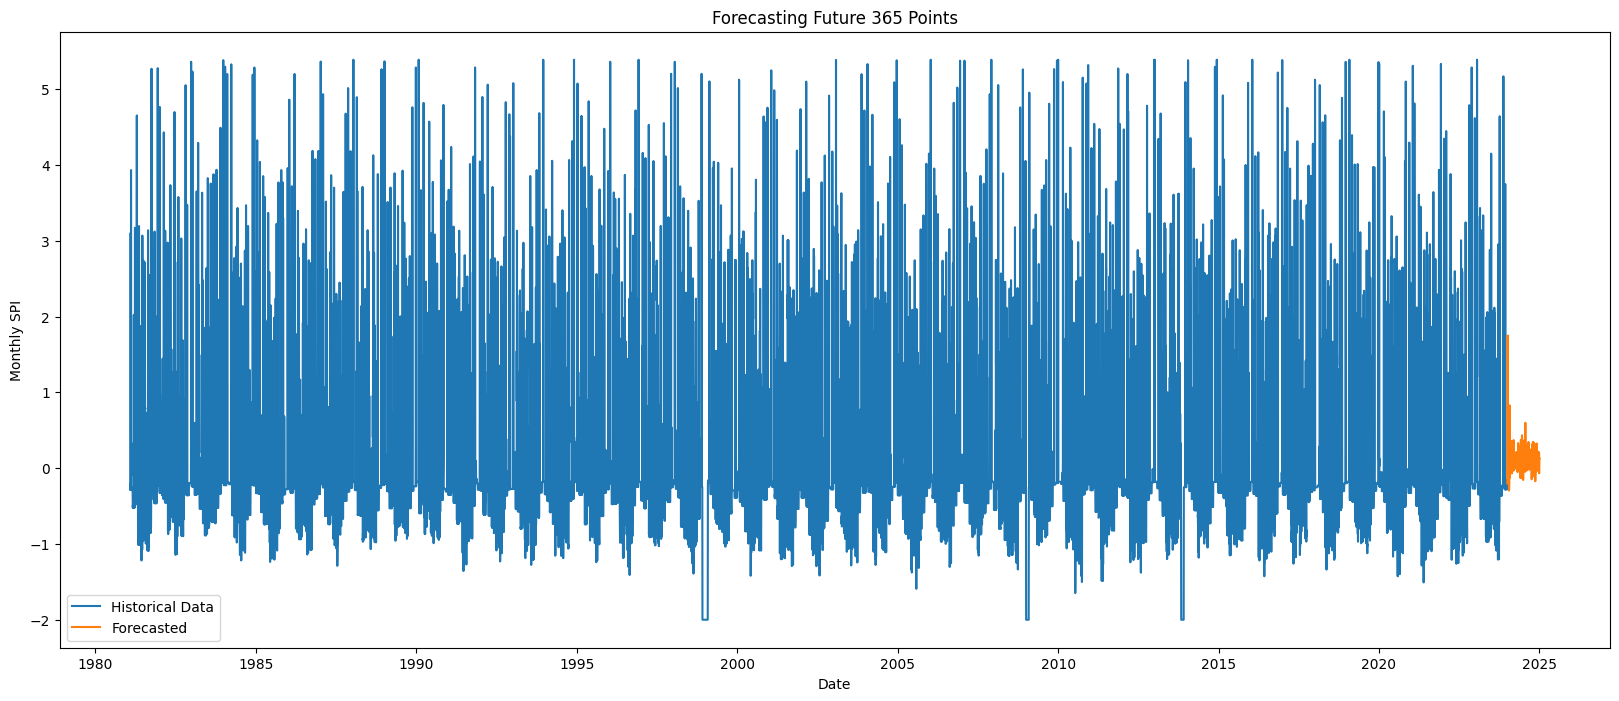

In [ ]:
# Forecast future 30 points
future_index = pd.date_range(start=df2.index[-1], periods=366, freq='D')[1:]  # Generate future dates

# Initialize a DataFrame for the future predictions
future_df = pd.DataFrame(index=future_index)

# Add lagged features for the future predictions
for i in range(1, lag + 1):
    future_df[f'lag_{i}'] = np.nan

# Use the last known values from df2 to initialize the future lagged features
last_known_values = df2.iloc[-lag:].to_dict(orient='list')

# Initialize the first set of lagged features for future_df
for i in range(1, lag + 1):
    future_df.iloc[0, i-1] = last_known_values['Monthly SPI'][-i]

# Forecast future points using lagged features
future_predictions = []
for i in range(len(future_index)):
    if i > 0:
        # Shift the lagged features forward
        for j in range(1, lag):
            future_df.iloc[i, j-1] = future_df.iloc[i-1, j]
        future_df.iloc[i, lag-1] = next_prediction

    # Prepare the input for prediction
    X_future = future_df.iloc[i].values.reshape(1, -1)

    # Predict the next value
    next_prediction = model.predict(X_future)[0]
    future_predictions.append(next_prediction)

# Convert future predictions to a DataFrame
predictions = pd.DataFrame({
    'Date': future_index,
    'Monthly SPI': future_predictions
})
predictions.set_index('Date', inplace=True)

# Plot the forecasted values
plt.figure(figsize=(20, 8))
plt.plot(df2.index, df2['Monthly SPI'], label='Historical Data')
plt.plot(predictions.index, predictions['Monthly SPI'], label='Forecasted')
plt.title('Forecasting Future 365 Points')
plt.xlabel('Date')
plt.ylabel('Monthly SPI')
plt.legend()
plt.show()


In [ ]:

def categorize_spi(spi):
    if spi >= 2:
        return "Extremely wet"
    elif 1.5 <= spi < 2:
        return "Severely wet"
    elif 1 <= spi < 1.5:
        return "Moderately wet"
    elif 0 <= spi < 1:
        return "Mild wet"
    elif -1 <= spi < 0:
        return "Mild drought"
    elif -1.49 <= spi < -1:
        return "Moderately drought"
    elif -1.99 <= spi < -1.5:
        return "Severely drought"
    else:
        return "Extremely drought"

predictions['Category'] = predictions['Monthly SPI'].apply(categorize_spi)
print(predictions['Category'].value_counts())


Category
Mild wet          310
Mild drought       52
Severely wet        2
Moderately wet      1
Name: count, dtype: int64


In [ ]:
predictions

Monthly SPI      Category
Date                                 
2024-01-01    -0.203600  Mild drought
2024-01-02     0.054040      Mild wet
2024-01-03     0.409865      Mild wet
2024-01-04     1.657681  Severely wet
2024-01-05     1.750617  Severely wet
...                 ...           ...
2024-12-26     0.023026      Mild wet
2024-12-27     0.202789      Mild wet
2024-12-28    -0.067994  Mild drought
2024-12-29     0.137900      Mild wet
2024-12-30     0.129426      Mild wet

[365 rows x 2 columns]

# **SPI Class**

**The SPI (Soil Precipitation Index) is a drought index that is calculated using the following formula:**

`SPI = (Rainfall - MonthlyAvgRainFall) / MonthlyStdRainFall`

where:

- Rainfall is the amount of rainfall that fell in a given month and year.
- MonthlyAvgRainFall is the average amount of rainfall that falls in that month and year, based on a historical record.
- MonthlyStdRainFall is the standard deviation of the rainfall in that month and year, based on a historical record.

The SPI is a standardized measure of drought, meaning that it has a mean of 0 and a standard deviation of 1. A positive SPI value indicates that the rainfall was above average for that month and year, while a negative SPI value indicates that the rainfall was below average.

The `df.apply()` function is used to apply the SPI formula to each row of the df DataFrame. The `lambda` function is used to define the SPI formula. The lambda function takes two arguments: the row of the DataFrame and the index of the row. The lambda function then calculates the SPI value for that row and returns it.

If the `MonthlyStdRainFall` value is `0`, then the SPI value cannot be calculated. In this case, the lambda function returns the value `-2`. This value is used to indicate that the SPI value is not available.

Here is a mathematical explanation of the SPI formula:

`SPI = (Rainfall - MonthlyAvgRainFall) / MonthlyStdRainFall`

The numerator of the fraction represents the difference between the actual rainfall and the average rainfall for that month and year. The denominator of the fraction represents the standard deviation of the rainfall for that month and year.

By dividing the difference between the actual and average rainfall by the standard deviation, we are standardizing the SPI value. This means that the SPI value has a mean of 0 and a standard deviation of 1.

A positive SPI value indicates that the rainfall was above average for that month and year. A negative SPI value indicates that the rainfall was below average.

**The function `classify_spi()` takes a single argument, spi, which is the Soil Precipitation Index (SPI) value. It then returns a classification label for the SPI value, based on the following criteria:**

1. If the SPI value is greater than or equal to 2, the classification label is "Extremely wet".
2. If the SPI value is between 1.5 and 2, the classification label is "Severely wet".
3. If the SPI value is between 1 and 1.5, the classification label is "Moderately wet".
4. If the SPI value is between 0 and 1, the classification label is "Mild wet".
5. If the SPI value is between -1 and 0, the classification label is "Mild drought".
6. If the SPI value is between -1.49 and -1, the classification label is "Moderately drought".
7. If the SPI value is between -1.99 and -1.5, the classification label is "Severely drought".
8. If the SPI value is less than -1.5, the classification label is "Extremely drought".

The function `apply()` is then used to apply the `classify_spi()` function to each row of the SPI column in the df DataFrame. This creates a new column in the df DataFrame, called class, which contains the classification label for each SPI value.